# PROJECT  : Employee Attrition analysis:

## Compiled by: Mashele G.P

## Project overview
Attrition is the departure of employees from the organisation/company for any reason(voluntarly or involuntary),including resignation,termination,death or retirement.
Employee are the backbone of any organisation and thier departing may lead to lot of various losses.
Employee attrition becomes a detrimental factor that affects companies that results to lot of various losses on different aspects.
Disadvantages of employee attrition includes the following:
* Decreased overall performance. <br>
* Difficulty in managing daily tasks.
* Increased cost of training and hiring new employees.
* Lack of knowledgeable employees.
* Create a negative image to the organisations/companies.
* Companies with high attrition rate it negatively impact the image/brand of the organisation.
* Employee development deteriorate.
Advantages of employee attrition includes:
* Setting the company culture right.
* Higher performance in the company.
* Bring new ideas to the organisation.

## Problem statement
Given an employee dataset, uncover the factors that lead to employee attrition and compare average monthly income by education and attrition. 
* Predict/determine the factors that influence employee attrition(target variables: YES/NO) from the given independent/predictor variables.

## Data Description

Age : Employee age <br>
Attrition: Whether the employee attrition was recorded as YES OR NO <br>
BusinessTravel: Whether employee was going for business travel or not <br>
DailyRate: Employee's dialy rate <br>
Department: The department to which the employee is working  <br>
DistanceFromHome: Employee distances from thier homes to work.
Education: The employee level of education rated from 1-5. <br>
EducationField:Employee education field that includes Life science,medical,marketing,technical degree,human resources and other. <br>
EmployeeCount: Count the number of employee in the organisation. <br>
EmployeeNumber: The number given to every employee <br>
EnvironmentSatisfaction:  Employee environmental satisfaction rated from 1-4. <br>
Gender : Whether the employee is a male or Female <br>
HourlyRate : Employee's hourly rate <br>
JobInvolvement : Employee job involment rating from 1-4. <br>
JobLevel : Employee job level rated from 1-5. <br>
JobRole : Employee's job role <br>
JobSatisfaction : Employee level of satisfication <br>
MaritalStatus : Employee's Marital status <br>
MonthlyIncome: Employee 's monthly income <br>
MonthlyRate : Employee 's monthly rate <br>
NumCompaniesWorked : The number of companies the employee once worked <br>
Over18: Whether the employee is over 18 or not <br>
OverTime : Whether the employee works overtime or not (Yes/No). <br>
PercentSalaryHike: salary hike percentage rate. <br>
PerformanceRating : Employee performance rating. <br>
RelationshipSatisfaction: Employee relationship satisfaction ratings.<br>
StandardHours: Standard employee working hours required by the organisation. <br>
StockOptionLevel: Employee stock option level. <br>
TotalWorkingYears: Total number of years foran employee working for the organisation. <br>
TrainingTimesLastYear: Number of times the training was done for last year. <br>
WorkLifeBalance: Employee work life balance rating.<br>
YearsAtCompany: Employee number of years in service. <br>
YearsInCurrentRole : Employee number of years in the current role. <br>
YearsSinceLastPromotion: Years since last promotion to an employee. <br>
YearsWithCurrManager: Employee's number of years with the current manager. <br>

### Import the necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
# Libaries to assist with visualization of data
import matplotlib.pyplot as plt
import seaborn as sns
# To tune model, get different metric scores, and split data
from sklearn.metrics import (f1_score,accuracy_score,recall_score, precision_score)
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
# To be used for data scaling 
from sklearn.preprocessing import StandardScaler
# To do hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)
# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (AdaBoostClassifier,GradientBoostingClassifier, RandomForestClassifier,BaggingClassifier,)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, SVR
# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)
# To suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Now lets read the employee attrition data
data = pd.read_csv("67714_HR_Employee_Attrition.csv")

In [3]:
# Print the first five rows of the dataset
data.head()  

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
# Print the last five rows of the dataset
data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


In [5]:
data.shape

(1470, 35)

In [6]:
print(f" The Employee attrition dataset consist of {data.shape[0]} rows and {data.shape[1]} columns")

 The Employee attrition dataset consist of 1470 rows and 35 columns


In [7]:
# Code to display the dataset data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### Observation:
* The employee attrition dataset consist of 1470 rows and 35 columns. <br>
* 26 of those columns are integer data types. <br>
* 9 (nine) are object data types. <br>
*  memory usage is 402.1 KB(kilobytes).

In [8]:
## Drop unneccessary columns
data=data.drop(columns=["EmployeeCount","EmployeeNumber","Over18","StandardHours"],axis=1)

In [9]:
data.shape

(1470, 31)

In [10]:
 # Code to print the statistical summary of the numerical columns in a  dataset
data.describe().T  

,count,mean,std,min,25%,50%,75%,max
Age,1470.000,36.924,9.135,18.000,30.000,36.000,43.000,60.000
DailyRate,1470.000,802.486,403.509,102.000,465.000,802.000,1157.000,1499.000
DistanceFromHome,1470.000,9.193,8.107,1.000,2.000,7.000,14.000,29.000
Education,1470.000,2.913,1.024,1.000,2.000,3.000,4.000,5.000
EnvironmentSatisfaction,1470.000,2.722,1.093,1.000,2.000,3.000,4.000,4.000
HourlyRate,1470.000,65.891,20.329,30.000,48.000,66.000,83.750,100.000
JobInvolvement,1470.000,2.730,0.712,1.000,2.000,3.000,3.000,4.000
JobLevel,1470.000,2.064,1.107,1.000,1.000,2.000,3.000,5.000
JobSatisfaction,1470.000,2.729,1.103,1.000,2.000,3.000,4.000,4.000
MonthlyIncome,1470.000,6502.931,4707.957,1009.000,2911.000,4919.000,8379.000,19999.000


### Observation:
* The age dataset is skewed to the right with mean greater than the median.
* 75% of the employees earns a daily rate of 1157 dollars and above.
* About 75% of the employees thier distance from home is 14 miles and above.
* The hourly rate data for employees exhibit a skewed to the left distribution with mean less than the median.
* The hourly rate range from a minimum of 30 to a maximum of 100 dollars.
* 25% of the employees earns a monthly income of 2911.000 dollars above with a maximum of 19999.000 dollars.
* The company percent salary hike range from a minimum of 11% to a maximum of 25%
* Most of the employees worked at the companies to a maximum of 40 years in service.

In [11]:
# code to check for missing values in a dataset
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

###  Observation:
* There are no missing values in the dataset.

In [12]:
# Code to check for duplicates in the dataset
data.duplicated().sum()  

0

###  Observation:
* There are no duplicates in a dataset

# Exploratory data analysis(EDA)

In [70]:
 # Code to make a copy of the original dataset
data_emp = data.copy() 

In [71]:
data_emp.shape

(1470, 31)

## Univariate data analysis

### Numerical data

In [15]:
# Select numerical colums from the dataset
numerical_columns =data_emp.select_dtypes("number").columns

In [16]:
### Code to create a function to display histogram and boxplot for numerical dataset
def box_histplot(data,item):
    
    plt.figure(figsize=(15,5))  # increase the size of the plot
    plt.title(f"Histogram for {item}")      # Give the graph a title
    plt.xlabel(item)  # change the label on the x-axis
    plt.ylabel("frequency")  # change the label on the y-axis
    sns.histplot(data=data,x=item,kde=True);  # histogram for numerical dataset
    plt.axvline(data[item].mean(),color="black",linestyle="--")
    plt.axvline(data[item].median(),color="red",linestyle="-")
    plt.show()
    plt.figure(figsize=(15,5))  # increase the size of the plot
    plt.title(f"Boxplot for {item}")          # Give the plot a suitable title
    sns.boxplot(data=data,x=item,showmeans=True);  # Boxplot for numerical dataset
    plt.xlabel(item)                     # change the label on the x-axis
    plt.show()

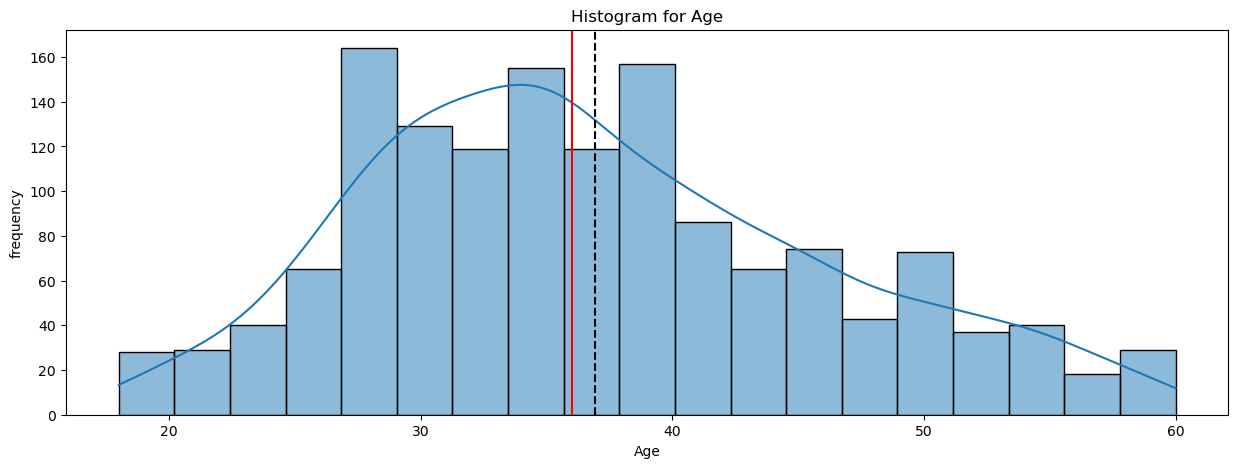

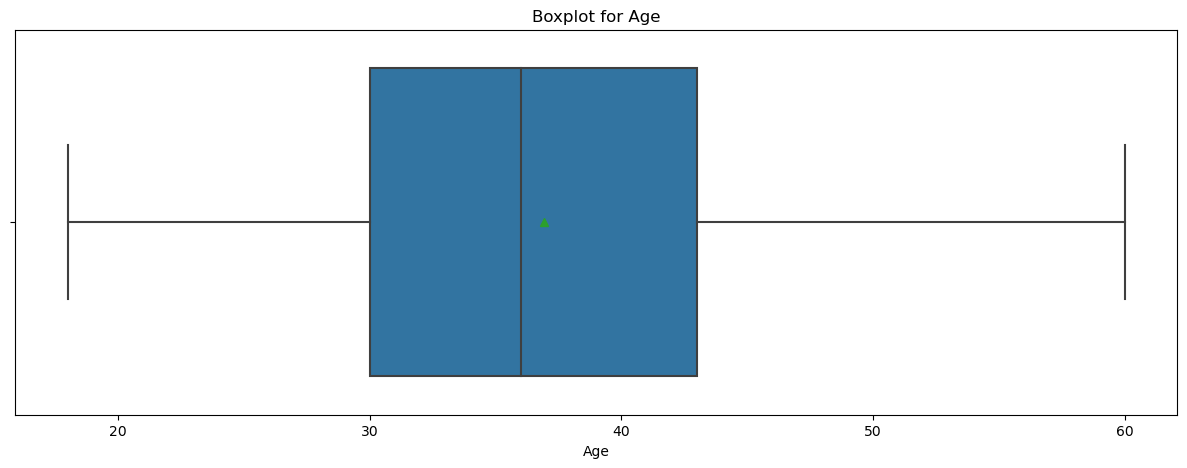

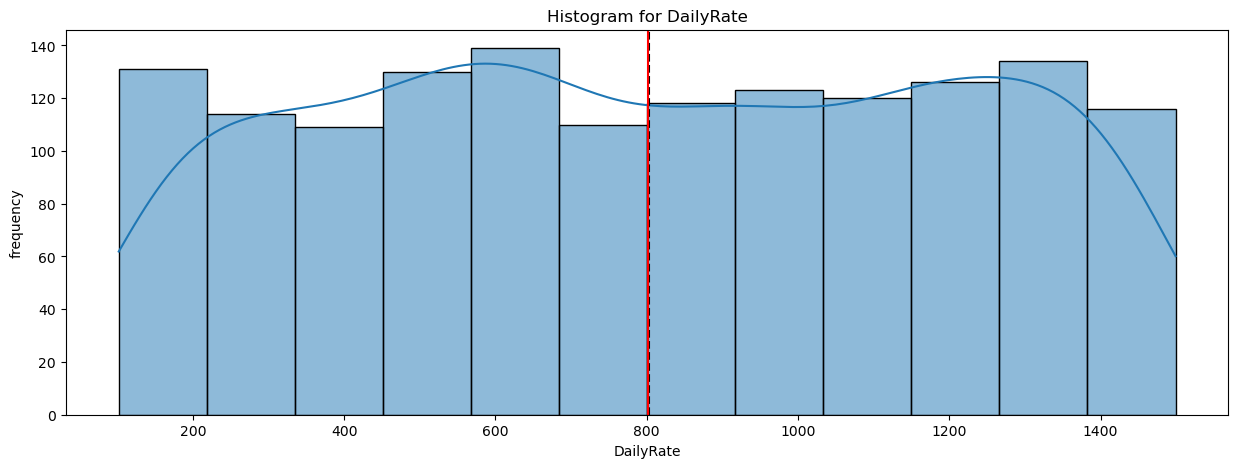

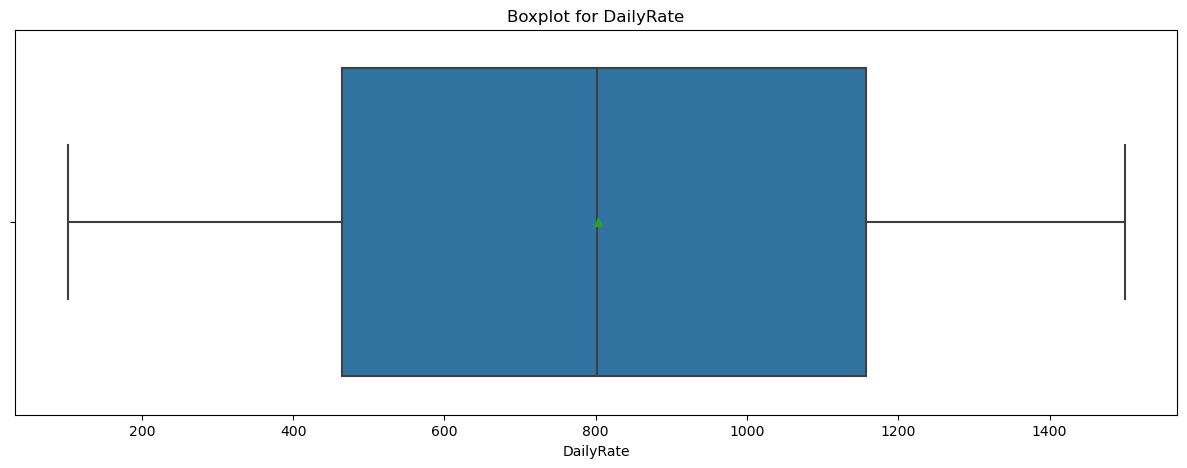

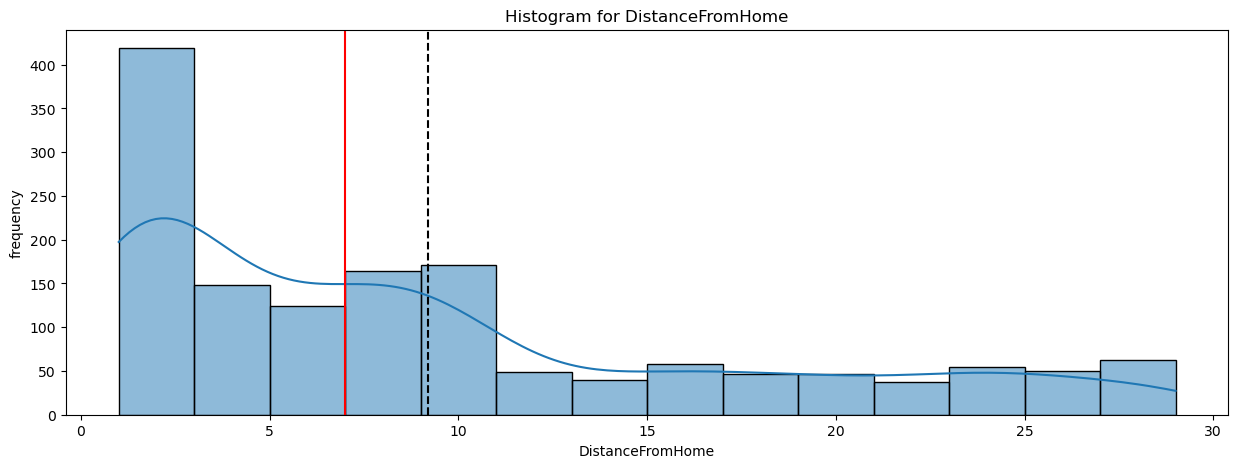

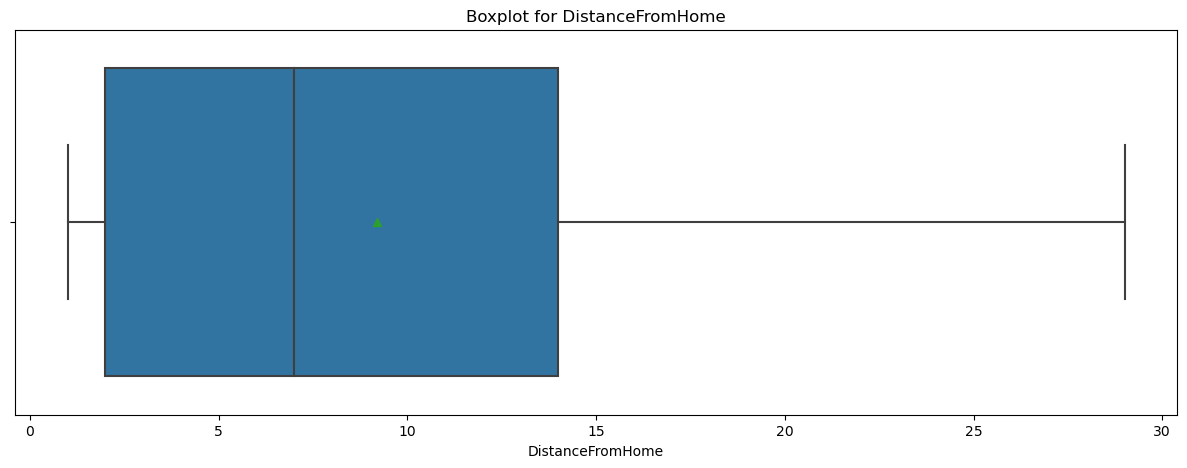

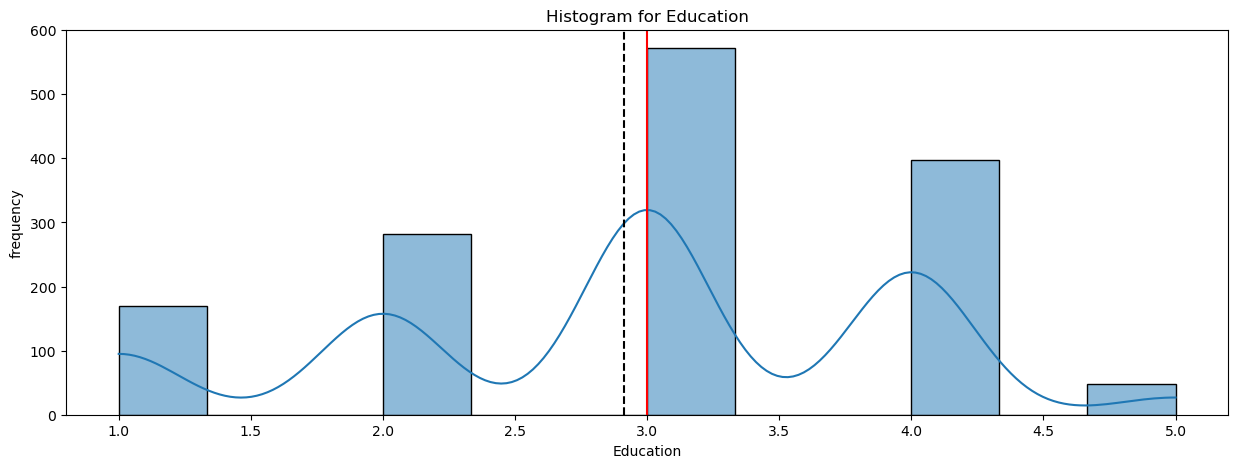

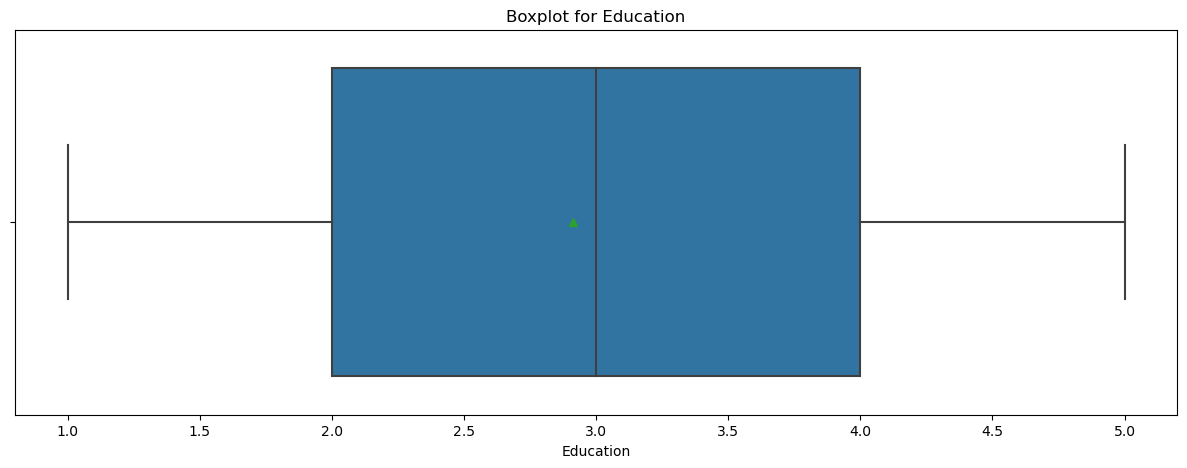

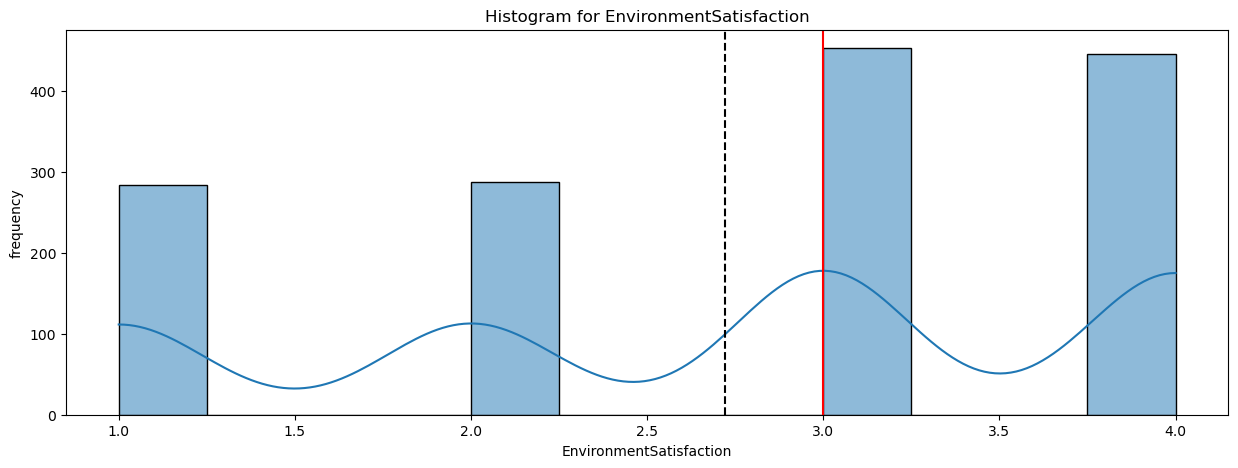

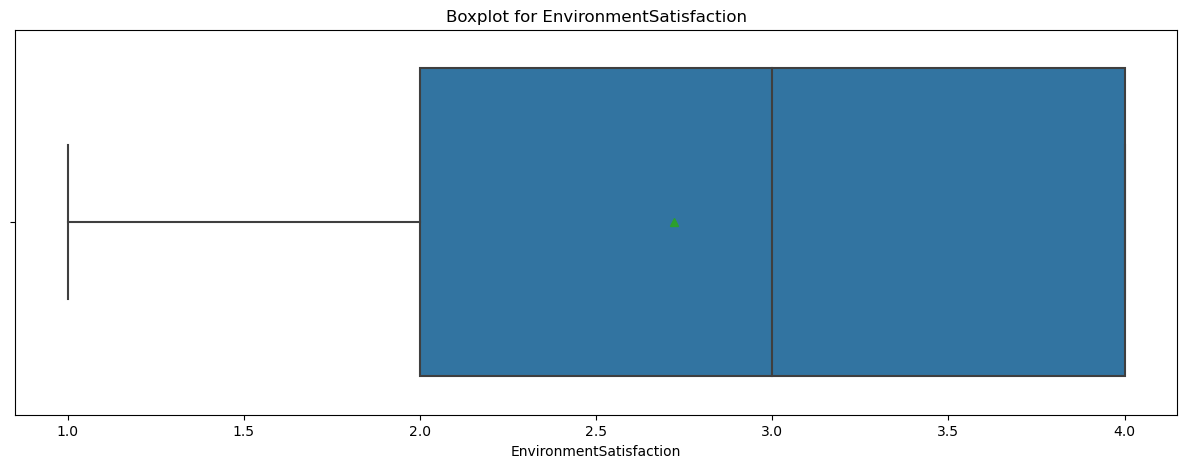

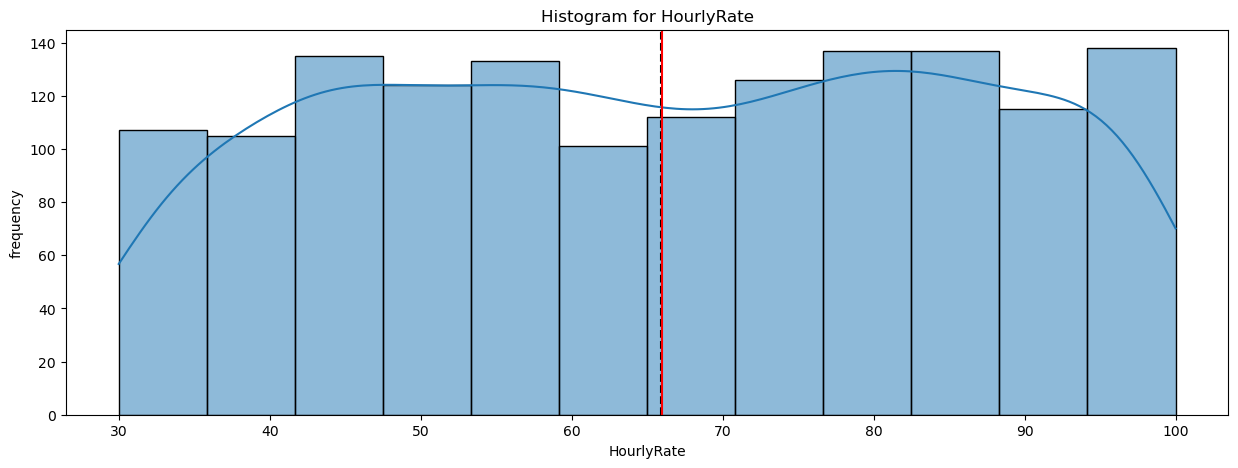

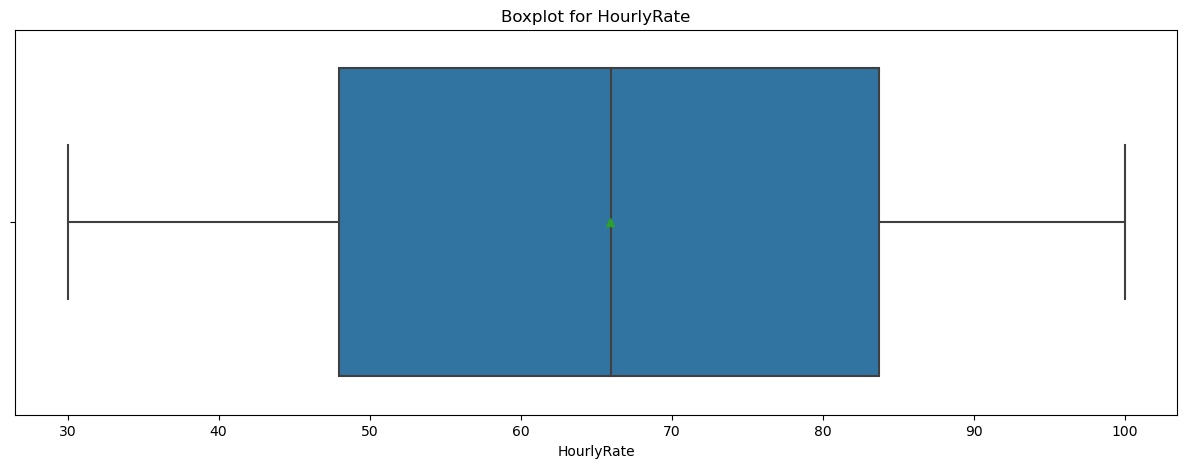

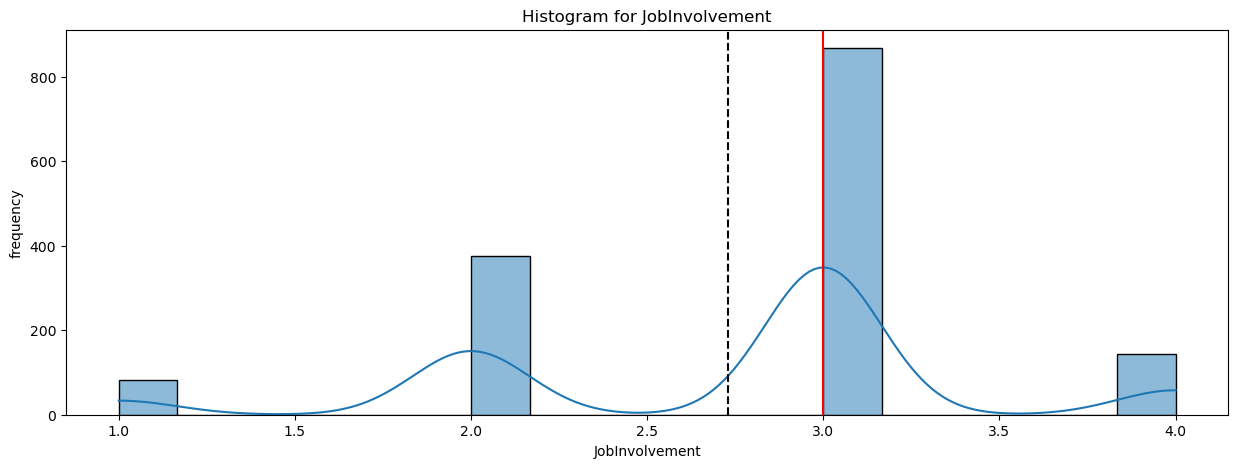

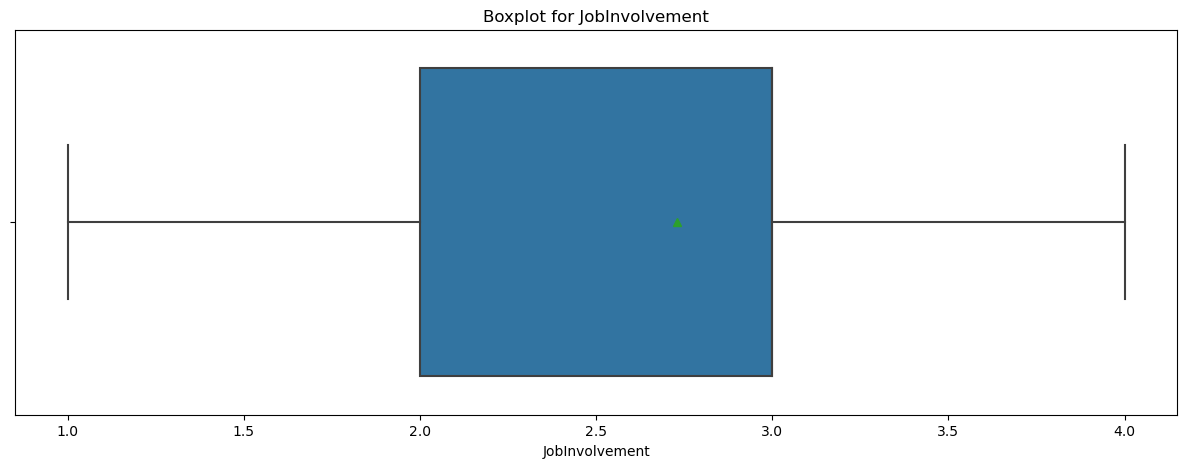

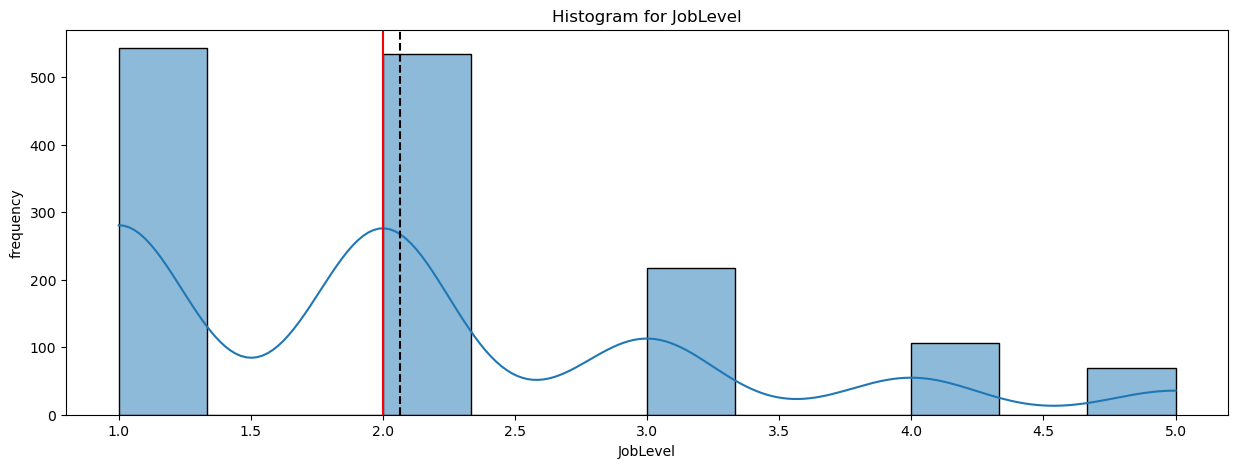

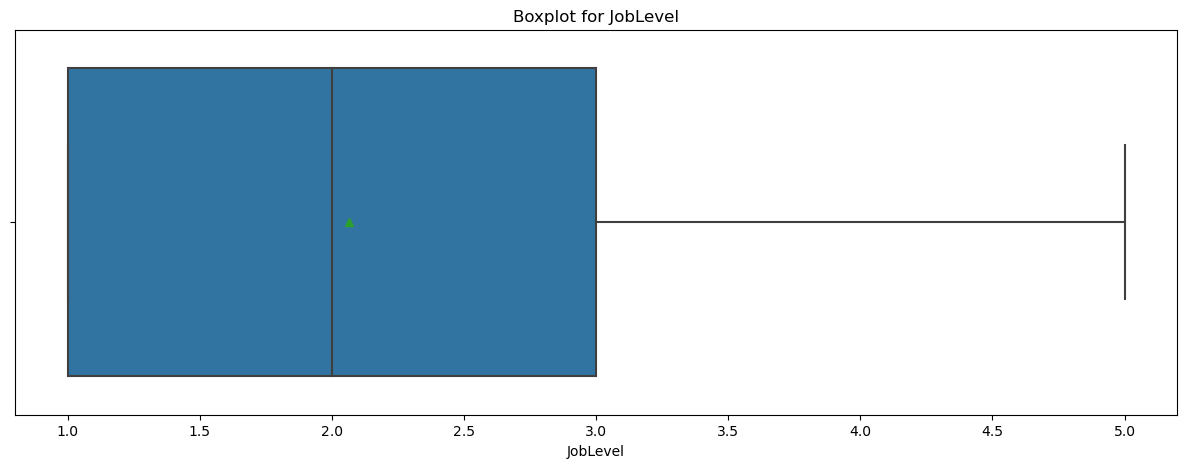

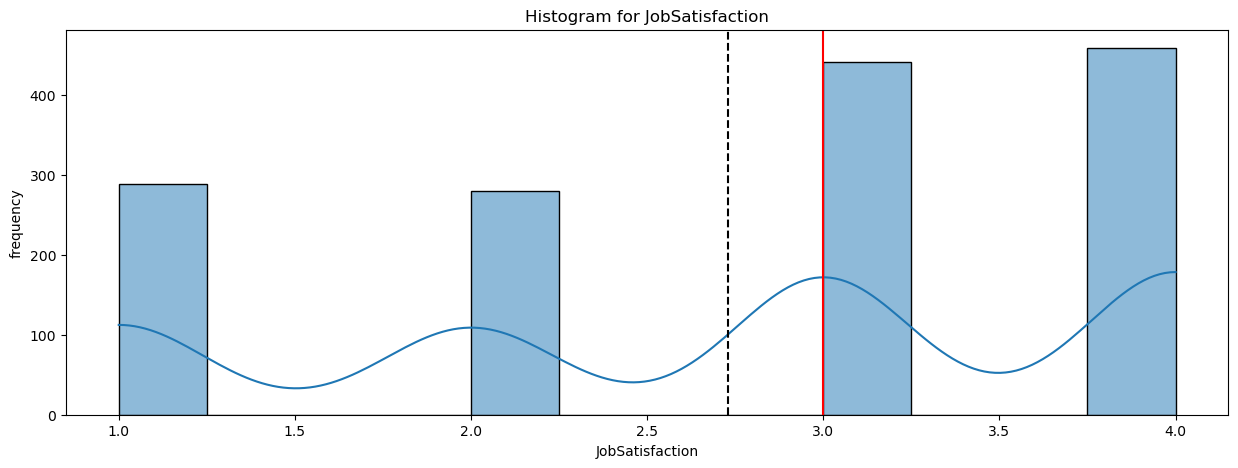

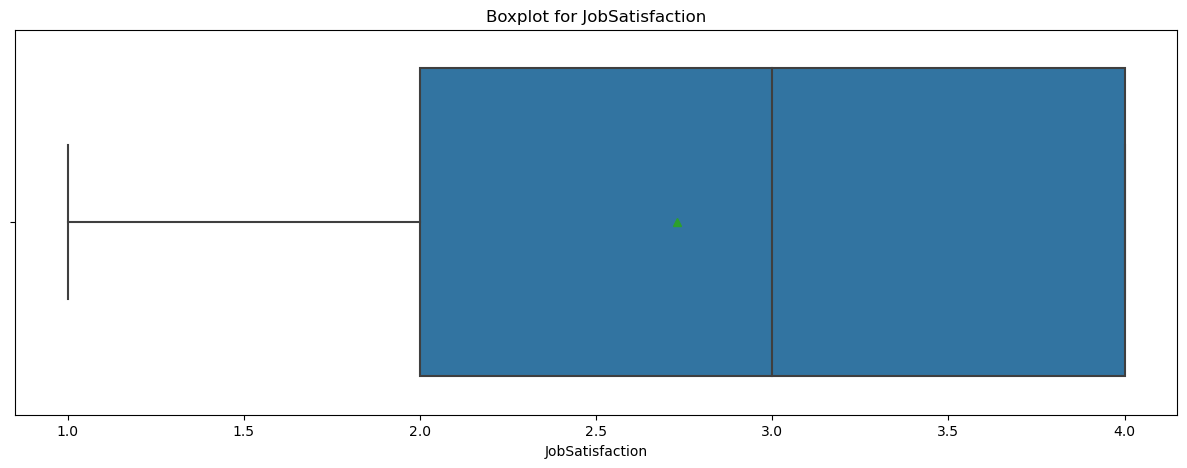

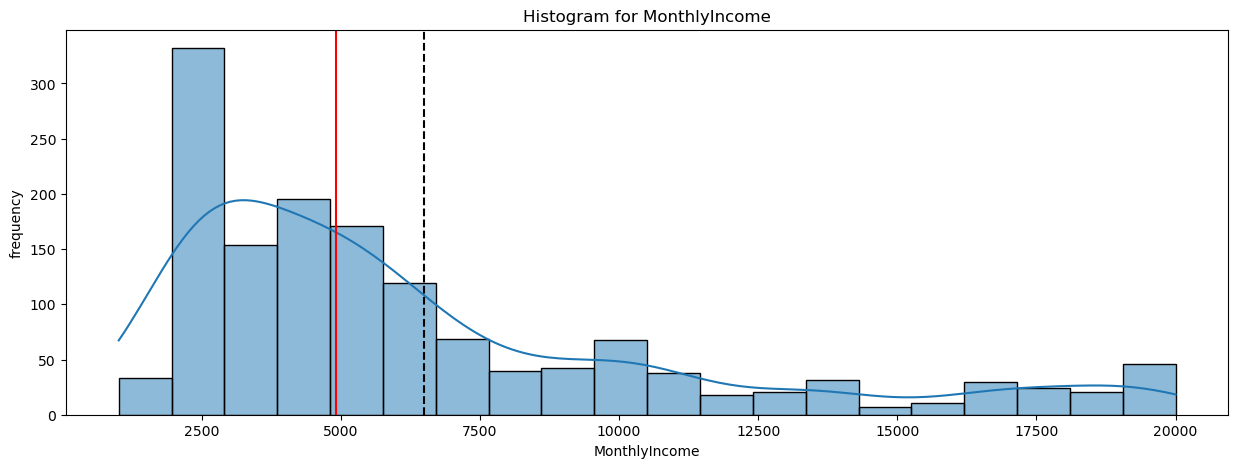

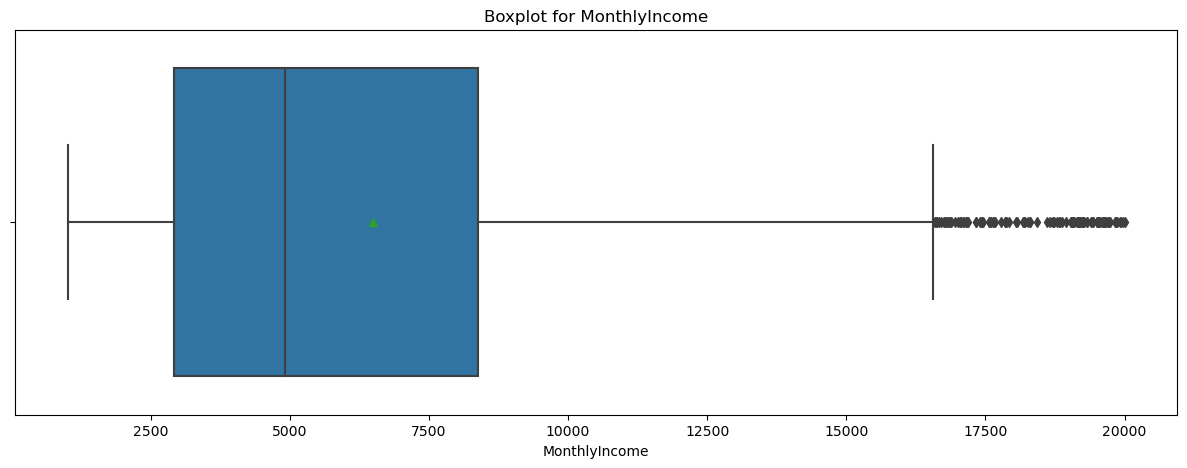

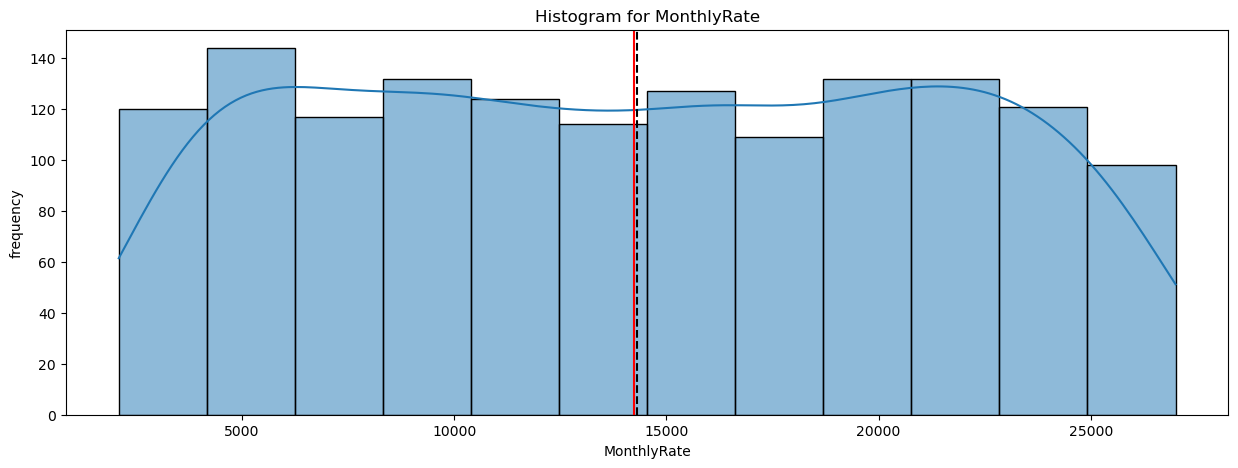

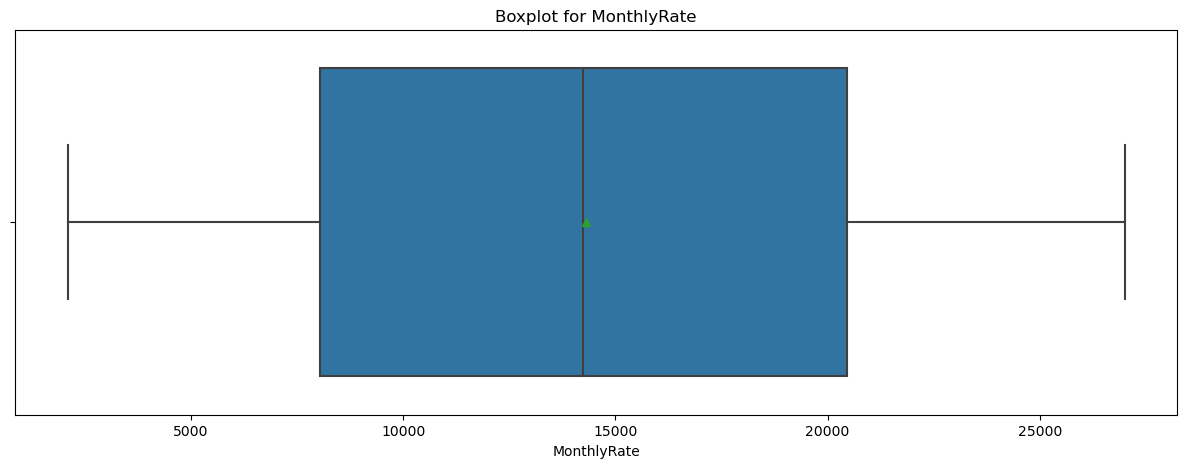

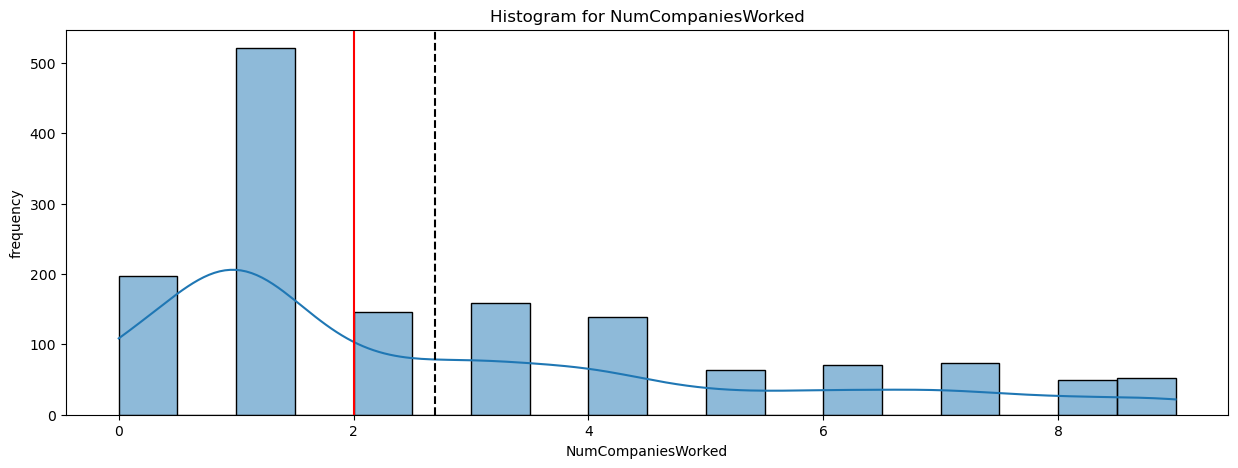

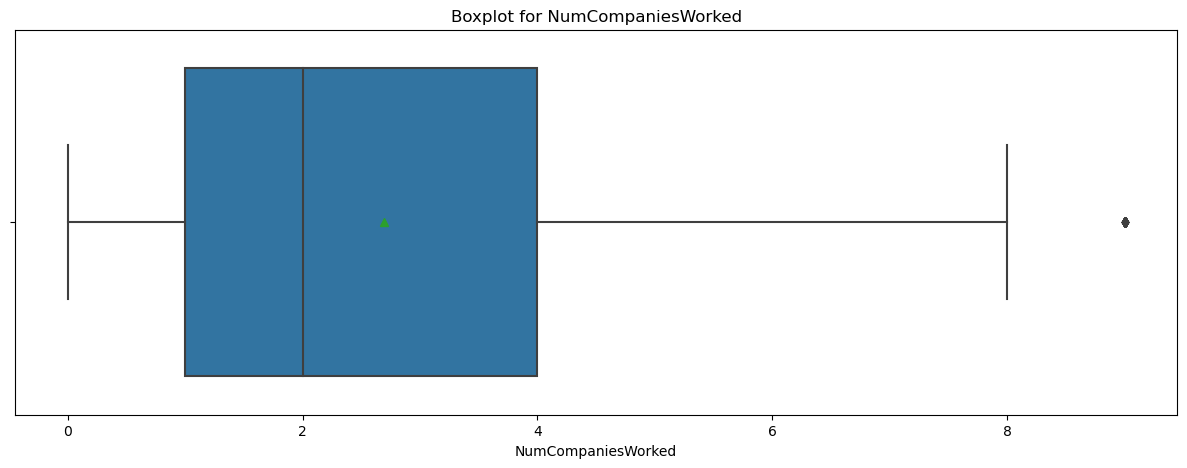

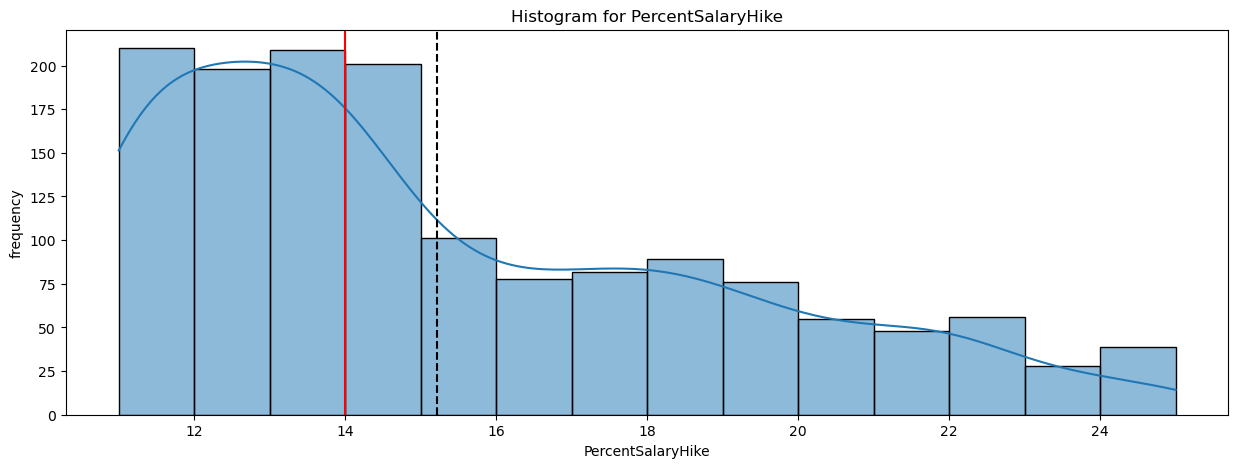

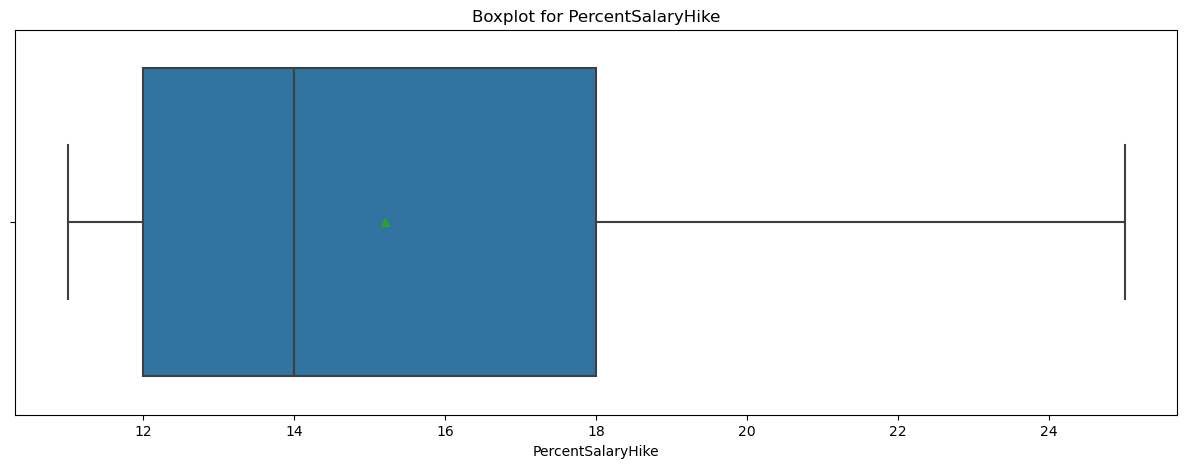

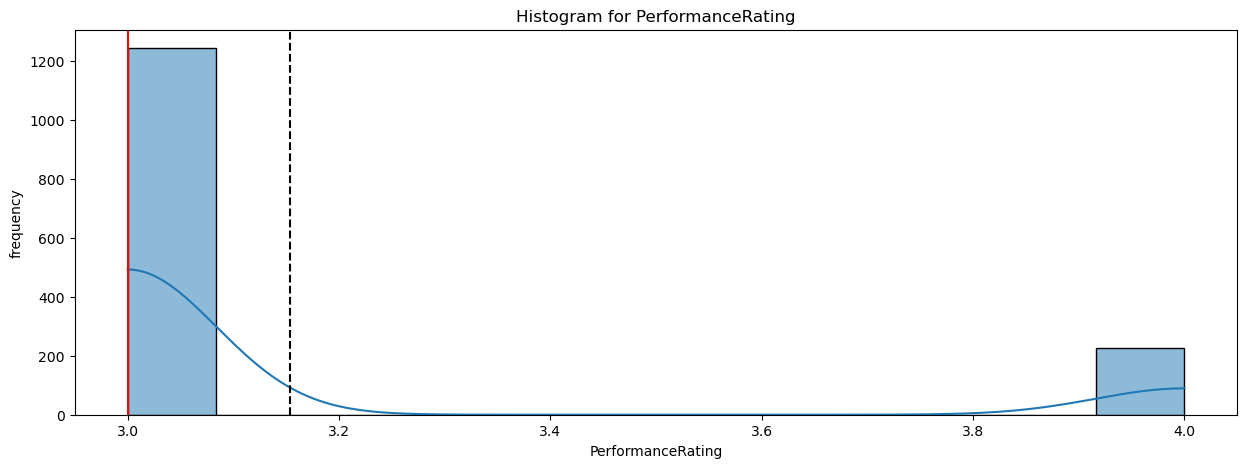

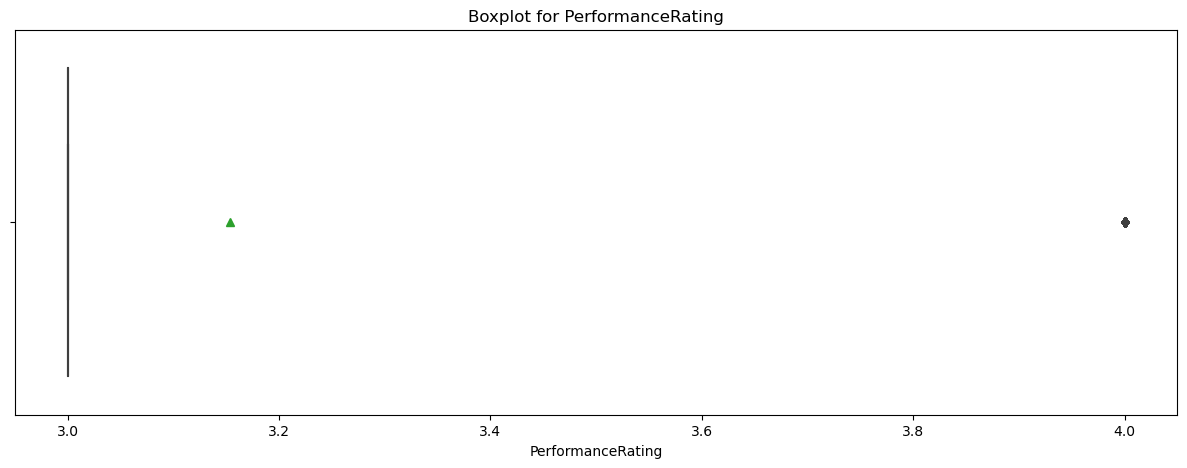

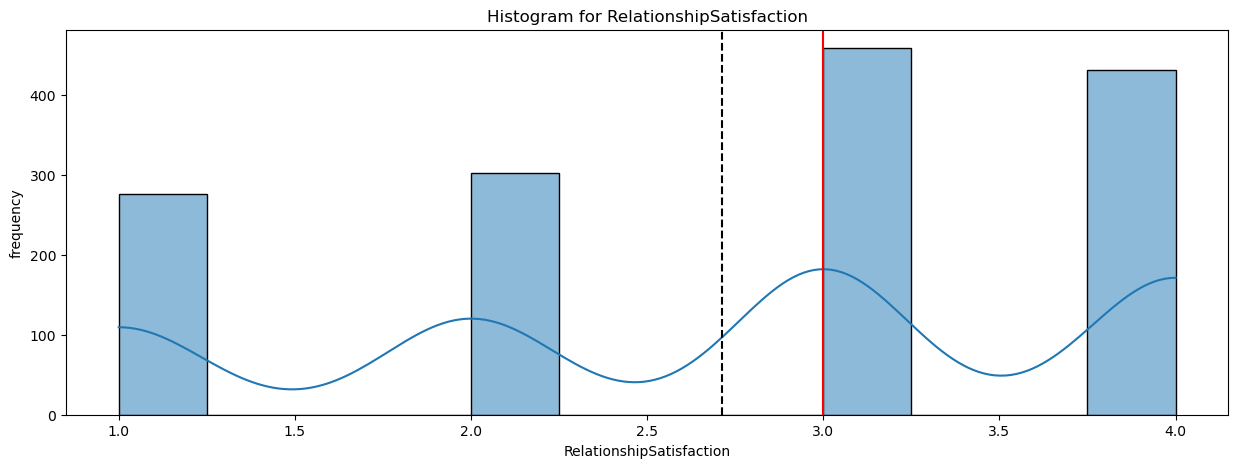

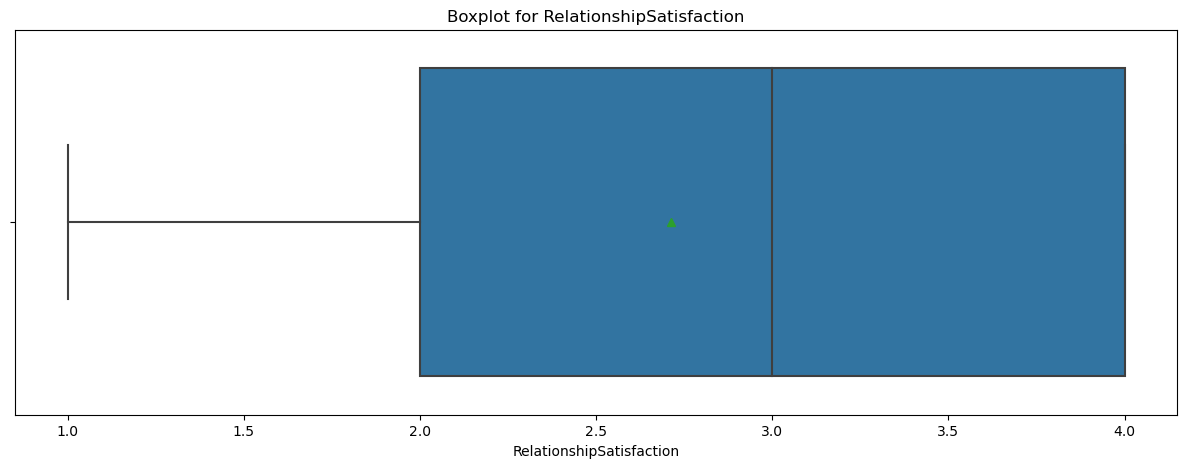

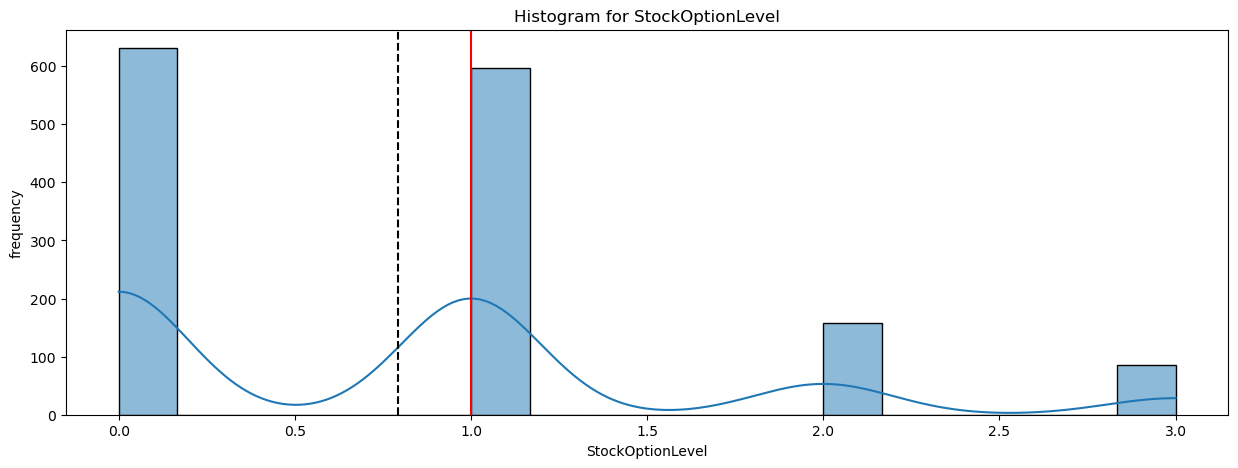

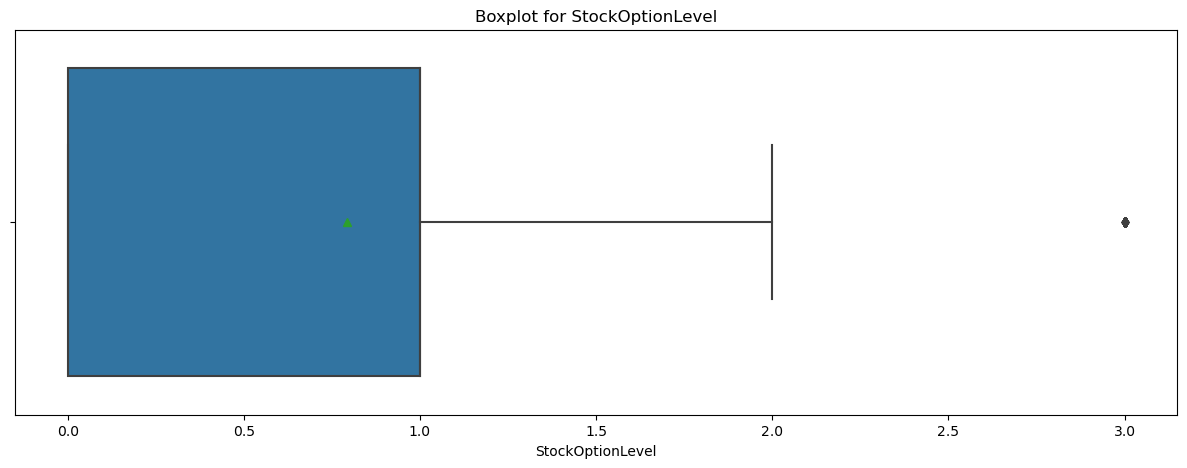

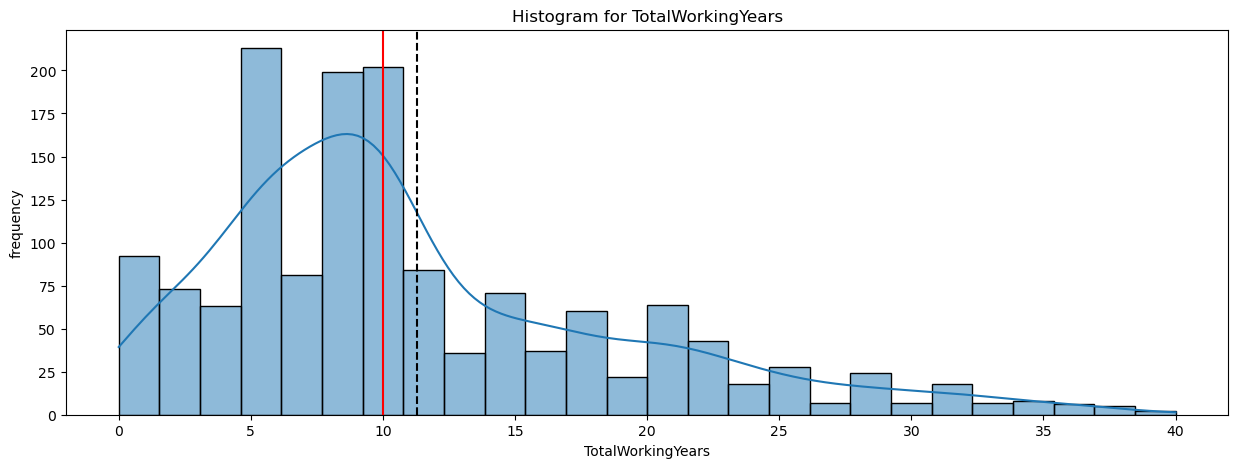

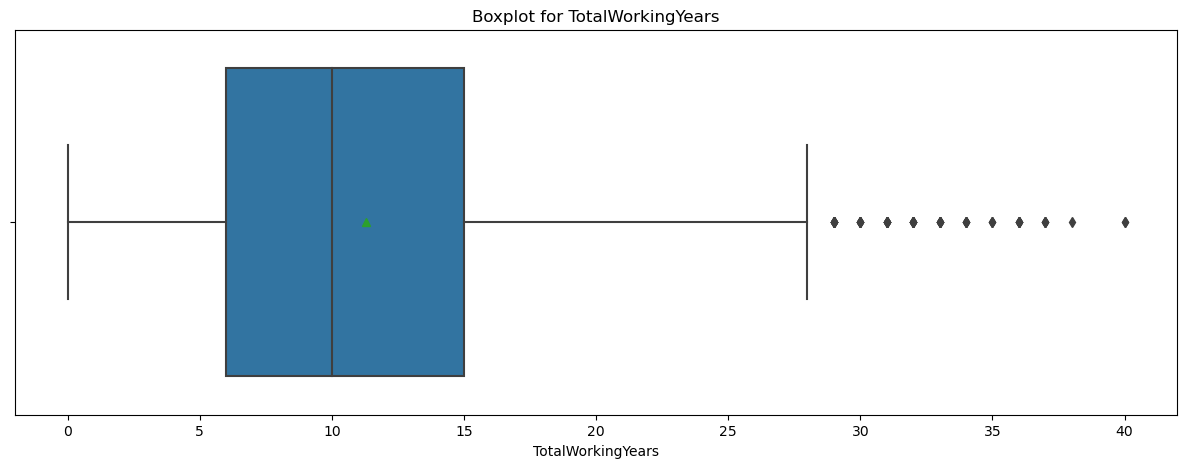

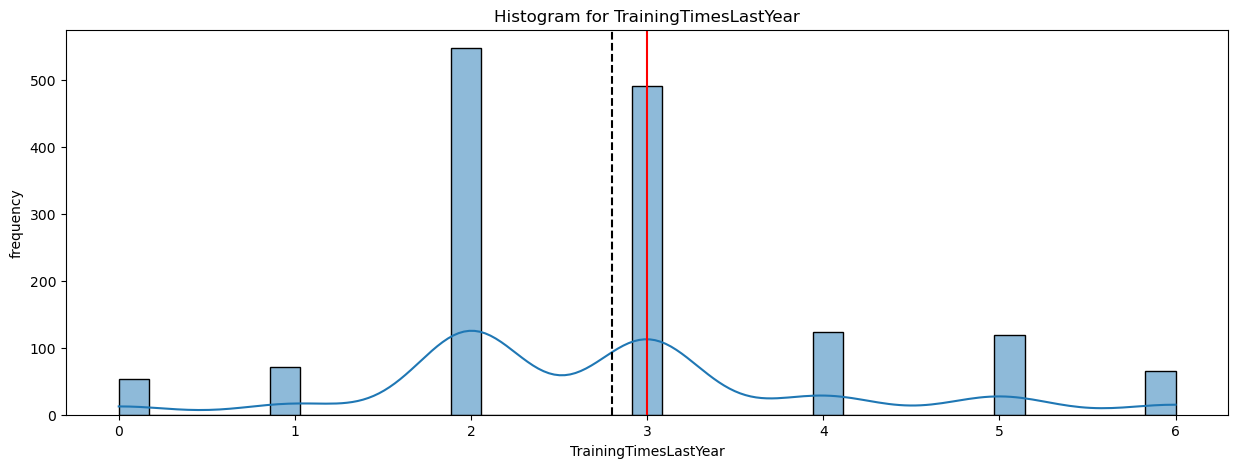

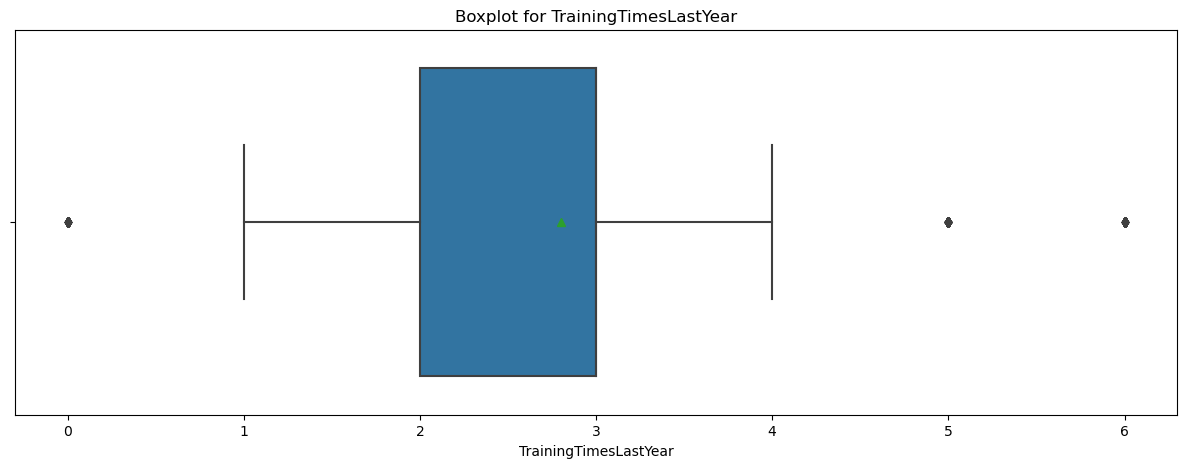

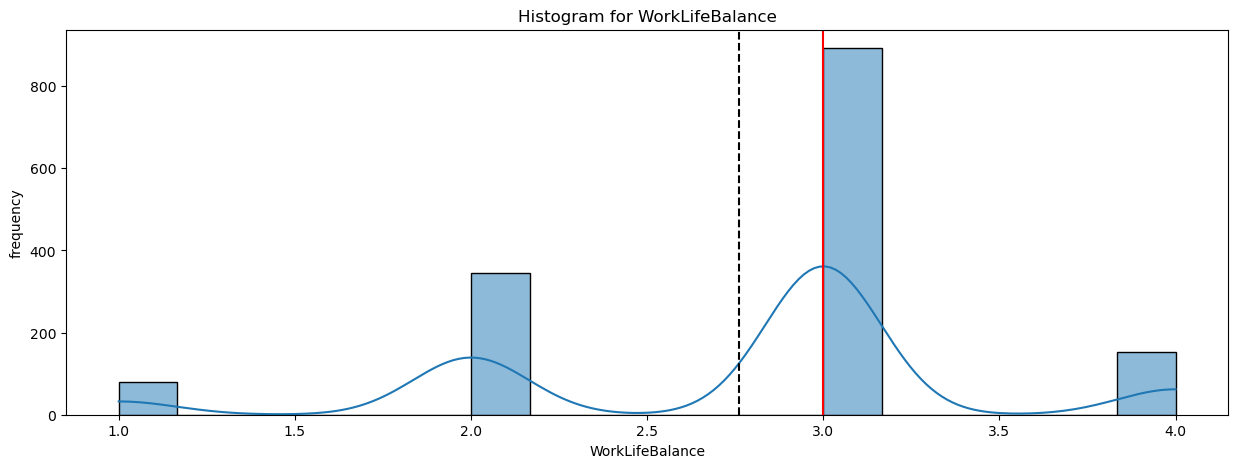

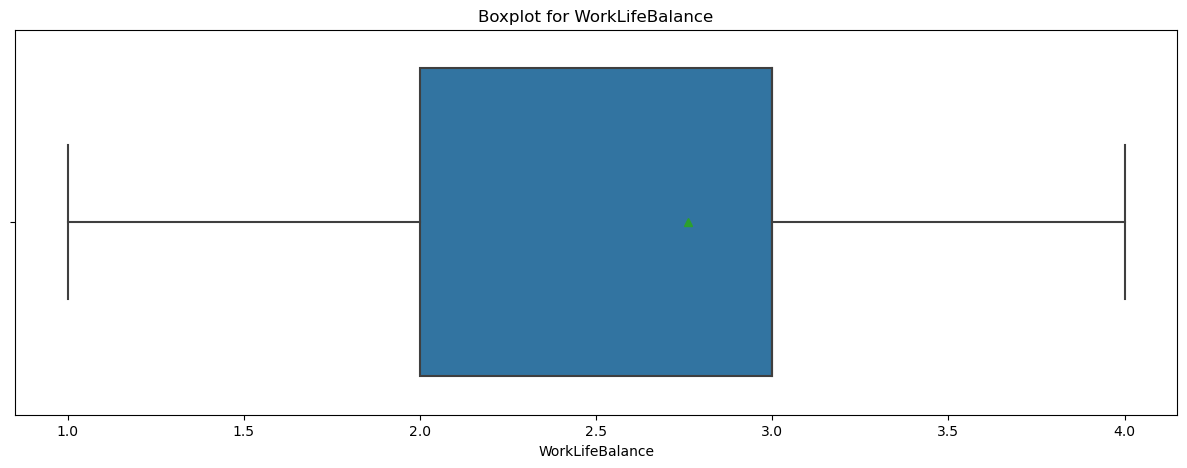

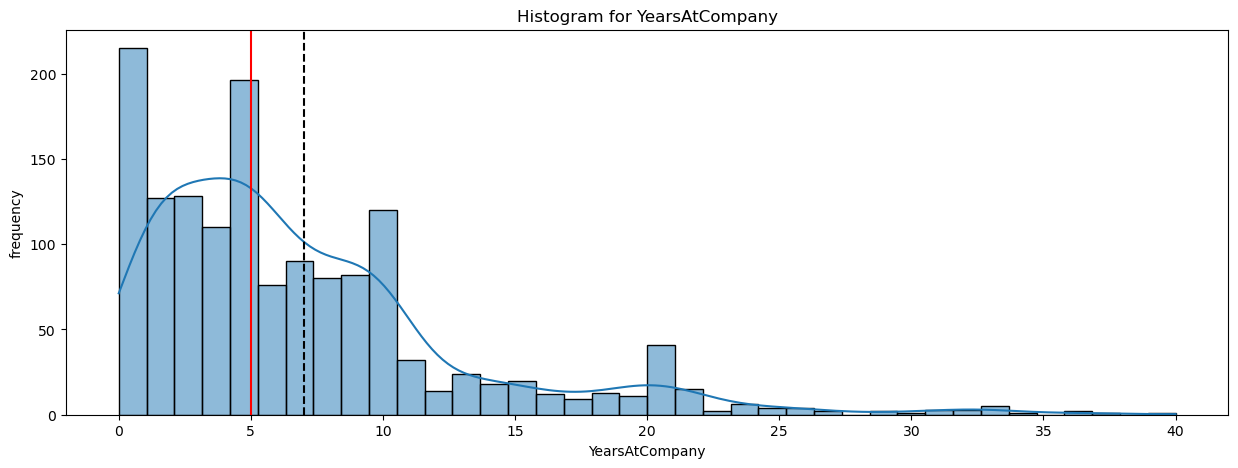

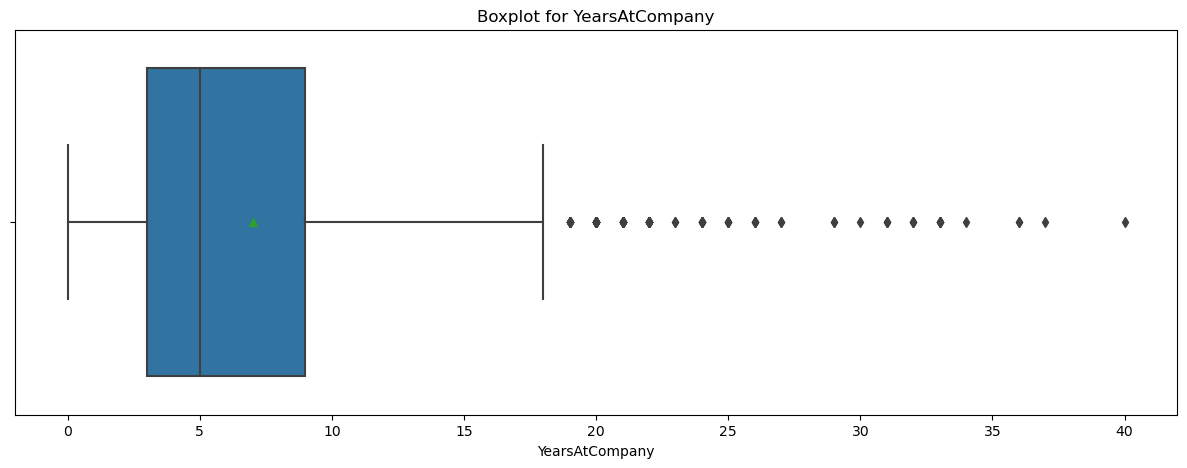

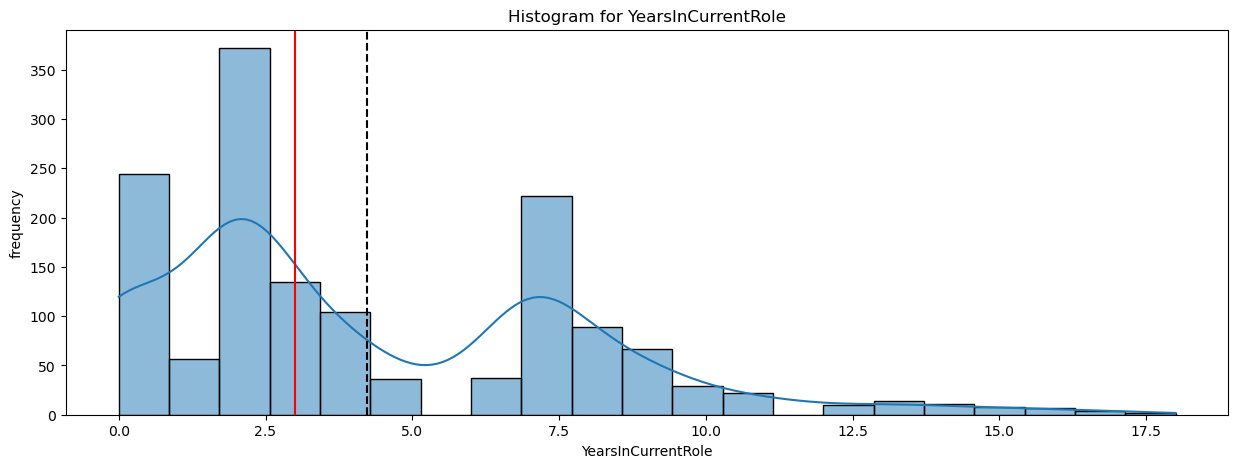

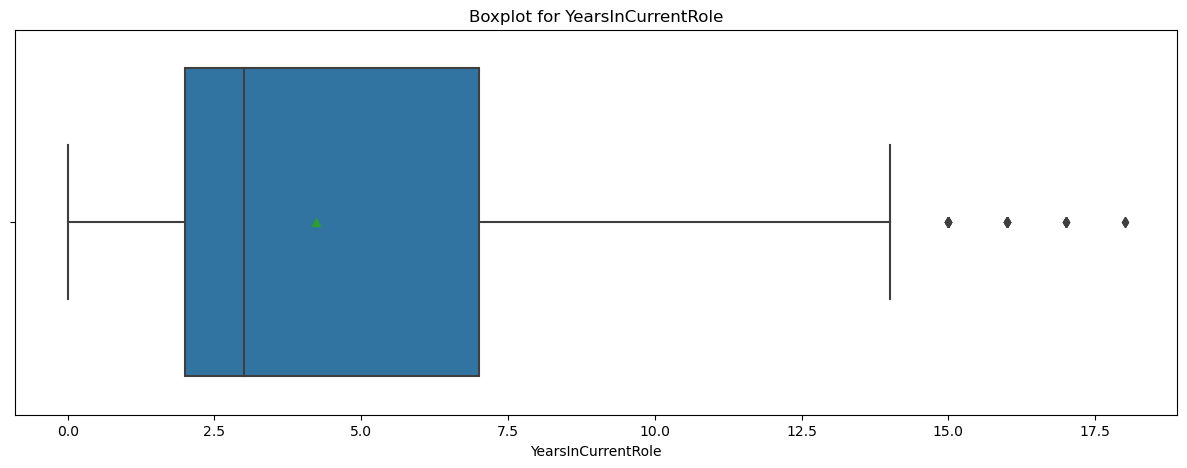

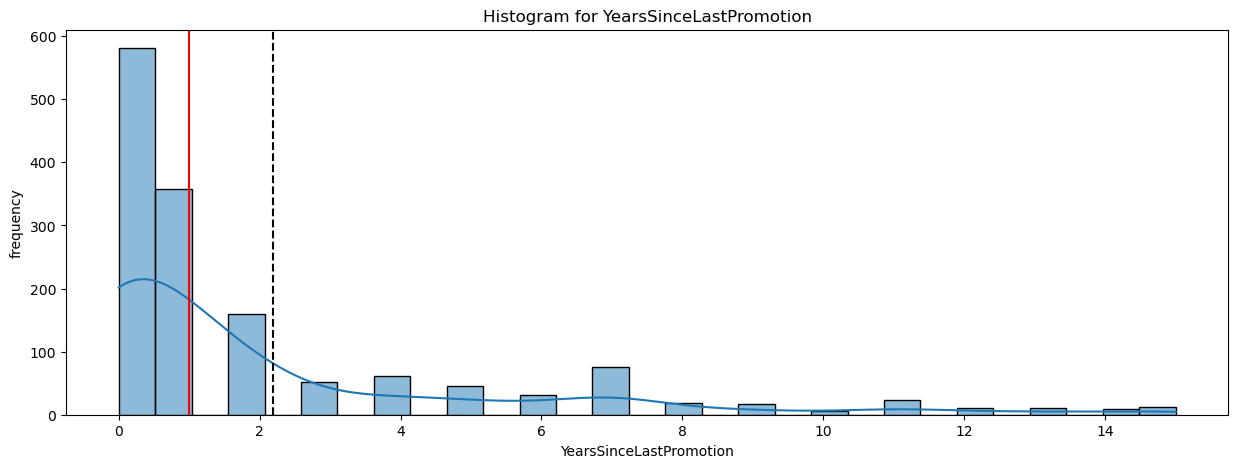

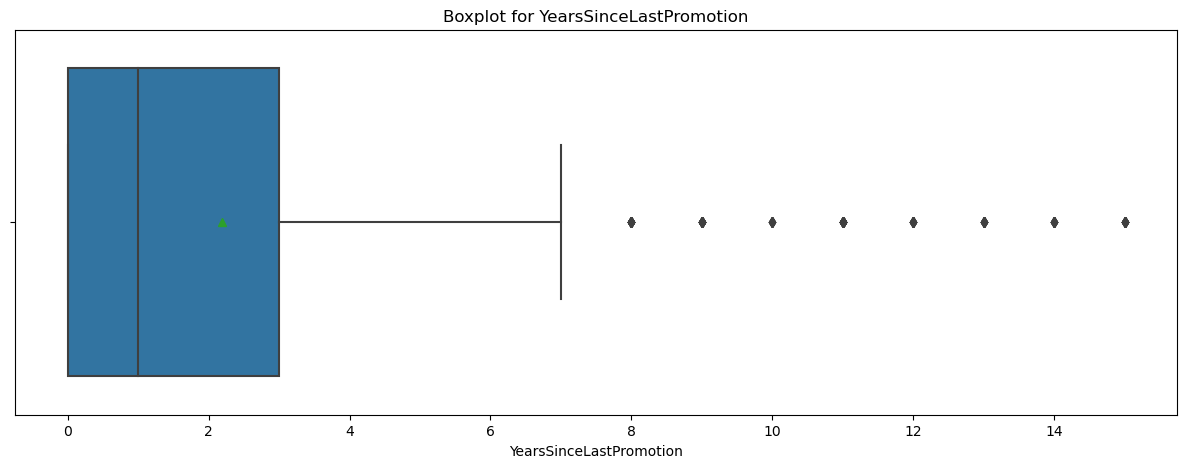

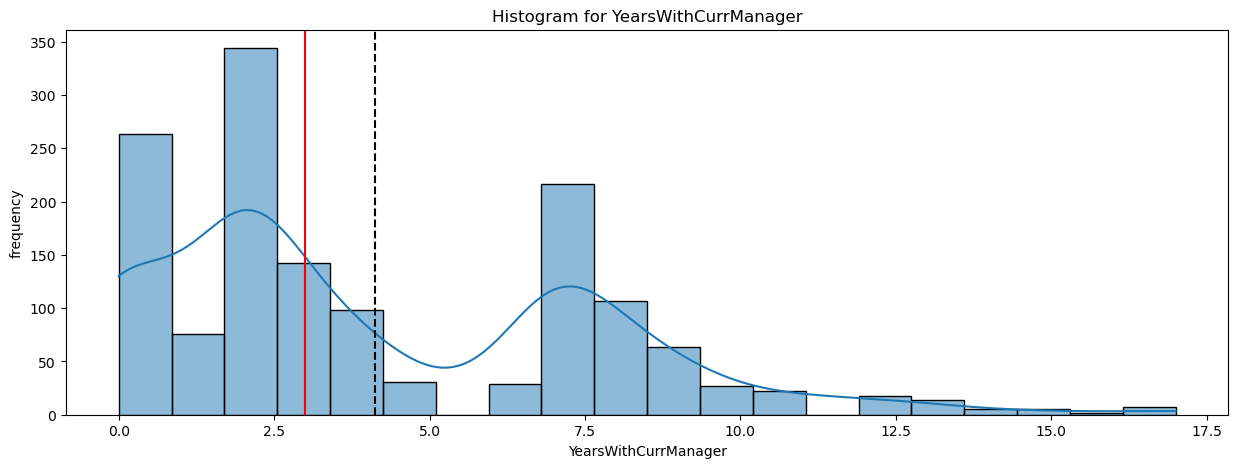

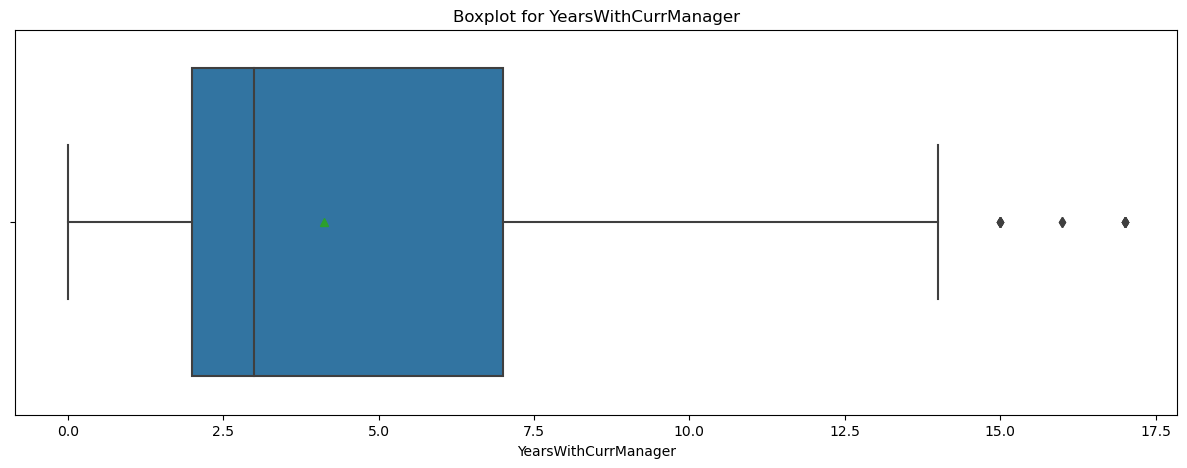

In [17]:
# Code the call the function to display the histogram and boxplots for numericl columns
for item in data_emp[numerical_columns]:
    box_histplot(data_emp,item)

## Categorical data analysis:

In [18]:
# Code to select categorical columns
categorical_data = data_emp.select_dtypes("object").columns  

In [19]:
## Create a function to display the bar graphs for categorical data columns
def count_plot(data,item):
    plt.figure(figsize=(5,4))  # increase the size of the plot
    sns.countplot(data=data , x=item); # countplot for categorical columns
    plt.title(f"Countplot for {item}")  # add the title on the countplot
    plt.ylabel("frequency")    # add the label on the y-axis
    plt.xticks(rotation=90) 
    plt.show()

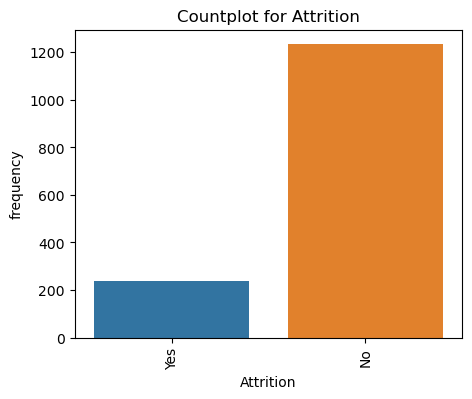

In [20]:
# Print the countplot for attrition
count_plot(data_emp,"Attrition")

In [21]:
data_emp["Attrition"].value_counts(normalize=True)

No    0.839
Yes   0.161
Name: Attrition, dtype: float64

In [22]:
### Construct a pie chart for the attrition data
values=[]  # create an empty list
attrition=["Yes","No"]
for item in attrition:
    count1= (data_emp[data_emp["Attrition"]==item].value_counts().sum())/data_emp["Attrition"].shape[0]
    values.append(count1)

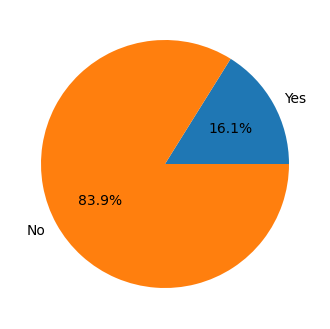

In [23]:
# Create a pie chart to show the percentage for attrition
plt.figure(figsize=(4,5))
plt.pie(values,labels=attrition,autopct="%1.1f%%")
plt.show()

### Observation
About 84% of the employees are not on attrition whereas 16% are on attrition.

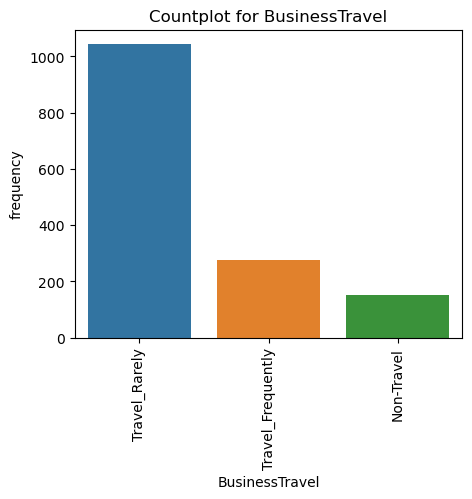

In [24]:
# Print the countplot for Business Travel
count_plot(data_emp,"BusinessTravel")

In [25]:
data_emp["BusinessTravel"].value_counts(normalize=True)

Travel_Rarely       0.710
Travel_Frequently   0.188
Non-Travel          0.102
Name: BusinessTravel, dtype: float64

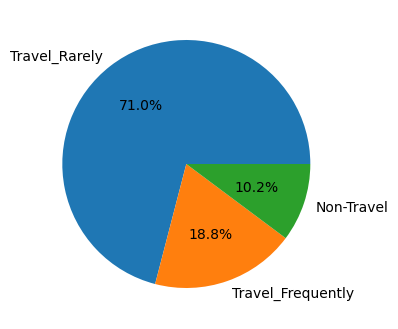

In [26]:
# Create a pie chart to show the percentage for Business Travel 
plt.figure(figsize=(4,5))
values = data_emp["BusinessTravel"].value_counts() /data_emp.shape[0]
plt.pie(values,labels=values.keys(),autopct="%1.1f%%")
plt.show()

### Observation
About 71% of the employees in the organisation rarely travel. <br>
19% of the employees travels frequently with 10% of those that do not travel.

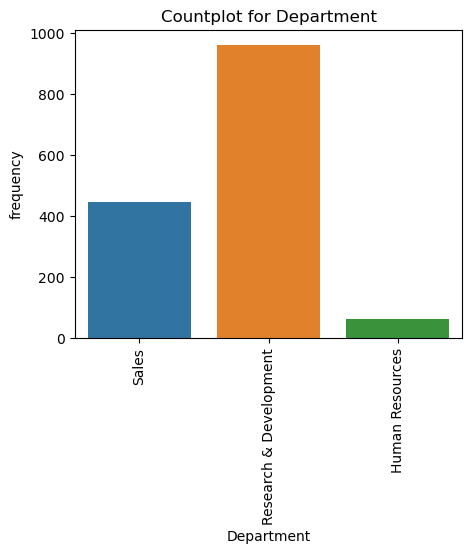

In [27]:
# Print the countplot department
count_plot(data_emp,"Department")

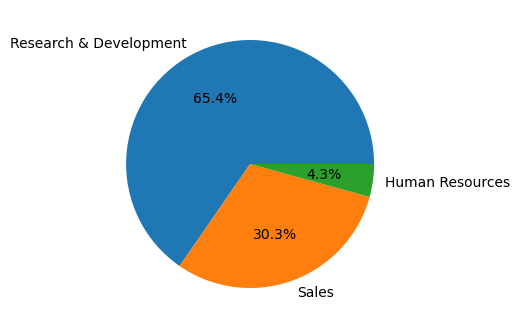

In [28]:
# Create a pie chart to show the percentage for Department 
plt.figure(figsize=(4,5))
values = data_emp["Department"].value_counts() /data_emp.shape[0]
plt.pie(values,labels=values.keys(),autopct="%1.1f%%")
plt.show()

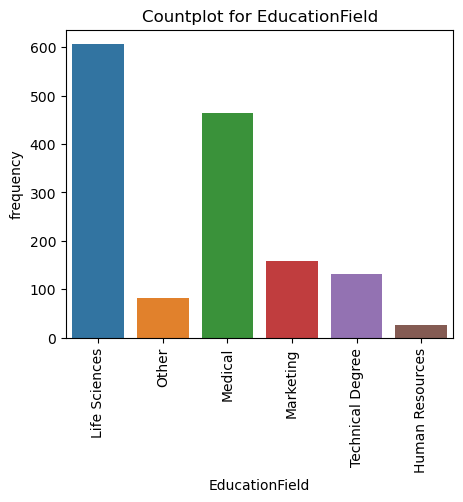

In [29]:
# Print the countplot for education field for employees
count_plot(data_emp,"EducationField")

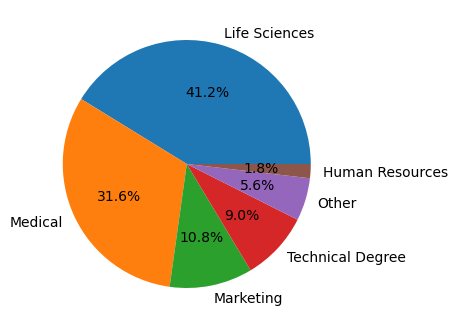

In [30]:
# Create a pie chart to show the percentage for Educational field 
plt.figure(figsize=(4,5))
values = data_emp["EducationField"].value_counts() /data_emp.shape[0]
plt.pie(values,labels=values.keys(),autopct="%1.1f%%")
plt.show()

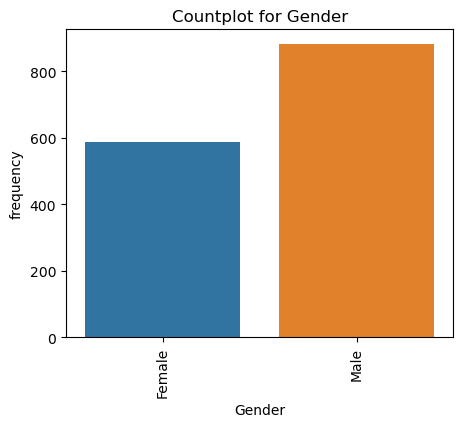

In [31]:
# Print countplot for Gender of employees
count_plot(data_emp,"Gender")

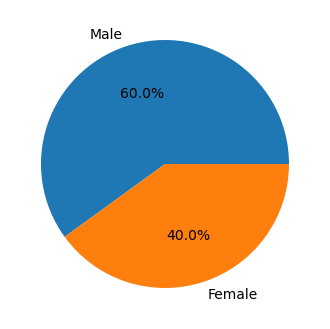

In [32]:
# Create a pie chart to show the percentage for Gender
plt.figure(figsize=(4,5))
values = data_emp["Gender"].value_counts() /data_emp.shape[0]
plt.pie(values,labels=values.keys(),autopct="%1.1f%%")
plt.show()

### Observation
60% of the employees in the company are males and 40% are females.

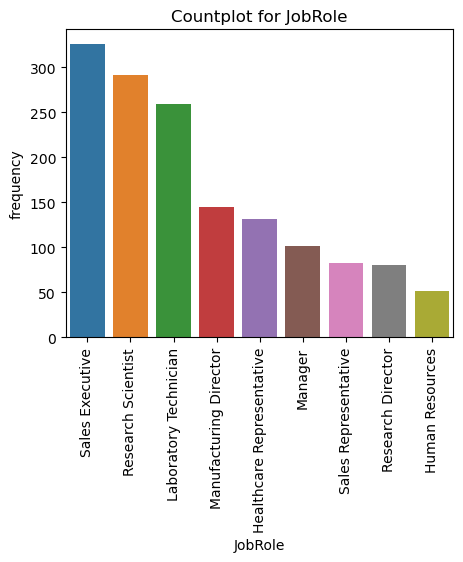

In [33]:
# print the countplot for employee jobroles
count_plot(data_emp,"JobRole")

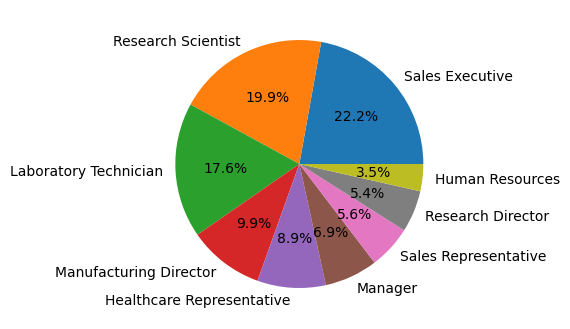

In [34]:
# Create a pie chart to show the percentage for Job Role 
plt.figure(figsize=(4,5))
values = data_emp["JobRole"].value_counts() /data_emp.shape[0]
plt.pie(values,labels= values.keys(),autopct="%1.1f%%")
plt.show()

### Observation:
About 22% of the employees are sales executives. <br>
20% are Research Scientist  with 4% being the human resources employees.

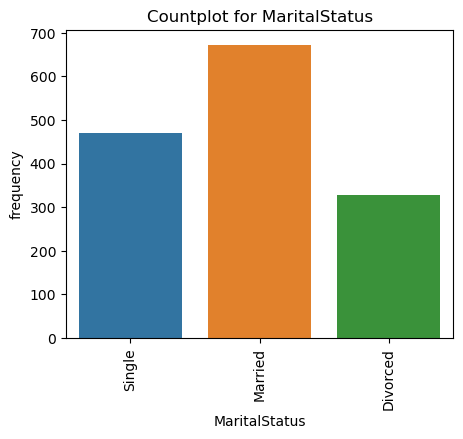

In [35]:
# print the countplot for employee marital status
count_plot(data_emp,"MaritalStatus")

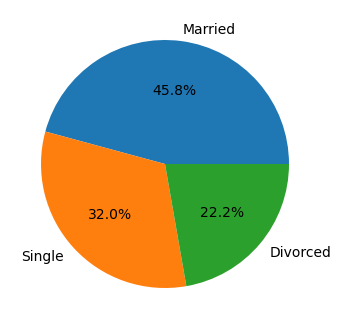

In [36]:
# Create a pie chart to show the percentage for marital status
plt.figure(figsize=(4,5))
values = data_emp["MaritalStatus"].value_counts() /data_emp.shape[0]
plt.pie(values,labels=values.keys(),autopct="%1.1f%%")
plt.show()

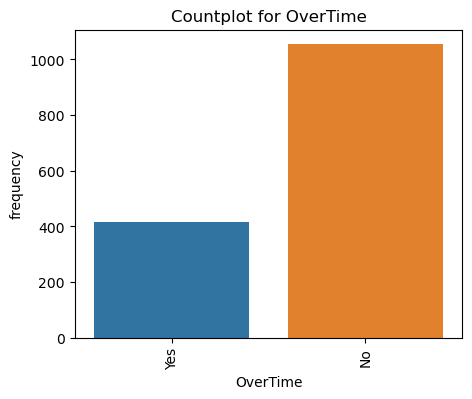

In [37]:
# print the countplot for overtime status for employees
count_plot(data_emp,"OverTime")

In [38]:
data_emp["OverTime"].value_counts(normalize=True)

No    0.717
Yes   0.283
Name: OverTime, dtype: float64

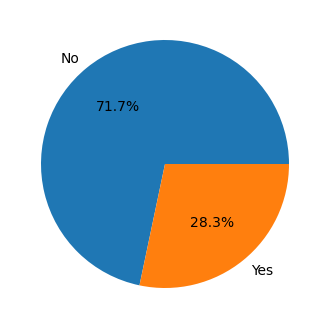

In [39]:
# Create a pie chart to show the percentage for overtime
plt.figure(figsize=(4,5))
values = data_emp["OverTime"].value_counts() /data_emp.shape[0]
plt.pie(values,labels=values.keys(),autopct="%1.1f%%")
plt.show()

### Observation
72% of the employees are not working overtime, which means they observe thier standard working hours required by the company. <br>
This might imply that thier work life balance is relatively higher as compared to those working overtime.

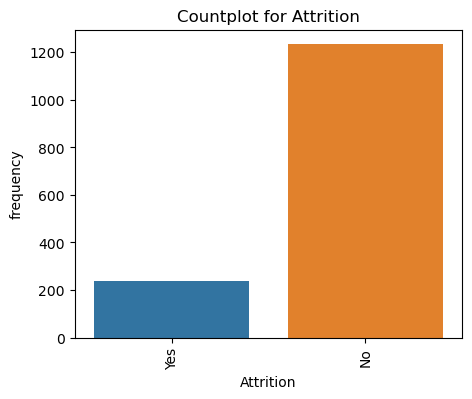

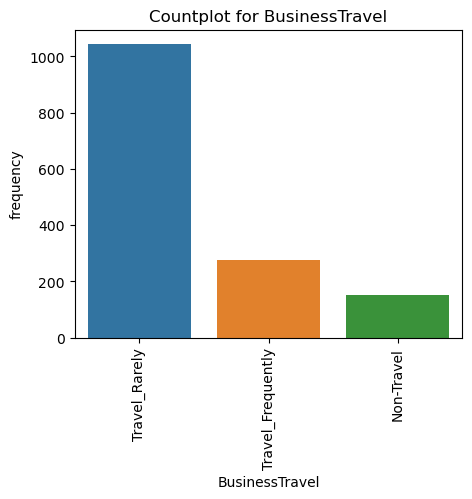

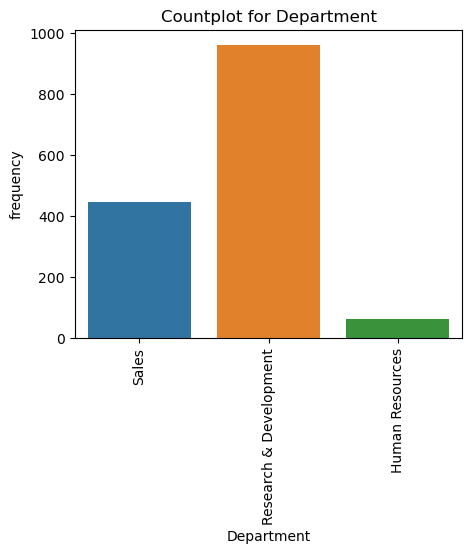

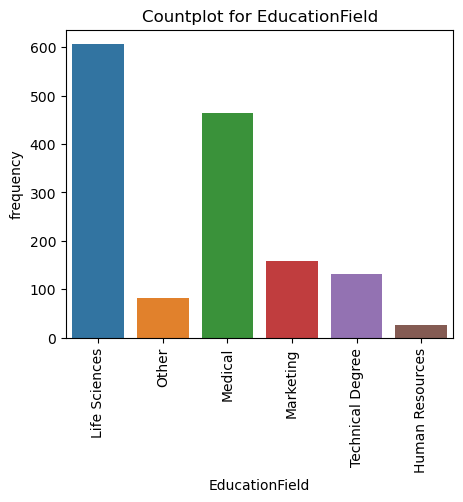

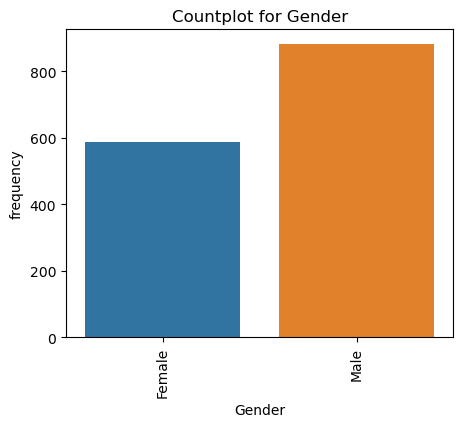

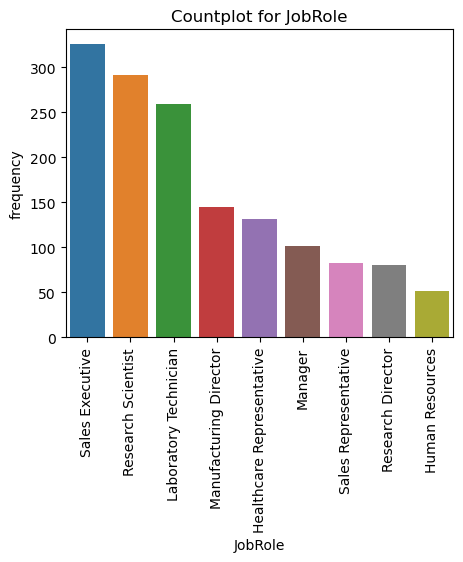

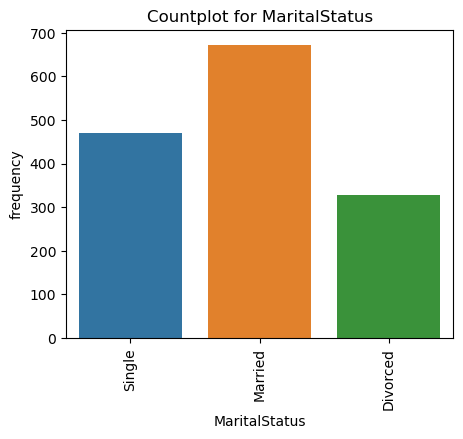

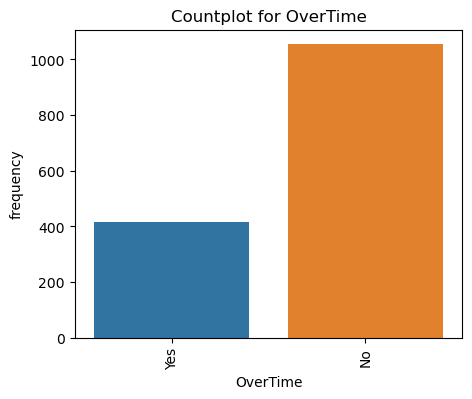

In [40]:
# Code the call the function to display the histogram and boxplots for numericl columns
for item in data_emp[categorical_data]:
    count_plot(data_emp,item)

## Bivariate data analysis:

#### Categorical and Numerical data analysis

In [41]:
## Create a function to display boxplots for numerical and categorical dataset
def box_plot(data,item_1,categorical_item):
    plt.figure(figsize=(15,7))  # Increase the size of the plot
    sns.boxplot(data=data,x = item_1, y = categorical_item, palette = "Paired_r") 
    plt.title(f"The boxplot for {item_1} relative to {categorical_item}")
    plt.xlabel(item_1)
    plt.ylabel(categorical_item)
    plt.show()

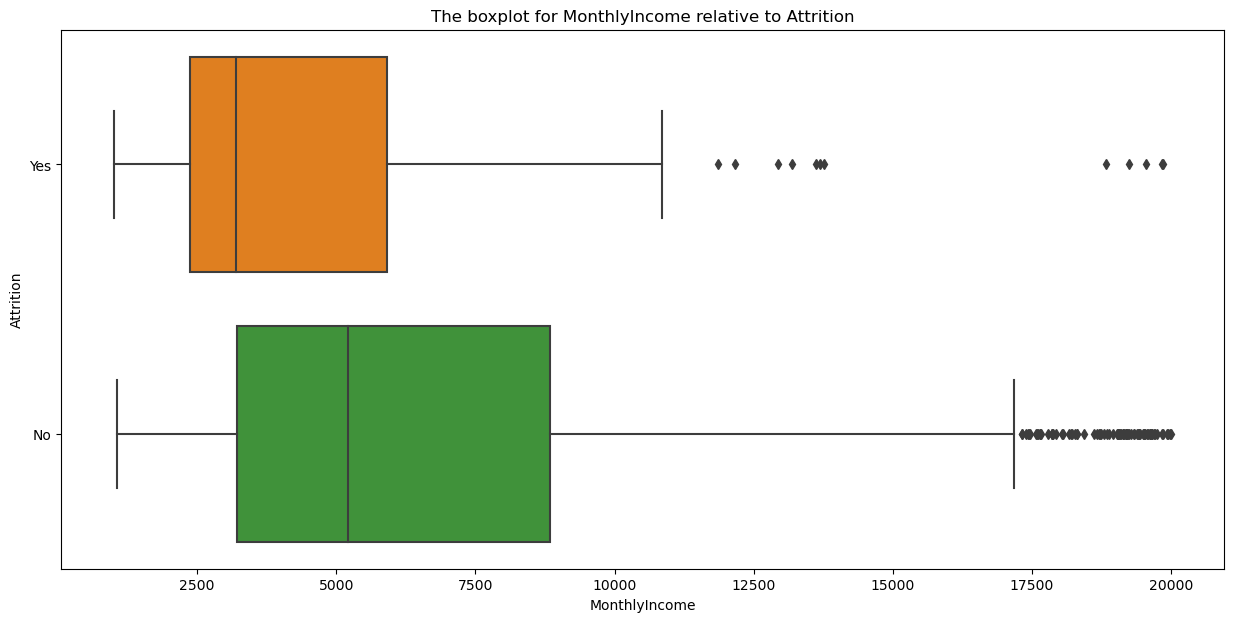

In [42]:
# Boxplot for monthly income relative to attrition 
box_plot(data_emp,"MonthlyIncome","Attrition")

### Observation:
The monthly income for employee who are not on attrition is skewed to the right with mean greater than the median. <br>
There are more outliers on the right of the whiskers for the monthly income. <br>
75% of the employees who are not on attrition earns a monthly income of roughly 7800 dollars and above.<br>
Most employee that are on attrition thier average monthly income is less than those who are not on attrition. <br>
This might imply that monthly income has in impact towards employee attrition.

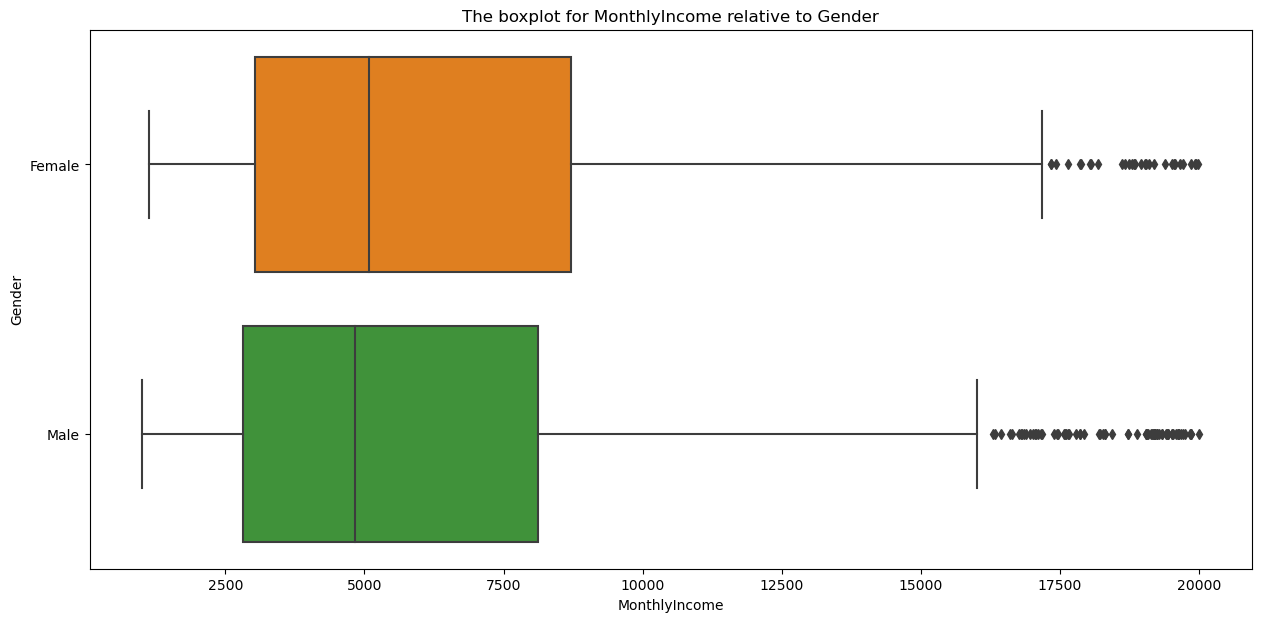

In [43]:
# Boxplot for monthly income relative to gender
box_plot(data_emp,"MonthlyIncome","Gender")

### Observation:
The monthly income data relative to gender is skewed to the right with outliers on the right side of the whisker. <br>
However the average monthly income for females is higher than those of the males.<br>
75% of the females employees earn a monthly income of roughly 8750 dollar and above, which is higher than that of males.<br>
These means that females employees in the organisation earns more than males

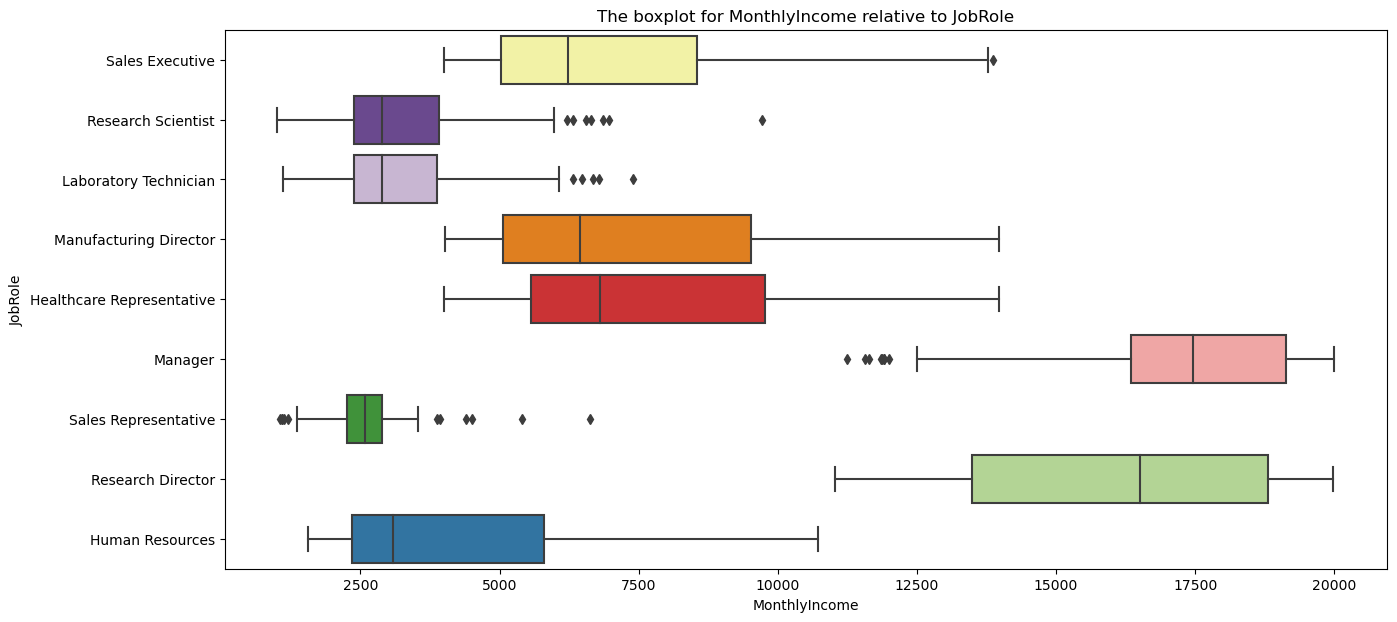

In [44]:
# Boxplot for monthly income relative to jobroles
box_plot(data_emp,"MonthlyIncome","JobRole")

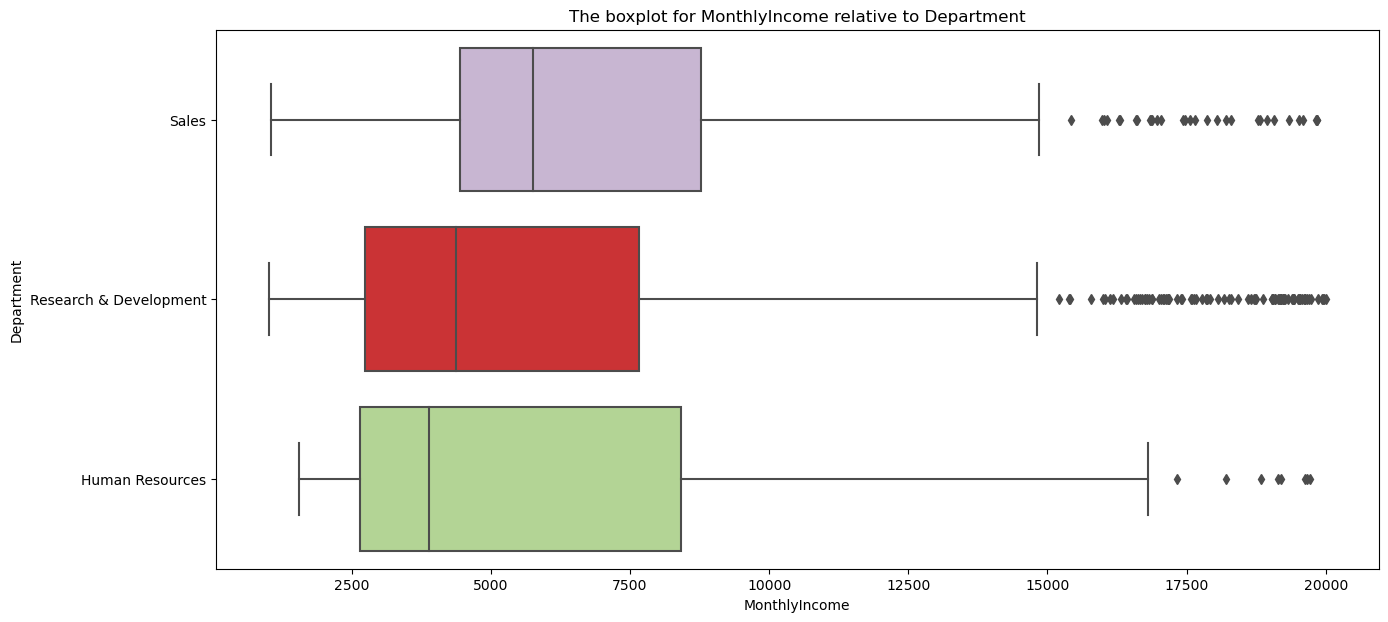

In [45]:
# Boxplot for monthly income relative to department.
box_plot(data_emp,"MonthlyIncome","Department")

### Observation:
On average sales employees earns higher monthly income as compared to those working in  R&D and Human resources.

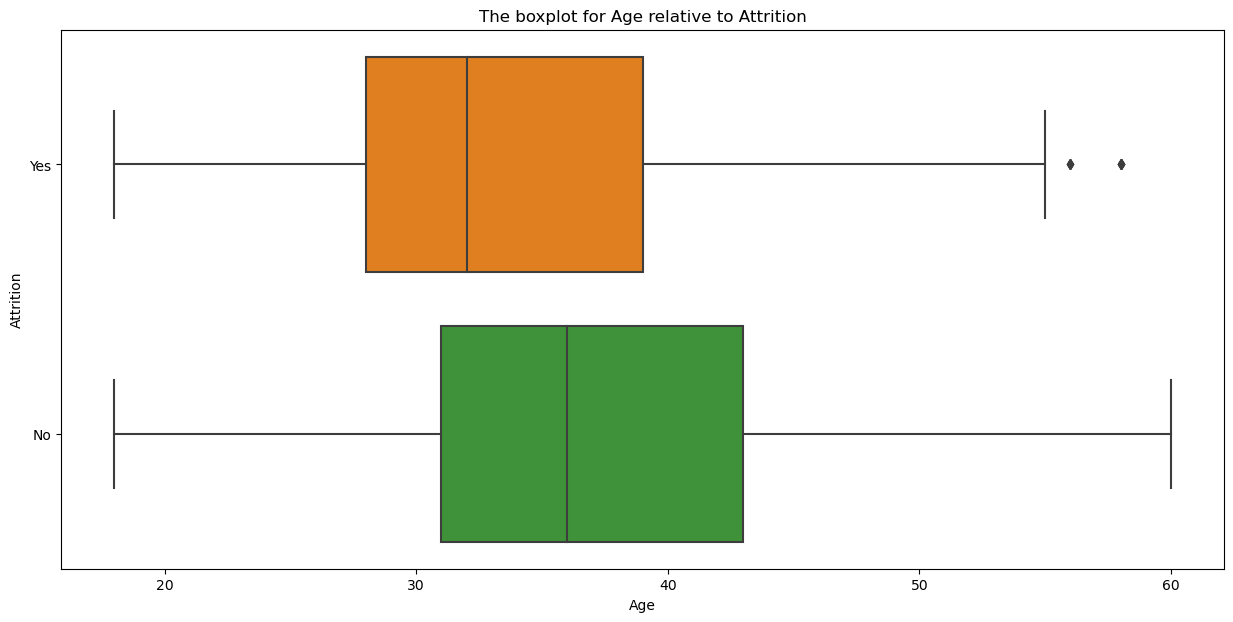

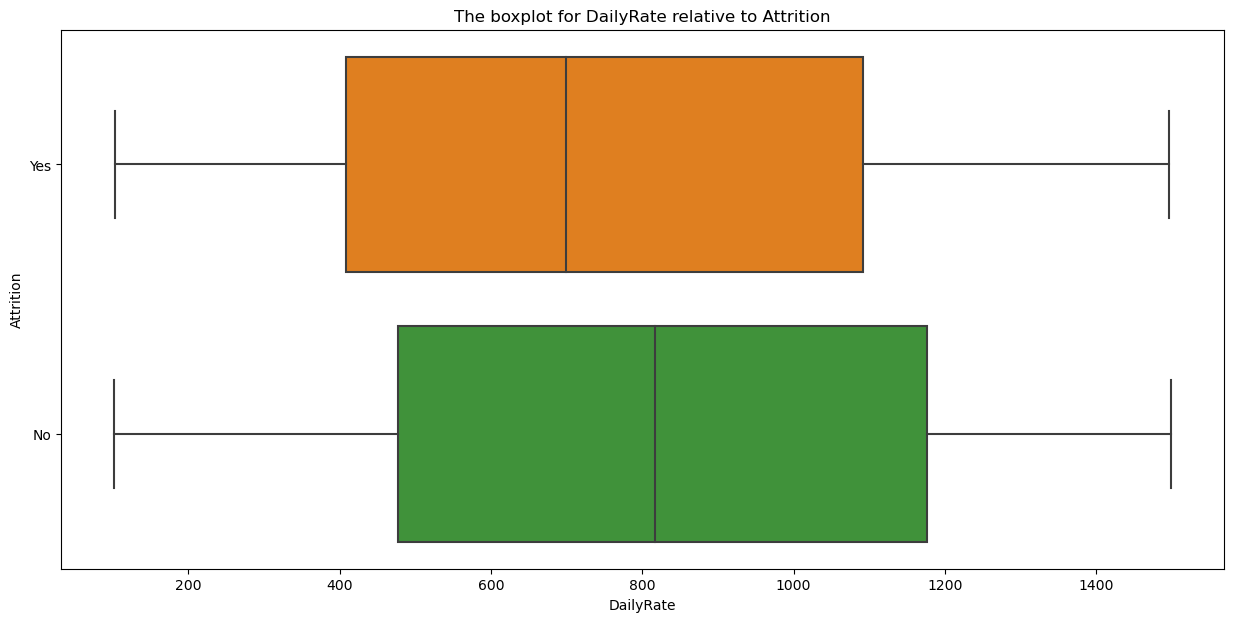

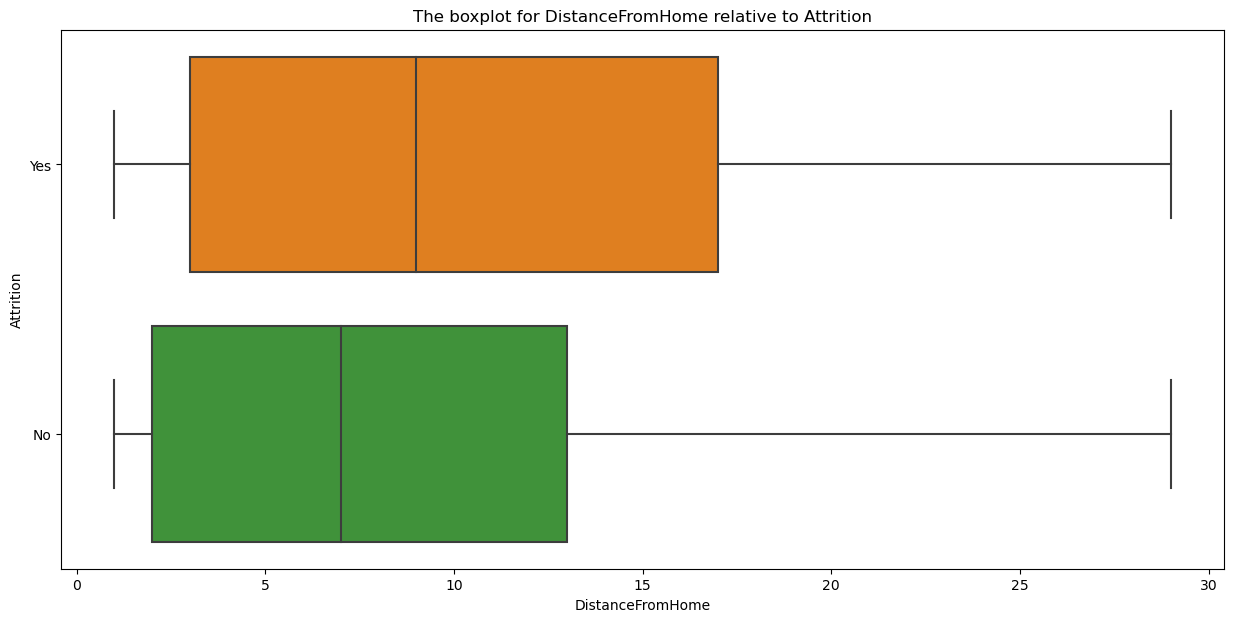

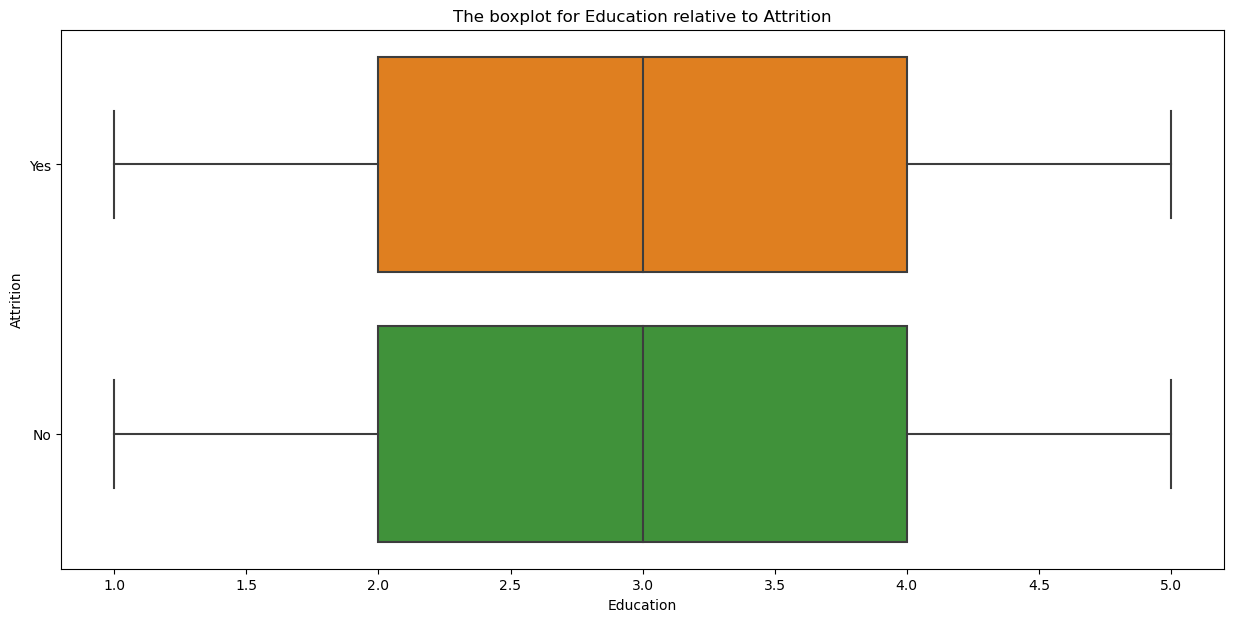

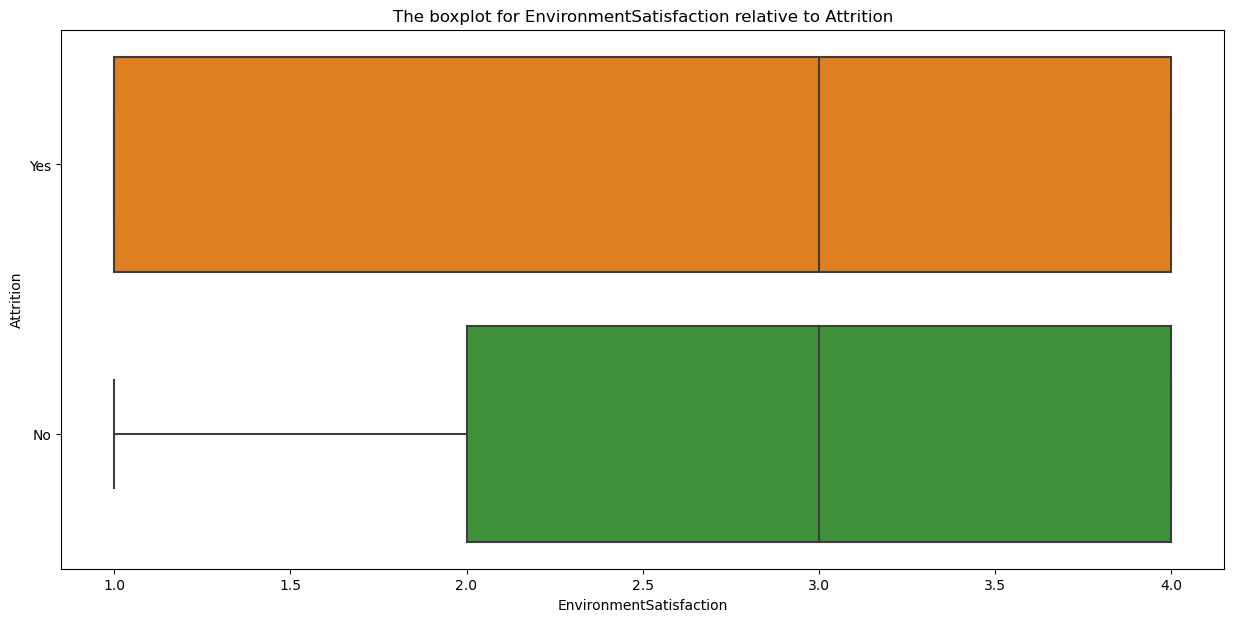

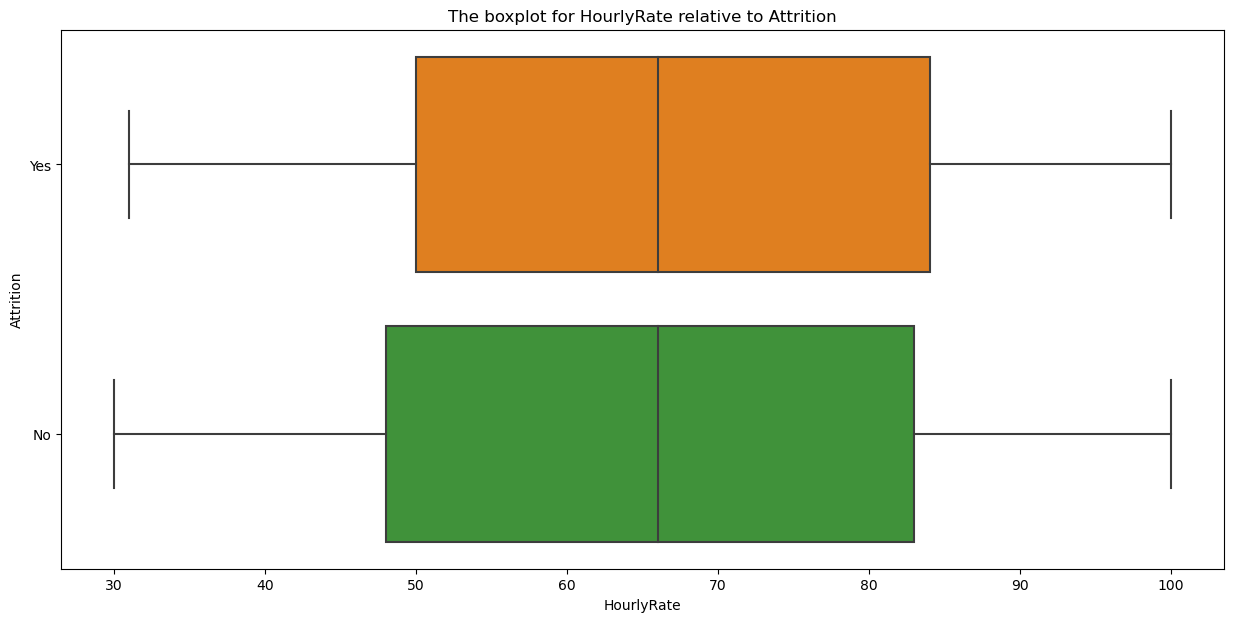

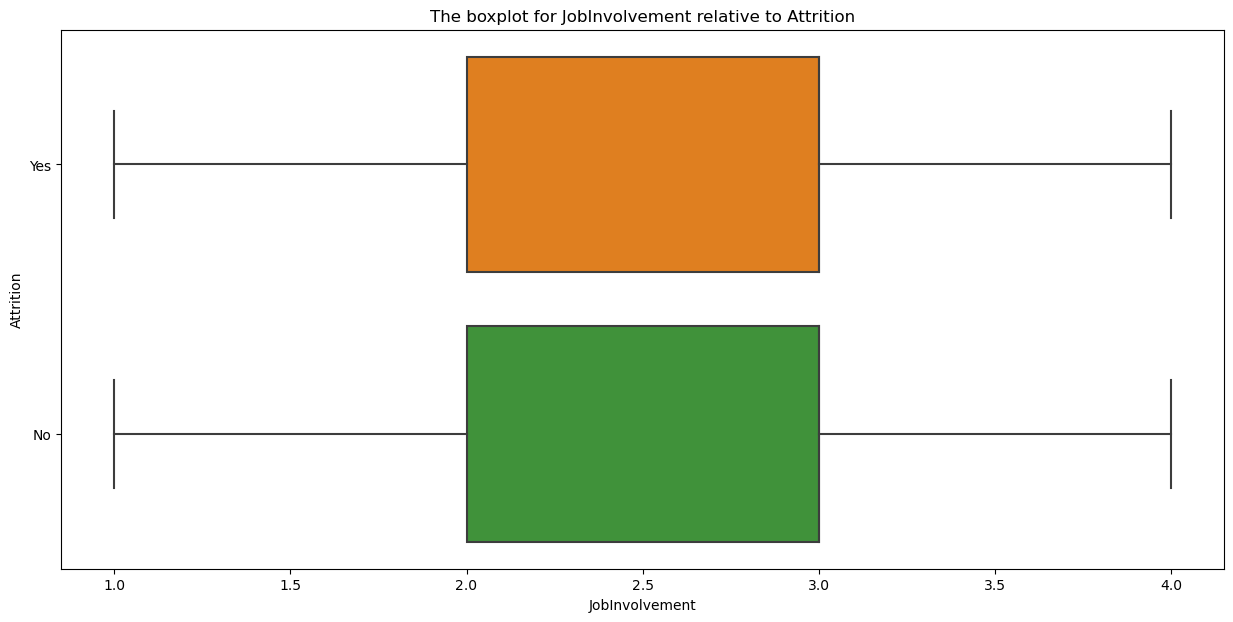

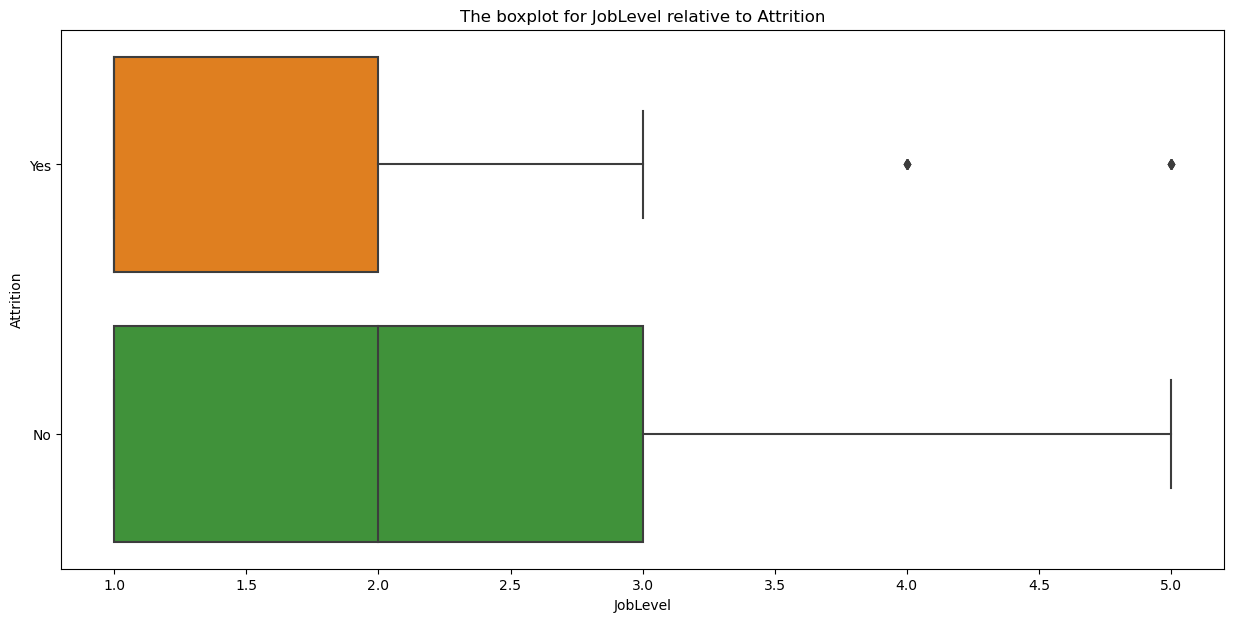

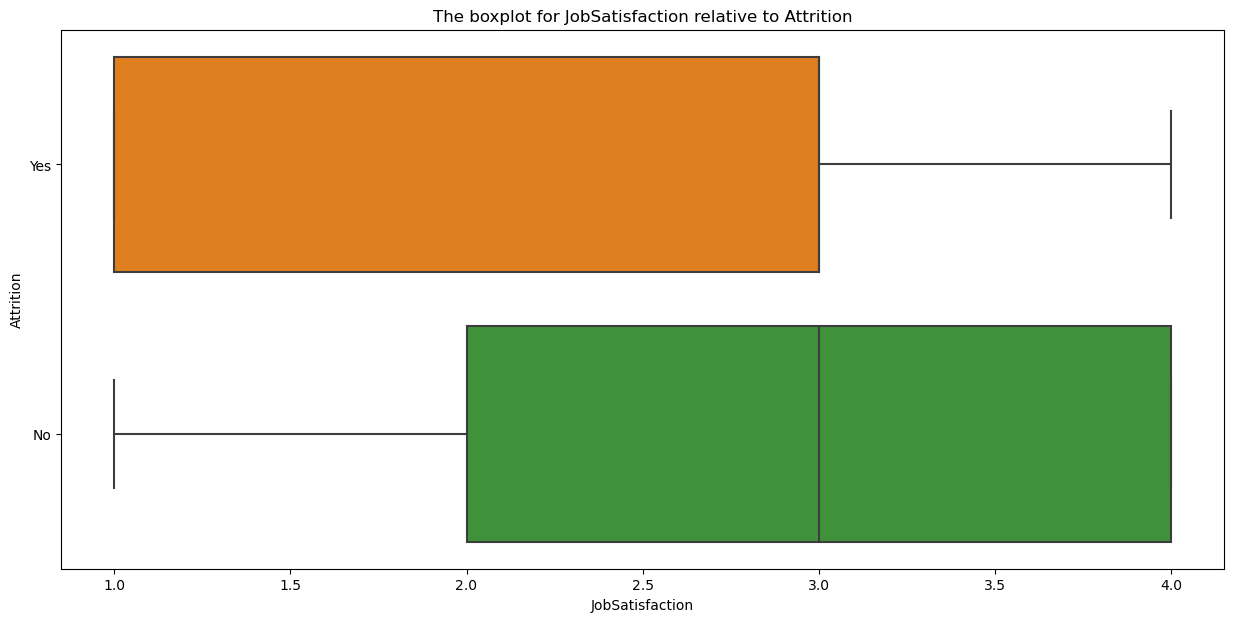

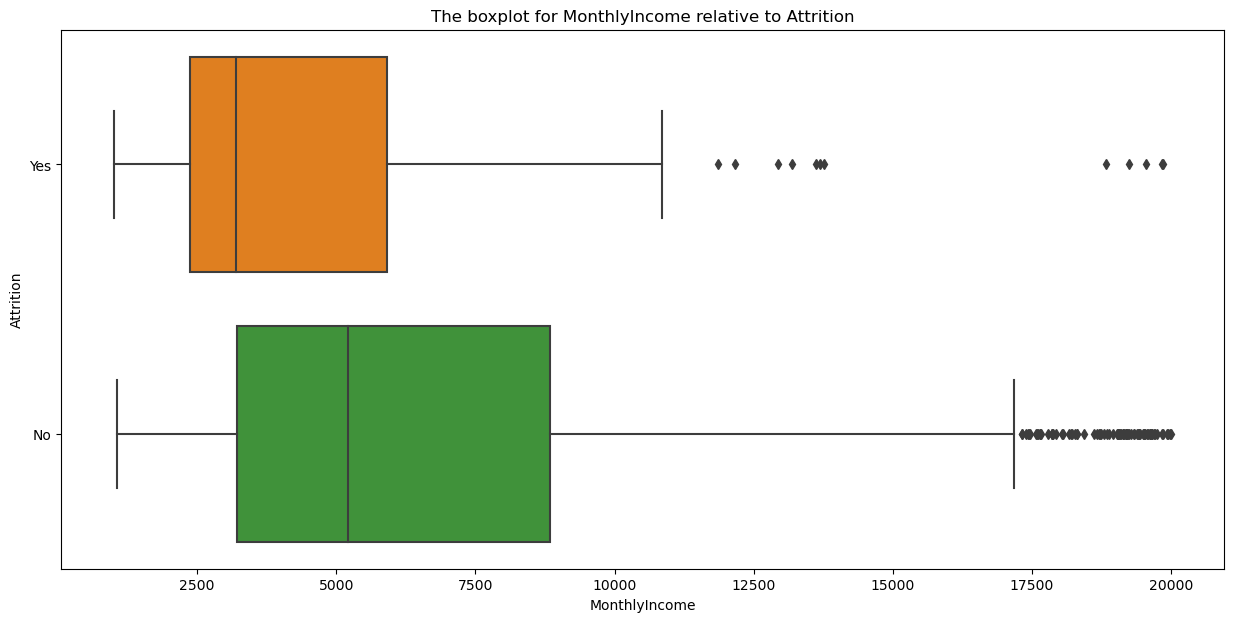

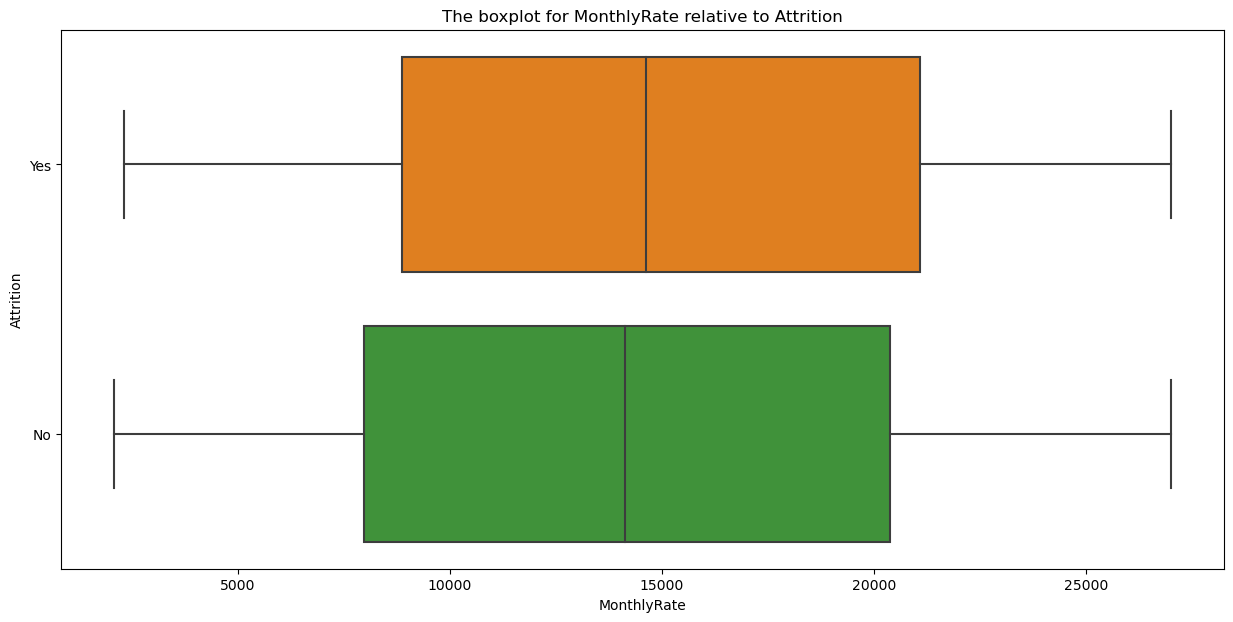

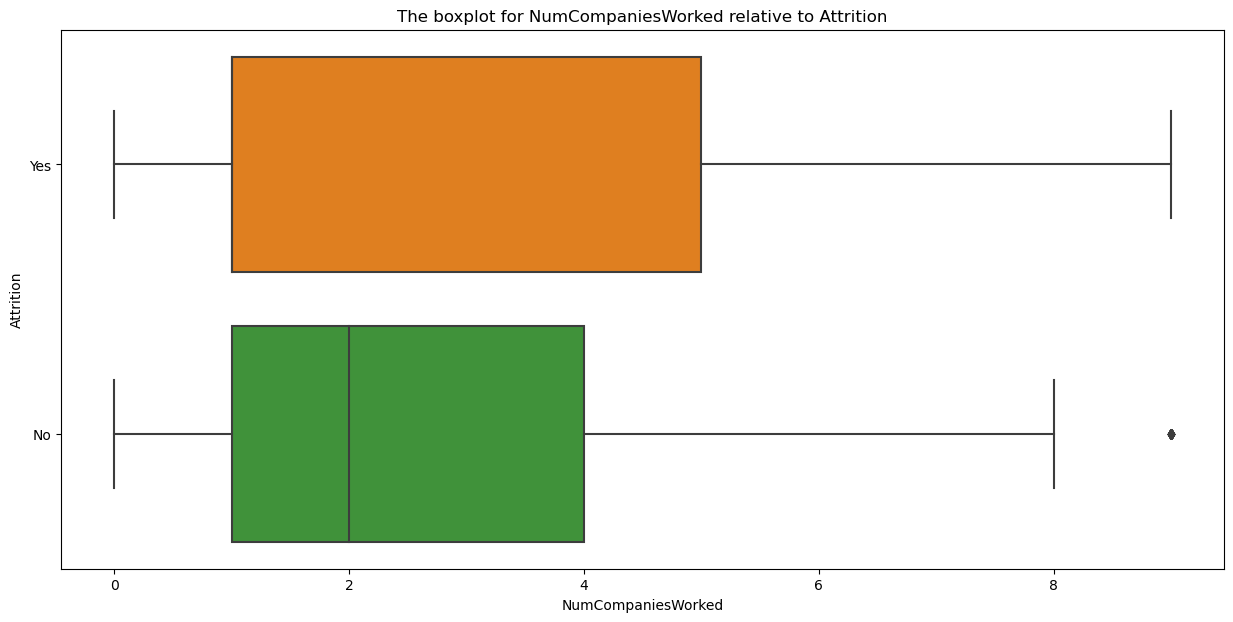

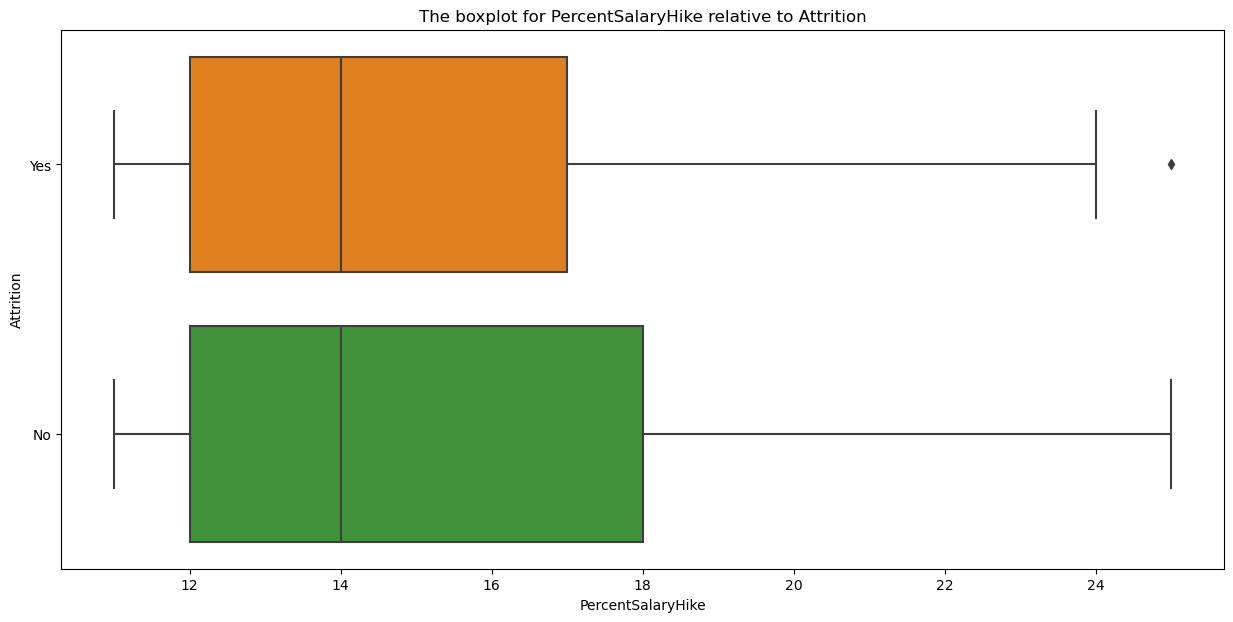

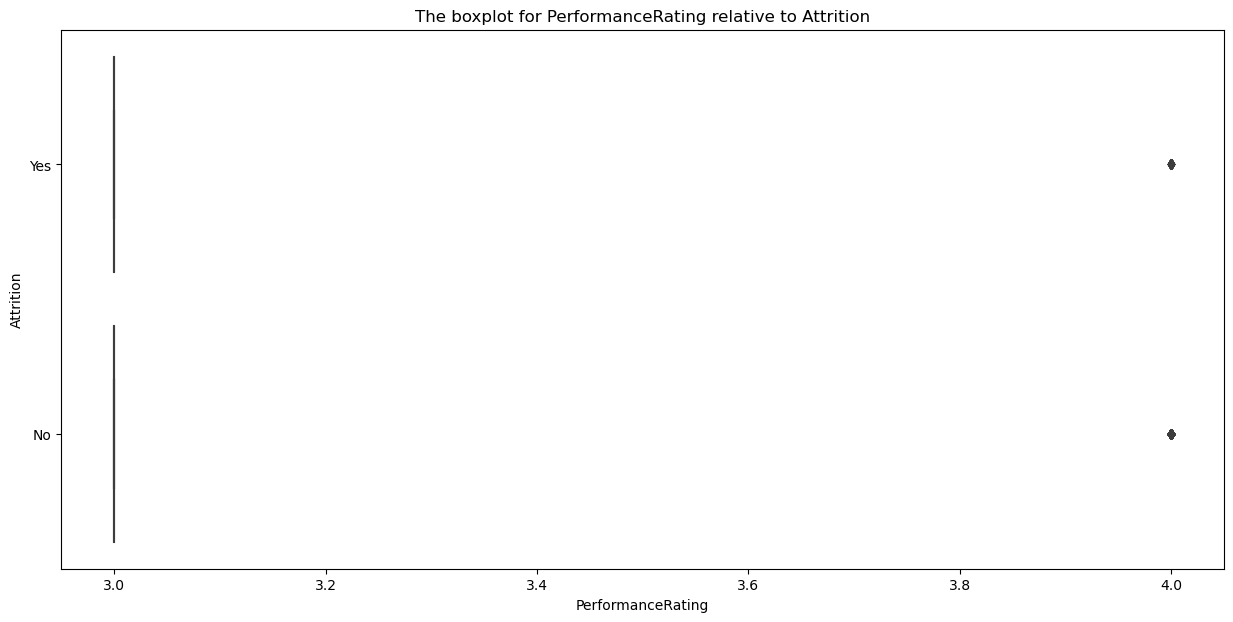

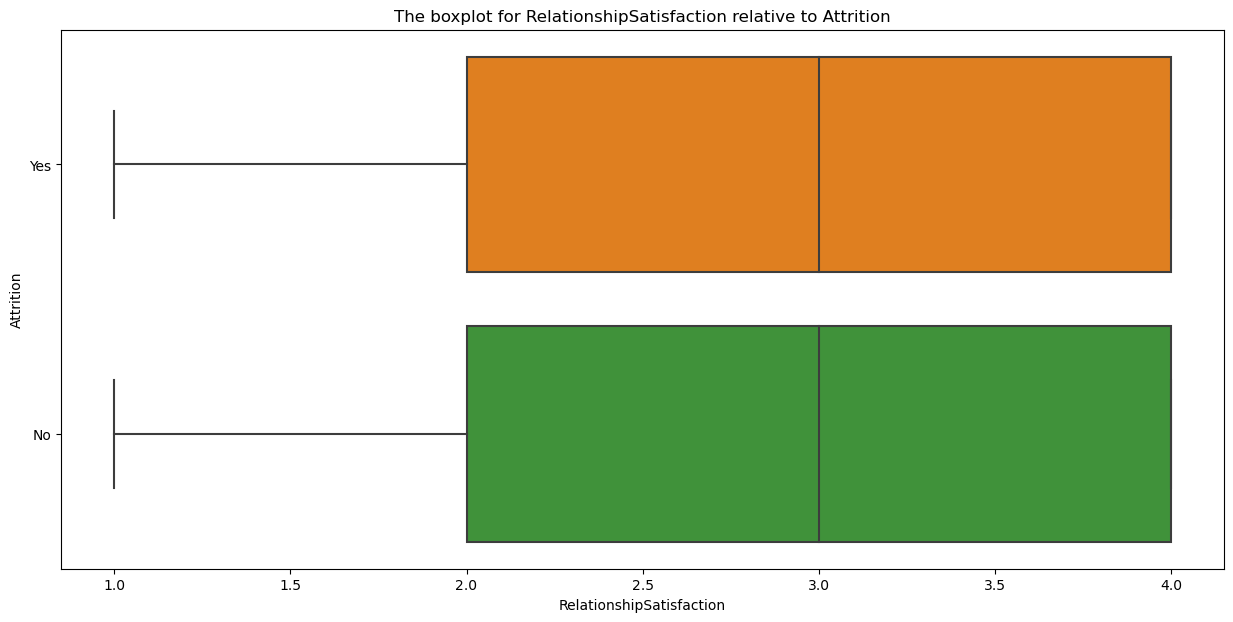

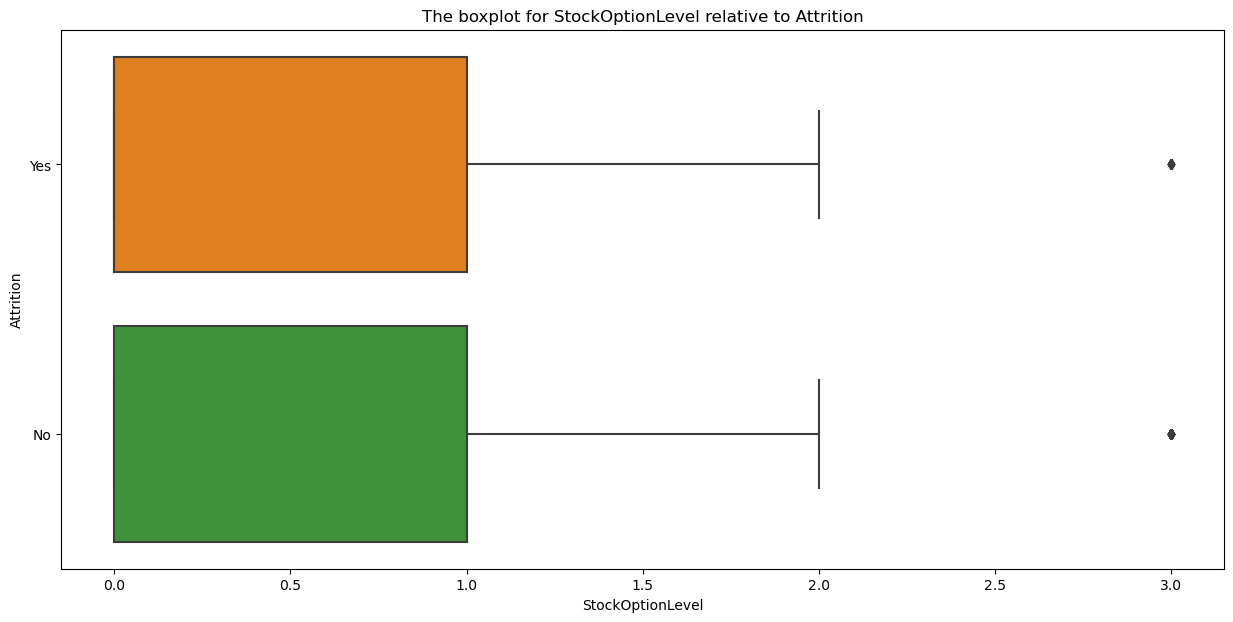

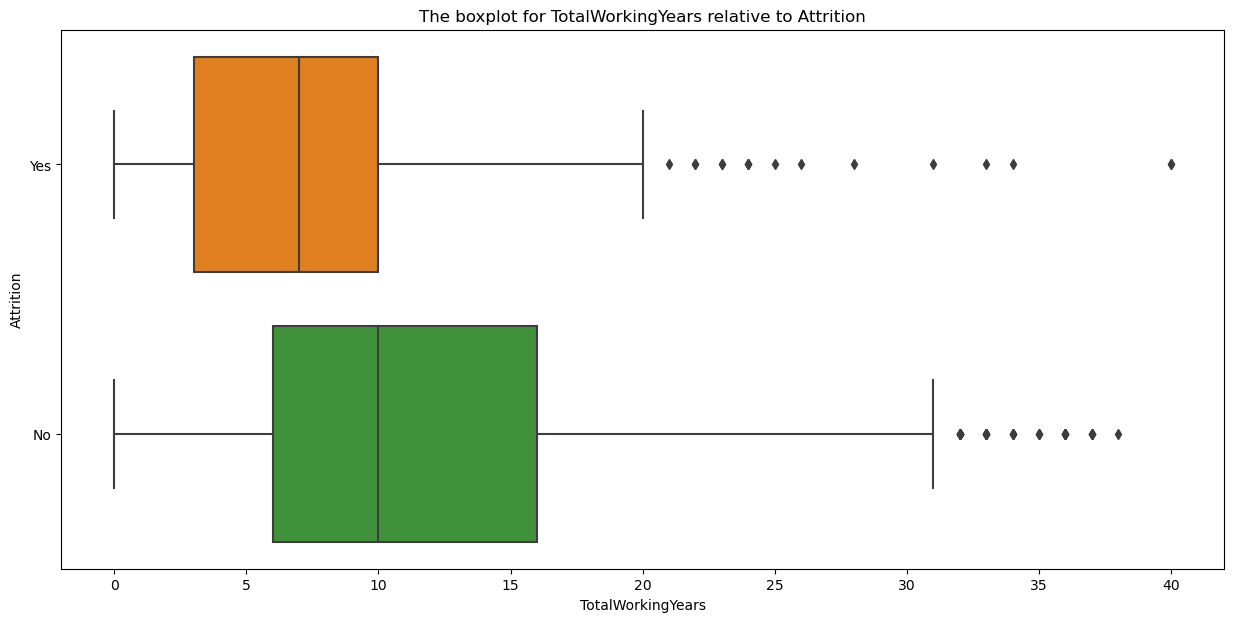

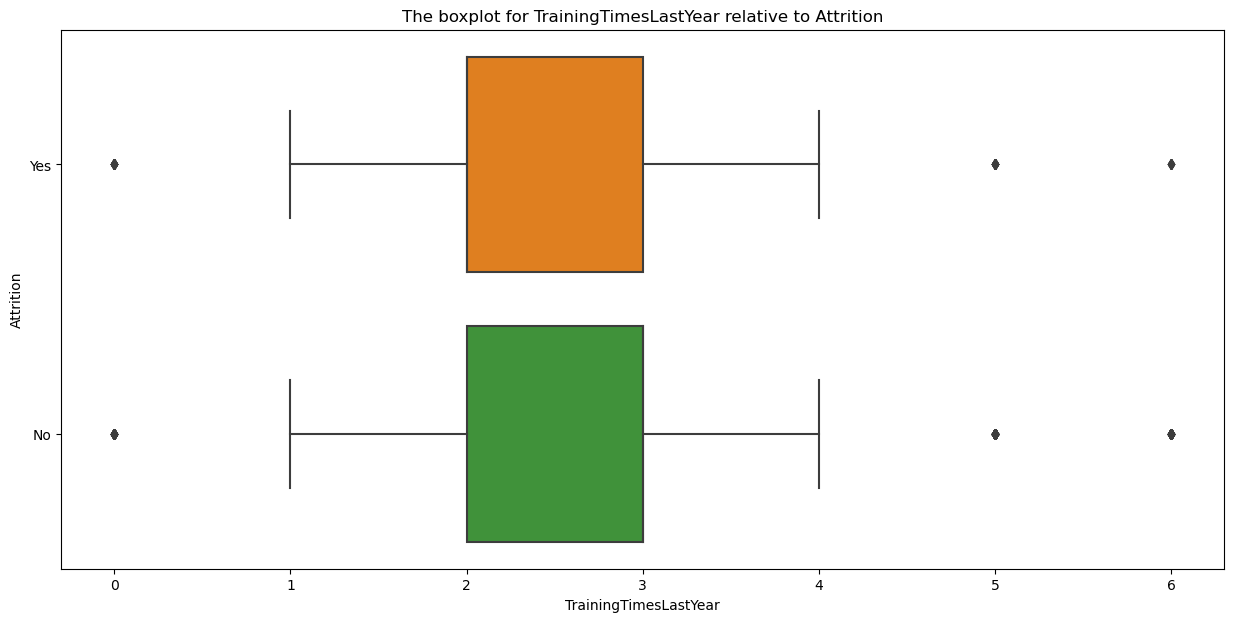

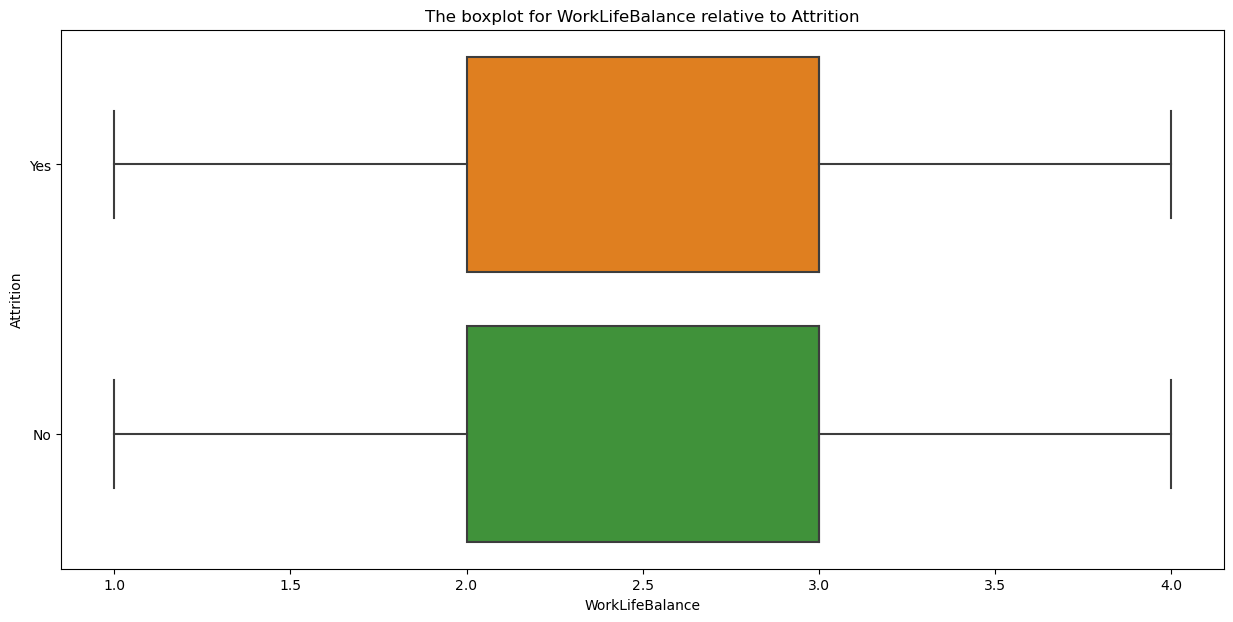

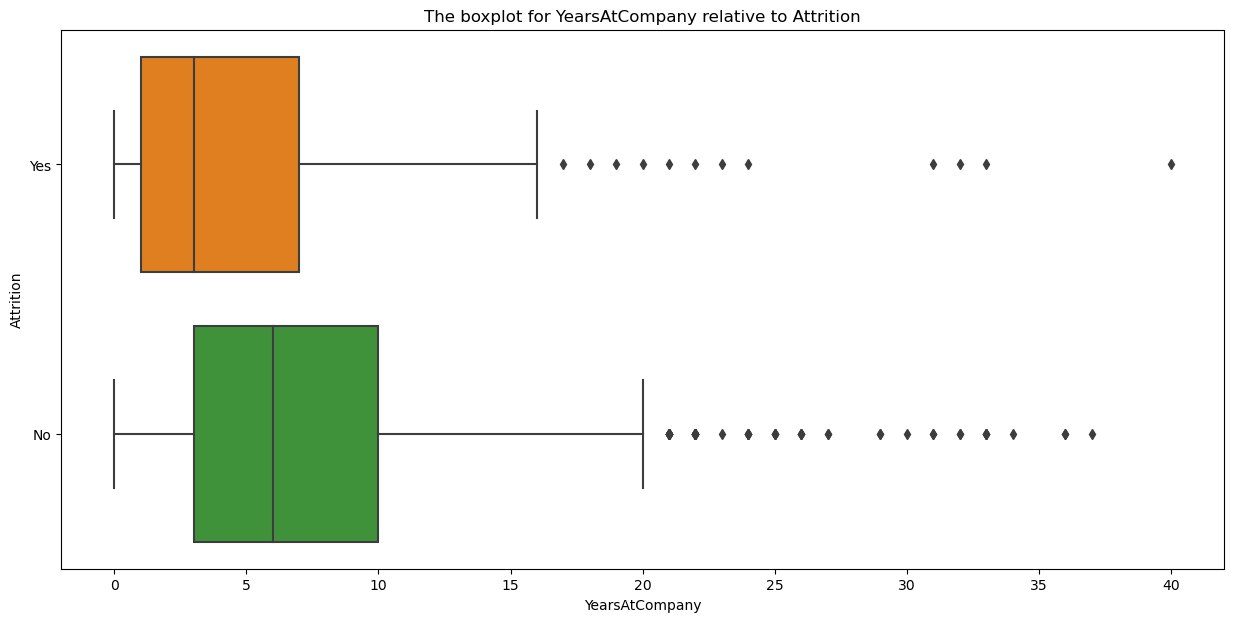

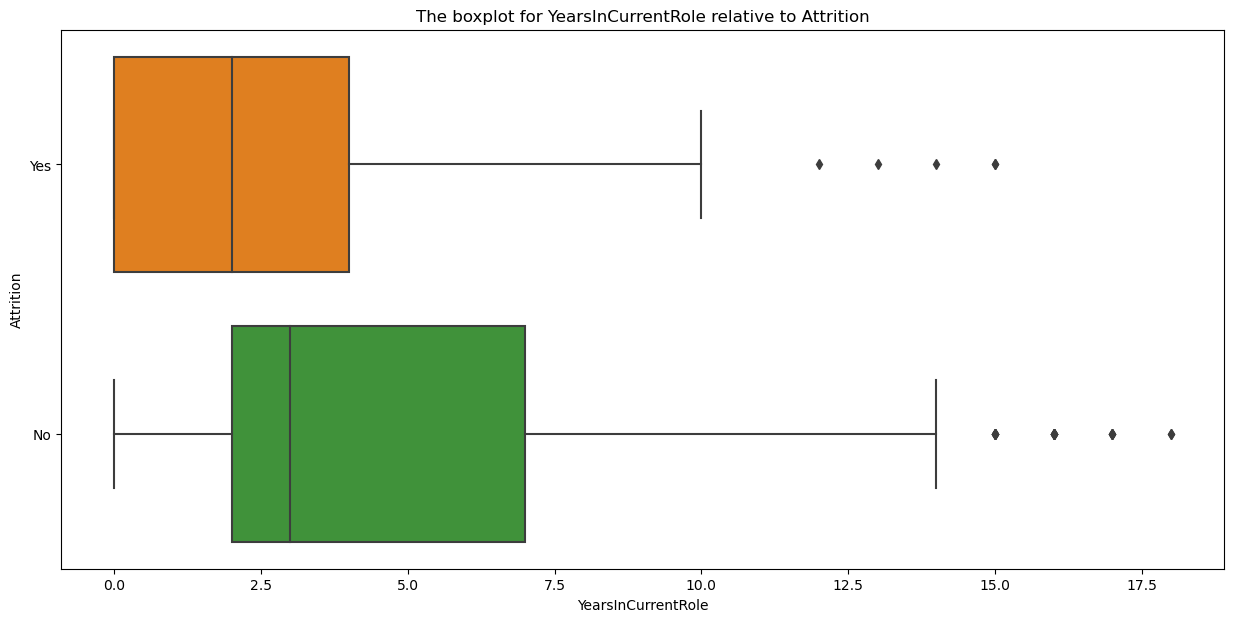

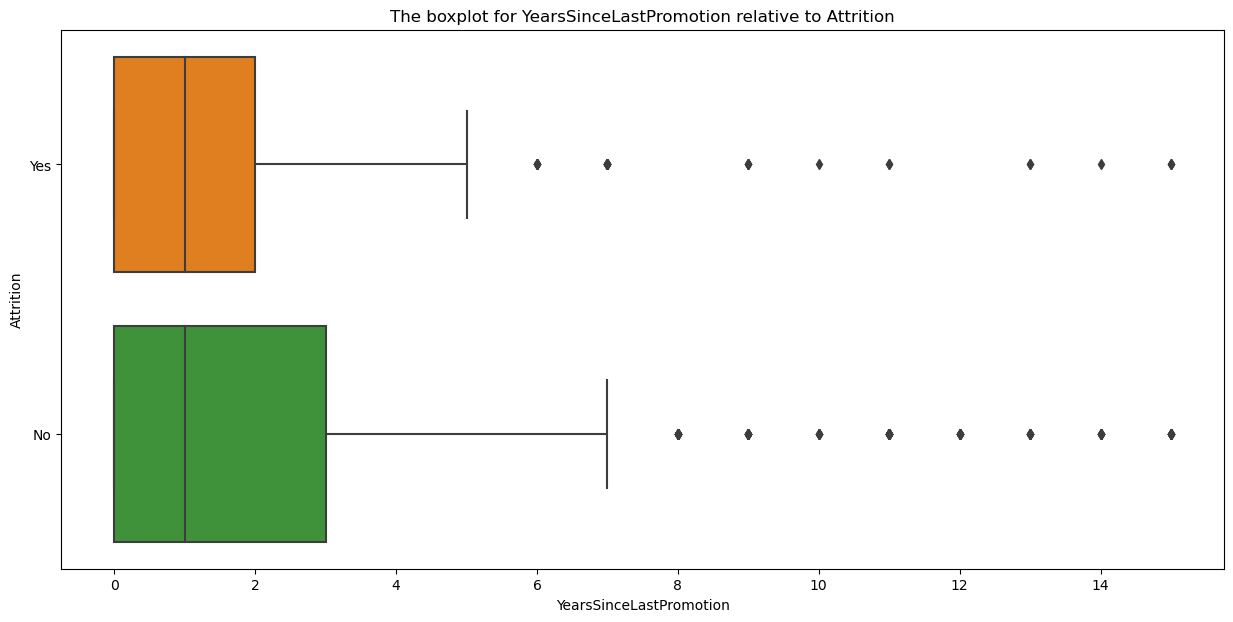

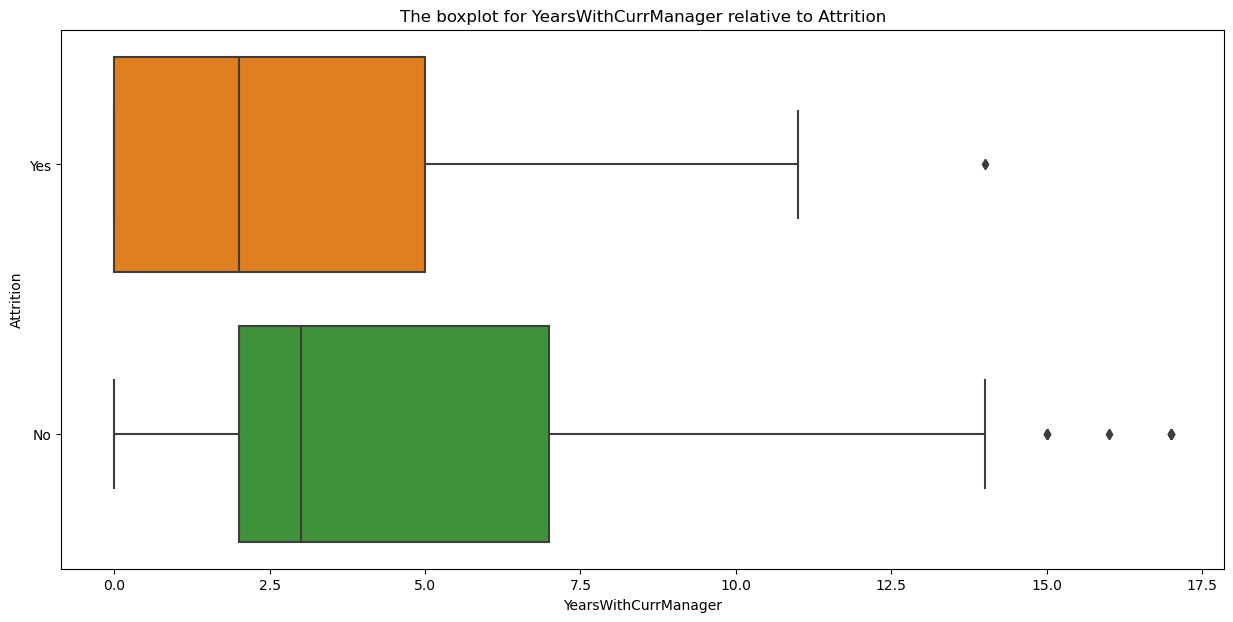

In [46]:
# Code to print the boxplot for numerical columns relative to categorical data
for variable in numerical_columns:
    box_plot(data,variable,categorical_data[0])

### Categorical data analysis only

In [47]:
## Create a function to display a countplot for bivariate categorical columns relatives to churn data
def bivariate_plot(data,item_1,item_2):
    plt.figure(figsize=(10,7))
    sns.countplot(x=item_1,data=data,palette="YlGnBu",hue=item_2)
    plt.ylabel("frequency")
    plt.show()

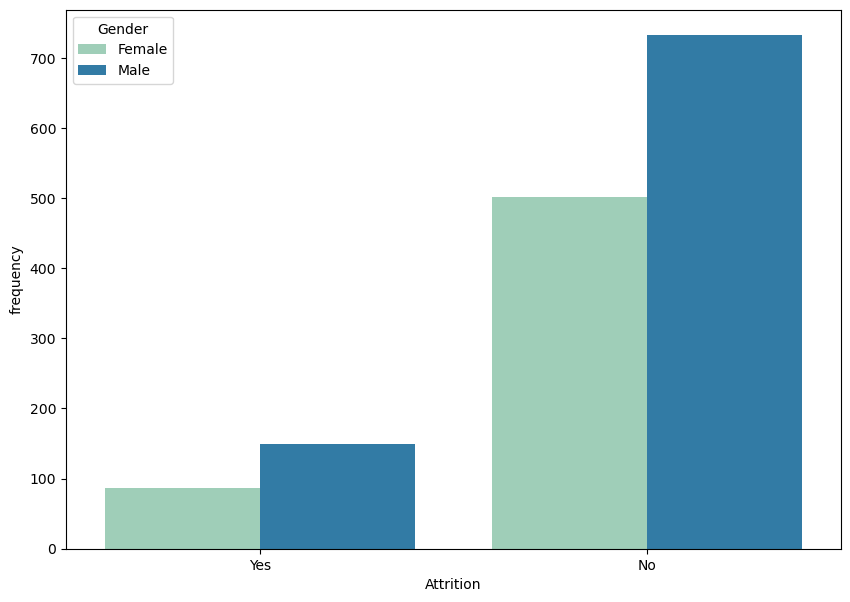

In [48]:
bivariate_plot(data_emp,"Attrition","Gender")

In [49]:
round(data.groupby("Attrition")["Gender"].value_counts(normalize=True),3)*100 

Attrition  Gender
No         Male     59.400
           Female   40.600
Yes        Male     63.300
           Female   36.700
Name: Gender, dtype: float64

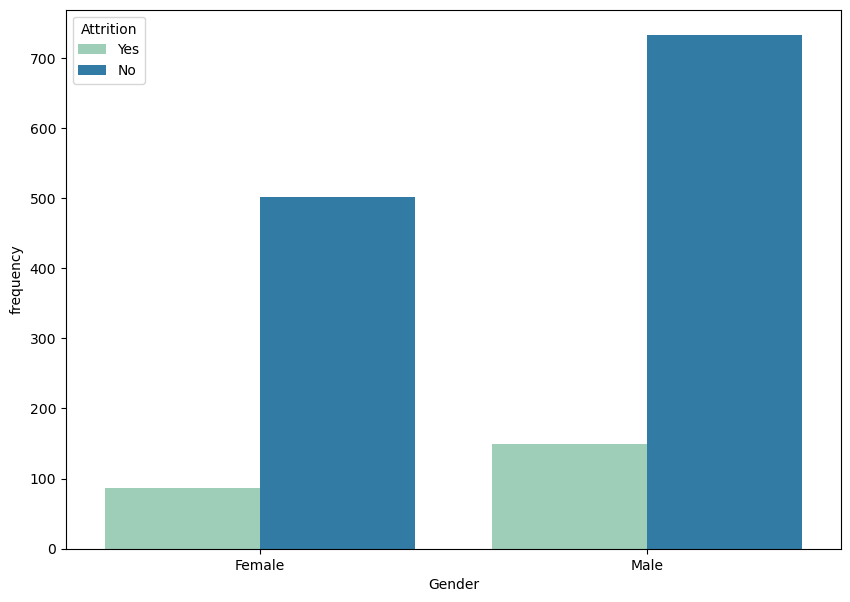

In [50]:
bivariate_plot(data_emp,"Gender","Attrition")

In [51]:
round(data.groupby("Gender")["Attrition"].value_counts(normalize=True),3)*100 

Gender  Attrition
Female  No          85.200
        Yes         14.800
Male    No          83.000
        Yes         17.000
Name: Attrition, dtype: float64

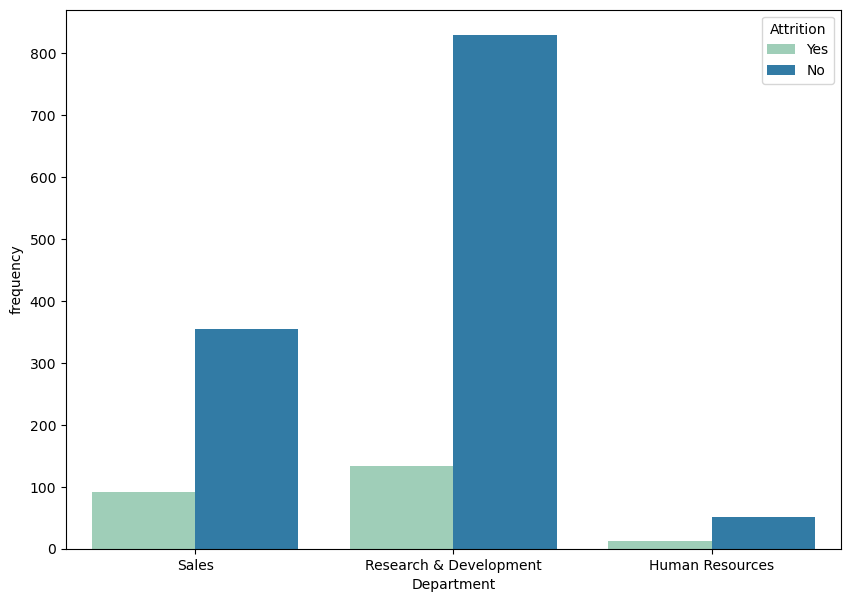

In [52]:
bivariate_plot(data_emp,"Department","Attrition")

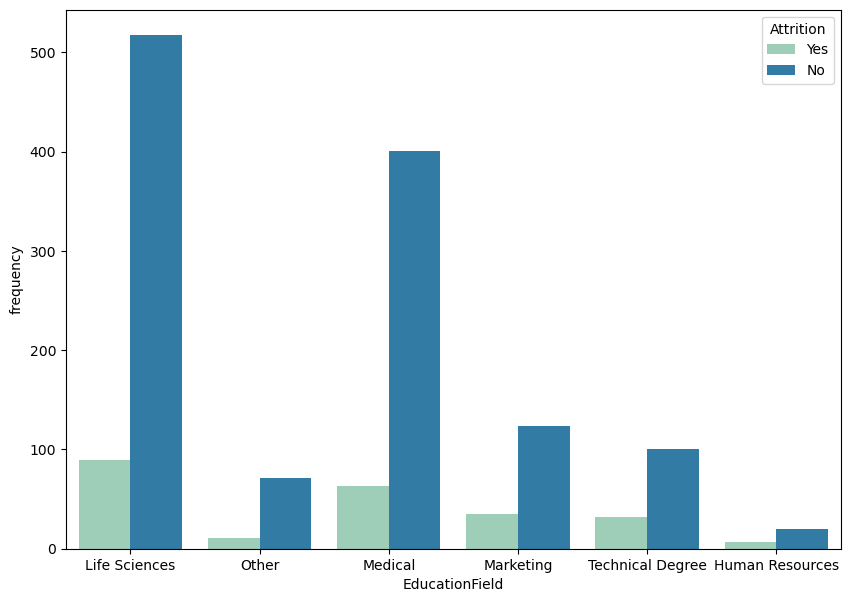

In [53]:
bivariate_plot(data_emp,"EducationField","Attrition")

In [54]:
round(data.groupby("EducationField")["Attrition"].value_counts(normalize=True),3)*100 

EducationField    Attrition
Human Resources   No          74.100
                  Yes         25.900
Life Sciences     No          85.300
                  Yes         14.700
Marketing         No          78.000
                  Yes         22.000
Medical           No          86.400
                  Yes         13.600
Other             No          86.600
                  Yes         13.400
Technical Degree  No          75.800
                  Yes         24.200
Name: Attrition, dtype: float64

In [55]:
## Create a function to display a countplot for bivariate categorical columns relatives to attrition
def bivariate_plot1(data,item_1,item_2):
    plt.figure(figsize=(10,7))
    sns.countplot(x=item_1,data=data,palette="YlGnBu",hue=item_2)
    plt.ylabel("frequency")
    plt.xticks(rotation=90)
    plt.show()

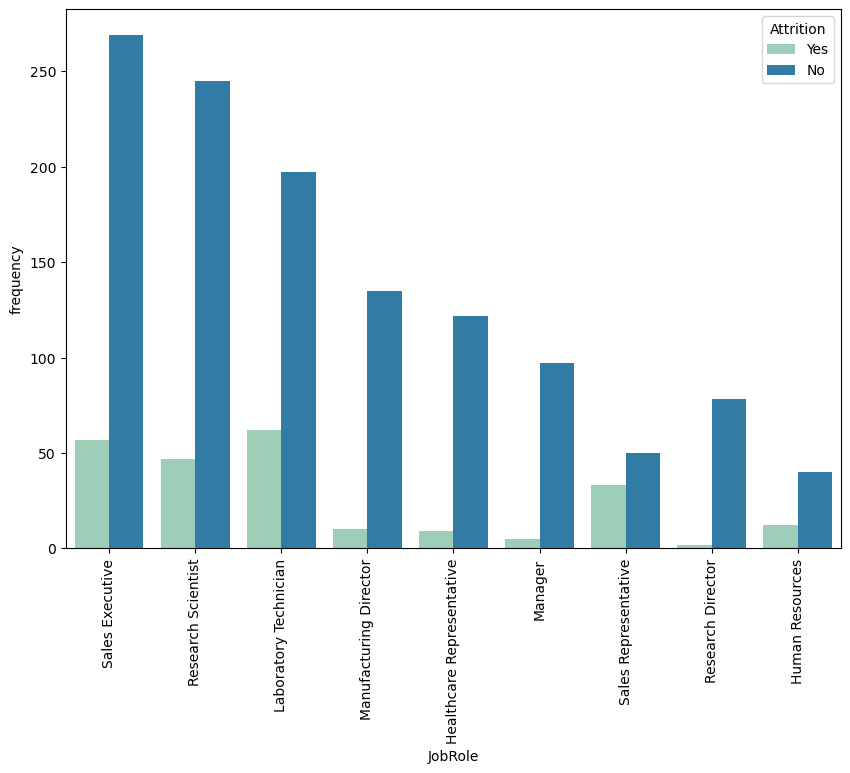

In [56]:
bivariate_plot1(data_emp,"JobRole","Attrition")

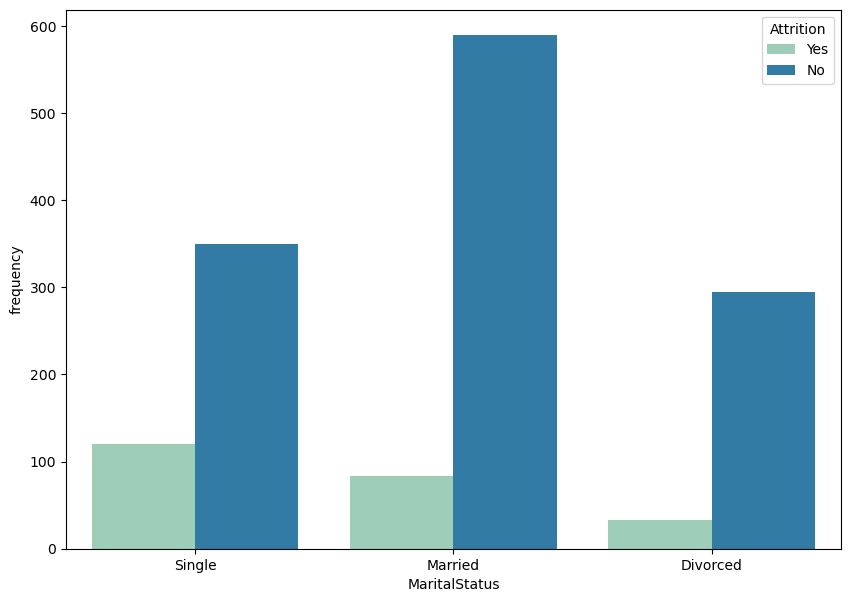

In [57]:
bivariate_plot(data_emp,"MaritalStatus","Attrition")

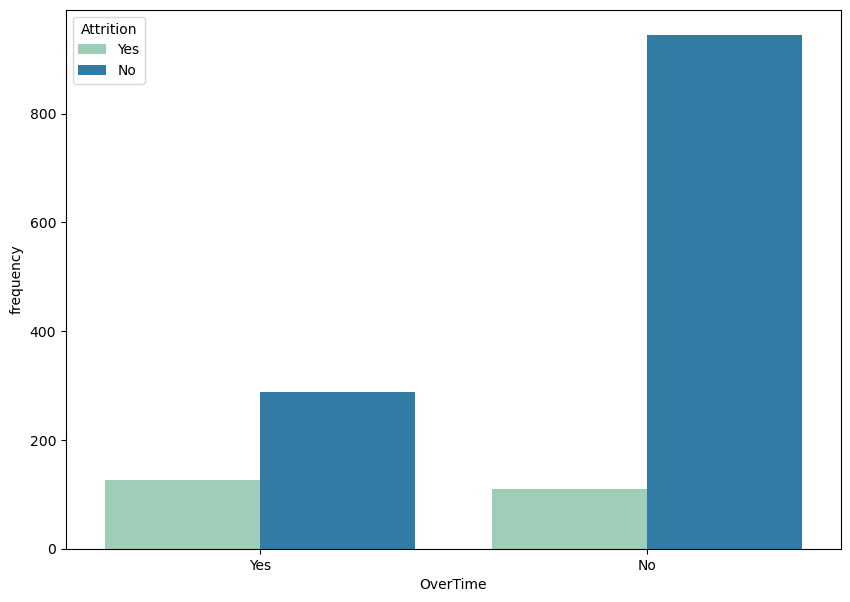

In [58]:
bivariate_plot(data_emp,"OverTime","Attrition")

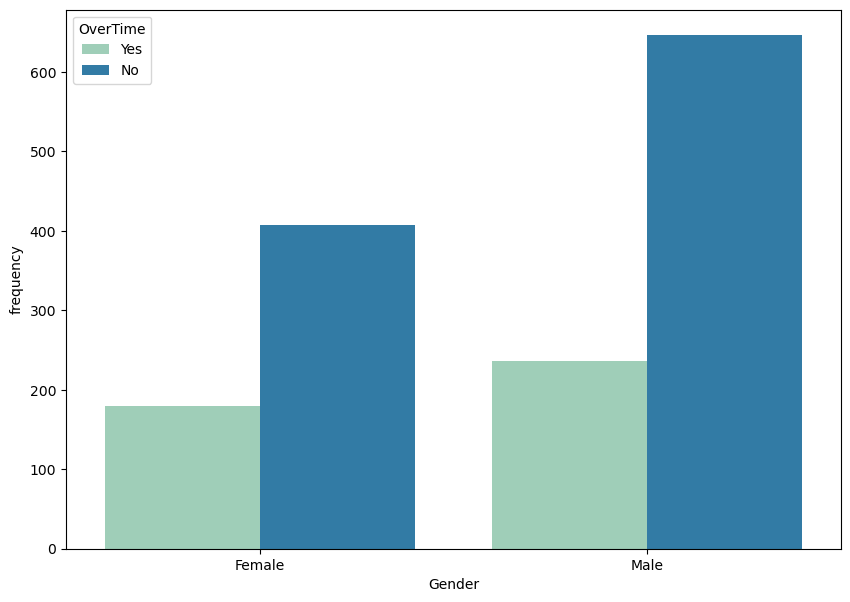

In [59]:
bivariate_plot(data_emp,"Gender","OverTime")

### Numerical data

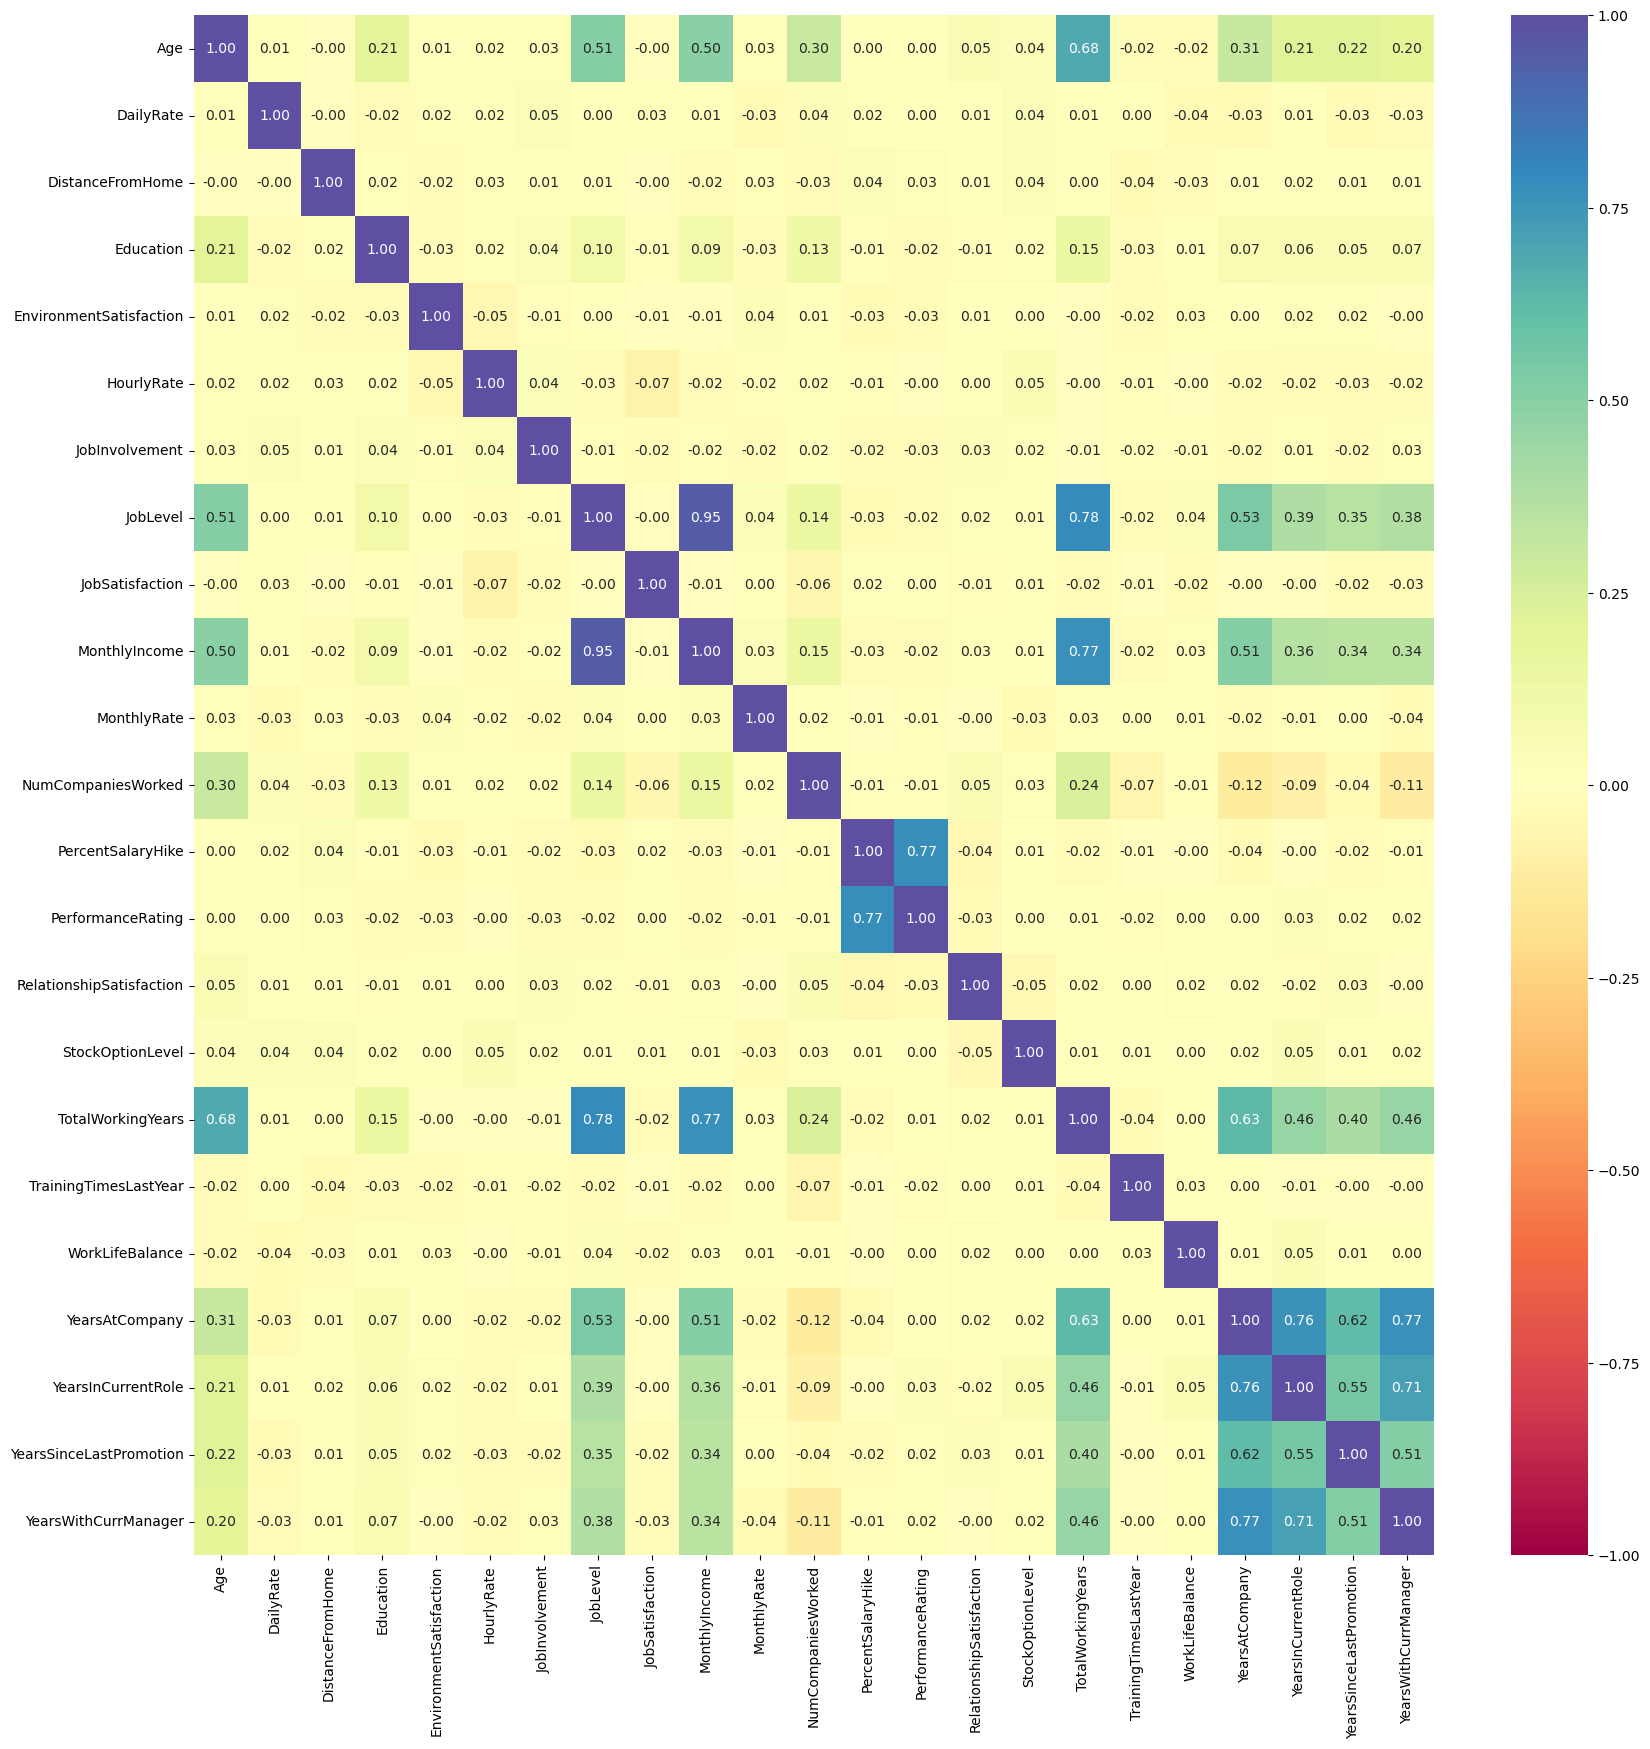

In [60]:
## Construct a correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(data_emp.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

## Observation:
* Most  of the independent variables are uncorrelated to each other, except for few variables.
* There is a very strong positive correlation between monthly income and job level. <br>
* There is a strong positive correlation between job level and total working years. <br>
* The job level,monthly income,Age and total working years are positively correlated to yearATCompany,YearsincurrentRole,YearsinceLastPromotion and YearswithcurrManager. <br>
* Age and total working years shows a positive correlation.

## Data preprocessing

### Feature engineering

#### OUTLIER DETECTION AND TREATMENT

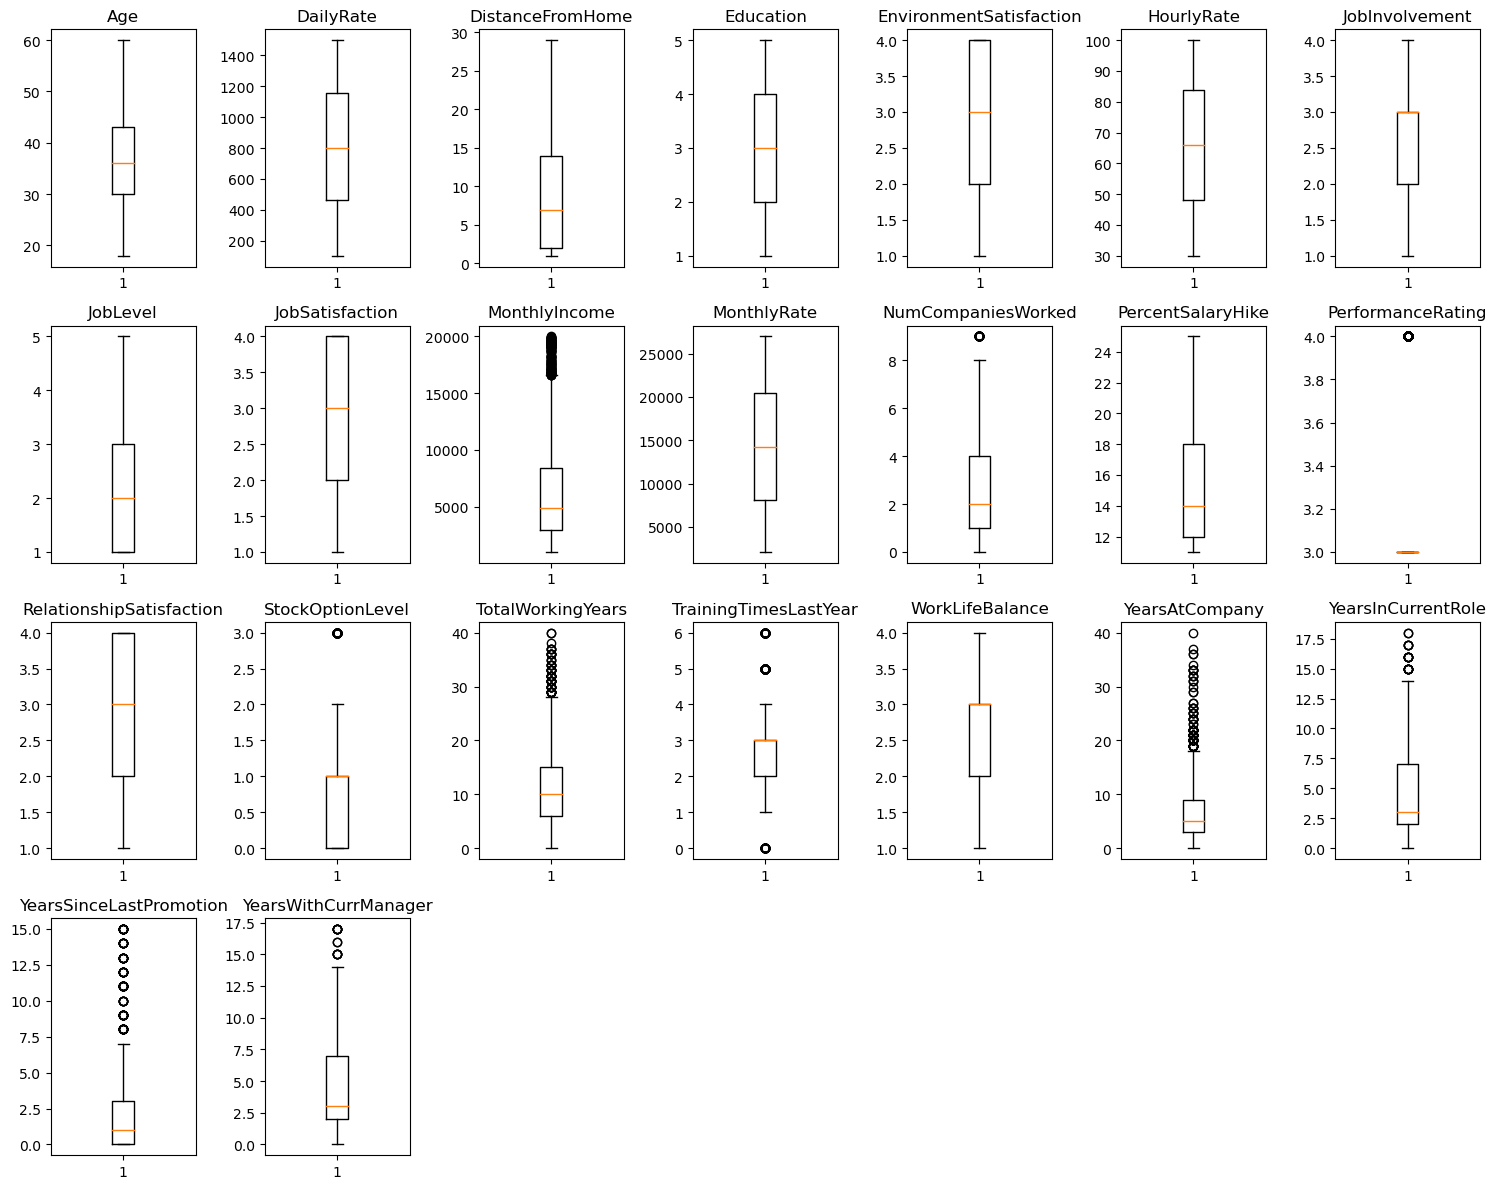

In [61]:
plt.figure(figsize=(15, 12))
for i, variable in enumerate(numerical_columns):
    plt.subplot(4,7, i + 1)
    plt.boxplot(data_emp[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()

### Data Preparation:

#### Convert categorical  to numerical variables

In [72]:
## Creating dummy variables
data_emp =pd.get_dummies(data_emp,drop_first=True)

In [73]:
data_emp.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


In [74]:
data_emp.shape

(1470, 45)

In [75]:
## Count the number of units in the attrition columns
data_emp["Attrition_Yes"].value_counts()

0    1233
1     237
Name: Attrition_Yes, dtype: int64

### Observation:
The attrition column contain unbalanced data.

### Split the data into train and test sets

In [76]:
# Dividing train data into X and y 
X = data_emp.drop(["Attrition_Yes"], axis=1)
y = data_emp["Attrition_Yes"]

In [77]:
X.shape

(1470, 44)

In [78]:
# Splitting the dataset into training and testing set into a ratio of 70:30 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [79]:
print(f"The training dataset consits of {X_train.shape[0]} rows and {X_train.shape[1]} columns")

The training dataset consits of 1029 rows and 44 columns


In [80]:
print(f"The testing dataset consists of {X_test.shape[0]} rows and {X_test.shape[1]} columns")

The testing dataset consists of 441 rows and 44 columns


### Normalize/standardize the data

In [81]:
# Scale the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Building

## Performance measures description:
* True positive(TP): The model predict  an employee attrition(Yes) and in reality it became an attrition(Yes).<br>
* False positive(FP): The model predict an employee attrition(Yes) and in reality it there is no attrition(No).<br>
* False negative(FN): The model predict no employee attrition(No) and the reality there is an employee attrition(Yes).<br>
* True negative(TN): The model predict no employee attrition(No) and in reality there is no attrition(No).<br>
* Accuracy = (TP+TN)/(TP+FP+FN+TN)
* Recall =(TP)/(TP+FN)
* Precision =(FP/FP+TN)
* F1 score: This score minimize both the False negative(FN) and False Positive(FN),the higher the better
* The values can computed using a confusion matrix

In [82]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):

        # predicting using the independent variables
        pred = model.predict(predictors)
        acc = accuracy_score(target, pred)  # to compute Accuracy using target and predicted values
        recall = recall_score(target, pred)  # to compute Recall using target and predicted values
        precision = precision_score(target, pred)  # to compute Precision using target and predicted values
        f1 = f1_score(target, pred)  # to compute F1-score using target and predicted values

        # creating a dataframe of metrics
        df_perf = pd.DataFrame( {"Accuracy": acc,"Recall": recall,"Precision": precision,"F1": f1},index=[0],)

        return df_perf

In [83]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

### Model Building on original data

In [84]:
models = {
    "Logistic Regression": LogisticRegression(),
     "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Bagging": BaggingClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Ada boost": AdaBoostClassifier(),
    "Support Vector Machine": SVC(),
}

for name, model in models.items():
    scores = cross_val_score(estimator=model, X=X_train,y=y_train,scoring="recall",cv=3)
    print(f"{name} recall: {round(np.mean(scores),4)}")

Logistic Regression recall: 0.4265
K-Nearest Neighbors recall: 0.1418
Decision Tree recall: 0.3698
Random Forest recall: 0.1648
Bagging recall: 0.2329
Gradient Boosting recall: 0.3071
Ada boost recall: 0.4207
Support Vector Machine recall: 0.176


In [85]:
## Check the performamce for each model in the training data
logistic_train_perf = model_performance_classification_sklearn(models["Logistic Regression"].fit(X_train,
                        y_train),X_train,y_train)
kneighbor_train_perf = model_performance_classification_sklearn(models["K-Nearest Neighbors"].fit(X_train,
                        y_train),X_train,y_train)
decisiontree_train_perf = model_performance_classification_sklearn(models["Decision Tree"].fit(X_train,
                        y_train),X_train,y_train)
randomf_train_perf = model_performance_classification_sklearn(models["Random Forest"].fit(X_train,
                        y_train),X_train,y_train)
bagging_train_perf = model_performance_classification_sklearn(models["Bagging"].fit(X_train,
                        y_train),X_train,y_train)
gradient_train_perf = model_performance_classification_sklearn(models["Gradient Boosting"].fit(X_train,
                        y_train),X_train,y_train)
adaboost_train_perf = model_performance_classification_sklearn(models["Ada boost"].fit(X_train,
                        y_train),X_train,y_train)
svm_train_perf = model_performance_classification_sklearn(models["Support Vector Machine"].fit(X_train,
                        y_train),X_train,y_train)

In [86]:
### Display the peformance measures for each model
models_train_comp_df = pd.concat([logistic_train_perf.T, kneighbor_train_perf.T,decisiontree_train_perf.T,
randomf_train_perf.T, bagging_train_perf.T, gradient_train_perf.T, adaboost_train_perf.T, svm_train_perf.T],axis=1,)
models_train_comp_df.columns = [
    "Logistic ","KNeighbor","DecisionTree","Random forest","Bagging","Gradient boost","Adaboost","SVM"]


In [87]:
print("Training performance measures comparison")
models_train_comp_df

Training performance measures comparison


,Logistic,KNeighbor,DecisionTree,Random forest,Bagging,Gradient boost,Adaboost,SVM
Accuracy,0.892,0.861,1.000,1.000,0.984,0.954,0.907,0.913
Recall,0.517,0.250,1.000,1.000,0.915,0.739,0.557,0.489
Precision,0.778,0.800,1.000,1.000,0.994,0.992,0.845,1.000
F1,0.621,0.381,1.000,1.000,0.953,0.847,0.671,0.656


### Observation:
Gradient boost and Bagging outperformed better in the training data than other models with higher accuracy,recall and F1 score. <br>
Since F1 score is characterized by minimizing both the false negative and false positive as compared to recall that miminize only the false negatives. <br>
F1 score is a better score to use for performance measure.


In [88]:
## Check the performamce for each model in the testing data
logistic_test_perf = model_performance_classification_sklearn(models["Logistic Regression"].fit(X_test,
                        y_test),X_test,y_test)
kneighbor_test_perf = model_performance_classification_sklearn(models["K-Nearest Neighbors"].fit(X_test,
                        y_test),X_test,y_test)
decisiontree_test_perf = model_performance_classification_sklearn(models["Decision Tree"].fit(X_test,
                        y_test),X_test,y_test)
randomf_test_perf = model_performance_classification_sklearn(models["Random Forest"].fit(X_test,
                        y_test),X_test,y_test)
bagging_test_perf = model_performance_classification_sklearn(models["Bagging"].fit(X_test,
                        y_test),X_test,y_test)
gradient_test_perf = model_performance_classification_sklearn(models["Gradient Boosting"].fit(X_test,
                        y_test),X_test,y_test)
adaboost_test_perf = model_performance_classification_sklearn(models["Ada boost"].fit(X_test,
                        y_test),X_test,y_test)
svm_test_perf = model_performance_classification_sklearn(models["Support Vector Machine"].fit(X_test,
                        y_test),X_test,y_test)

In [89]:
### Display the peformance measures for each model
models_test_comp_df = pd.concat([logistic_test_perf.T, kneighbor_test_perf.T,decisiontree_test_perf.T,
randomf_test_perf.T, bagging_test_perf.T, gradient_test_perf.T, adaboost_test_perf.T, svm_test_perf.T],axis=1,)
models_test_comp_df.columns = [
    "Logistic ","KNeighbor","DecisionTree","Random forest","Bagging","Gradient boost","Adaboost","SVM"]


In [90]:
print("Testing performance measures comparison")
models_test_comp_df

Testing performance measures comparison


,Logistic,KNeighbor,DecisionTree,Random forest,Bagging,Gradient boost,Adaboost,SVM
Accuracy,0.907,0.866,1.000,1.000,0.984,0.995,0.934,0.893
Recall,0.393,0.098,1.000,1.000,0.885,0.967,0.623,0.230
Precision,0.857,0.600,1.000,1.000,1.000,1.000,0.864,1.000
F1,0.539,0.169,1.000,1.000,0.939,0.983,0.724,0.373


### Observation:
Gradient boost and bagging are still the better performing models with higher recall and F1 score. <br>
However  gradient boost will be regarded as the best model with a recall score: 0.967 and F1 score:0.983

## Hyperparameter Tuning

### Tuning Gradient Boosting using original dataset

In [127]:
%%time 
# defining model
gradient_boost_tuned = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid= {"n_estimators": np.arange(100,150,25), "learning_rate": [0.2, 0.05, 1],
            "subsample":[0.5,0.7], "max_features":[0.5,0.7]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=gradient_boost_tuned, param_distributions=param_grid, scoring=scorer, n_iter=10, n_jobs = -1, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv=randomized_cv.fit(X_train,y_train)
# Set the clf to the best combination of parameters and fit the tuned model
gradient_boost_tuned=randomized_cv.best_estimator_
gradient_boost_tuned.fit(X_train,y_train)

CPU times: total: 1.17 s
Wall time: 24.5 s


GradientBoostingClassifier(learning_rate=0.2, max_features=0.5,
                           n_estimators=125, random_state=1, subsample=0.5)

In [128]:
## Code to check the performance on the training data
gradient_train_perf =model_performance_classification_sklearn(gradient_boost_tuned , X_train, y_train) 

In [129]:
## Code to check the performance on testing data
gradient_test_perf = model_performance_classification_sklearn(gradient_boost_tuned , X_test, y_test) 

In [130]:
performance_on_gboost=pd.concat([gradient_train_perf.T,gradient_test_perf.T],axis=1)
performance_on_gboost.columns=["Performance on training data","Performance on testing dataset"]

In [131]:
print("Gradient boost performance measures after model tuning")
performance_on_gboost

Gradient boost performance measures after model tuning


,Performance on training data,Performance on testing dataset
Accuracy,0.984,0.866
Recall,0.938,0.328
Precision,0.971,0.526
F1,0.954,0.404


### Observation:
After hyperparametric model tuning, the recall and F1 score declined by an average of 62%. <br>
The accuracy score declined slightly by 118 basis point(bp).

### Feature Importances

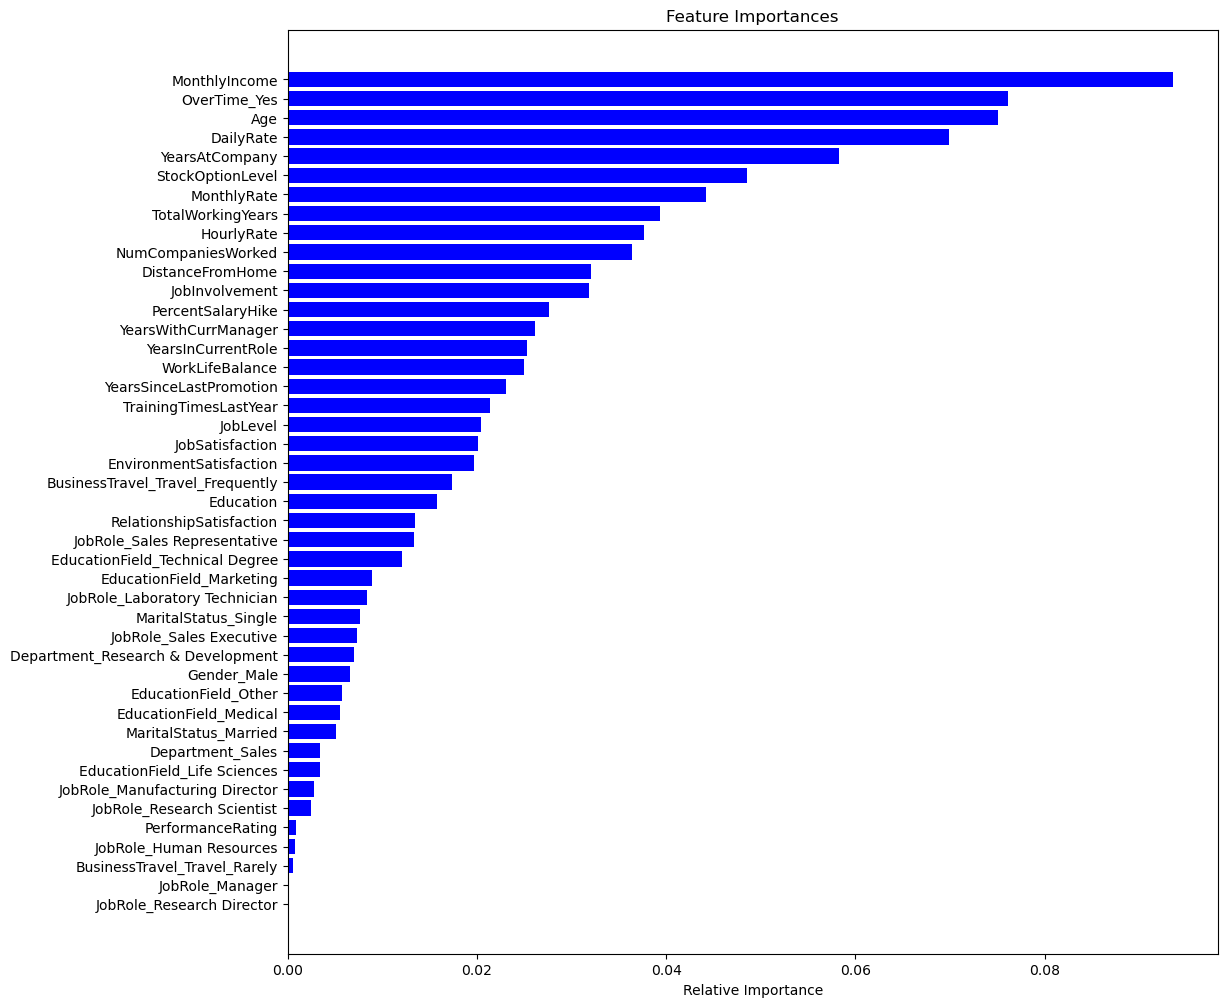

In [132]:
 ## Code to check the feature importance on the best model
feature_names = X.columns
importances =  gradient_boost_tuned.feature_importances_  
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="blue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [133]:
# Code to predict the employee attritions
attrition_pred = gradient_boost_tuned.predict(X_test)

In [134]:
df_series =pd.Series(attrition_pred)

In [135]:
df_series.value_counts()

0    403
1     38
dtype: int64

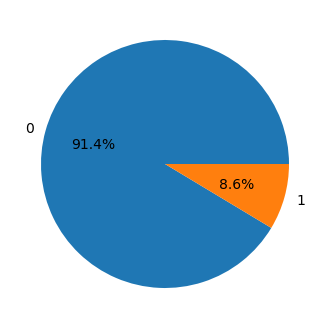

In [136]:
## Construct a pie chart for the predicted attrition. 
plt.figure(figsize=(4,5))
values = df_series.value_counts() /df_series.shape[0]
plt.pie(values,labels=values.keys(),autopct="%1.1f%%")
plt.show()

### Insights and conclusions

The employee attrition dataset consist of 1470 rows and 35 columns.<br>
Several classification models where use to predict factors that affect employee attritions.<br>
Gradient boost model is used to select important features that had obvious impact on
the employee attrition. <br>
To evaluate the model performance, we trained and tested the dataset to predict the employee attrition, split it into two parts(70% for training, 30% for testing ). <br>
According to gradient boost model results the first most ten features that incudes,monthlyincome,overtime,age,daily rate,years at the company,stockoptionlevel,monthly rate,total working years, the number of companies worked  and distance from home are the main reasons why people choose to resign. <br> 
In conclusion, i strongly suggest that the company should care more about their employees and improve their job satisfaction. <br>
Simultaneously,they must pay more attention to human resources employees because they
have very low job satisfaction. <br>
The company should allow employees to have enough time to rest and spend time with their families. <br>